# Introdução 

O objetivo deste notebook é a estatistica. Seja ela descritiva ou regressiva. Fazendo algumas definições, citando alguns teoremas importantes, ajustar dados, propor hipóteses e testa-las. 

A base de dados utilizada será a base PeNSE 2015 do [IBGE](https://www.ibge.gov.br/) sobre saude e educação, disponível em: 

> https://www.ibge.gov.br/estatisticas/downloads-estatisticas.html?caminho=pense/2015/microdados/

A amostra que vamos utilizar é a `PeNSE_2015_AMOSTRA2.zip`

## PeNSE (Pesquisa Nacional de Saúde do Escolar)

A pesquisa PeNSE é uma pesquisa feita por amostragem que permite conhecer e dimensionar os fatores de risco e proteção à saúde dos adolescente , é feita utilizando dados para a seleção de escolas publicas e privadas do Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira - INEP.

É fruto de uma parceria entre os Ministérios da Saúde e Educação. A pesquisa fornece informações sobre características básicas da população de estudo, incluindo aspectos socioecnômicos, como escolaridade dos pais, inserção no mercado de trabalho e posse de bens e serviços; fatores de risco comportamentais relacionados a hábitos alimentares, sedentarismo, tabagismo, consumo de álcool e outras drogas; saúde sexual e reprodutiva; exposição a acidentes e violências; hábitos de higiene; saúde bucal; saúde mental;... dentre vaŕias outras informações. 

### Tipo dos dados:
---

## Notas Metodológicas

---

## Importações de módulos

In [1]:
import pandas as pd 
import numpy as np 

## Importações de Dados

Aqui eu estou usando o Jupyter notebook mas em muitos casos pode-se utilizar o Google Colaboratory, onde é possível montar a imagem do Google Drive e fazer uso dos dados armazenados no Drive. Inclusive é possível armazenar um `.csv` dentro de um `.zip` e conseguir ler ele com o método `.read_csv()` do pandas. Para realizar o unZip do de um arquivo zip podemos usar a biblioteca `zipfile`.

> Lembrando que as ferramentas de Cloud podem ser pagas, ou seja, ter a capacidade de ler arquivos mesmo que zipados pode poupar dinheiro em algumas situações.

Outro método bastante importante do arquivo do tipo ZipFile é o `ZipFile.infolist()` que lista todos os arquivos dentro dele ou o `ZipFile.namelist()`

In [2]:
from zipfile import ZipFile

zip_file = ZipFile('./dados/PeNSE_2015_AMOSTRA2.zip')

for arquivo in zip_file.namelist():
    print(arquivo)

arquivos csv/
arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV
arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV
arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV
arquivos sas/
arquivos sas/pense_amostra2_aluno.sas7bdat
arquivos sas/pense_amostra2_alunoescola.sas7bdat
arquivos sas/pense_amostra2_escola.sas7bdat
arquivos xlsx/
arquivos xlsx/PENSE_AMOSTRA2_ALUNO.xlsx
arquivos xlsx/PENSE_AMOSTRA2_ALUNOESCOLA.xlsx
arquivos xlsx/PENSE_AMOSTRA2_ESCOLA.xlsx
Dicionario_PENSE_Microdados_AMOSTRA2.xls


Note que podemos verificar exatamente quais arquivos compõem o zip. O `namelist()`é uma lista com o nome dos arquivos, então podemos selecionar um elemento desta lista e fornece-lo ao `zip_file.open(arquivo_desejado)`

In [3]:
caminho_arquivo_desejado = zip_file.namelist()[1]
caminho_arquivo_desejado

'arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV'

In [4]:
dados = pd.read_csv(zip_file.open(caminho_arquivo_desejado), sep=';', thousands='.',decimal=',')

In [5]:
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,...,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,...,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,...,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,...,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,...,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,...,1223,1,299.735235,1,2,4,1,5,1,296


É possível também descompactar a pasta via terminal, seja ele numa célula do *jupyter* ou numa célula do *colaboratory*. 

In [6]:
dados.shape

(16556, 181)

Temos 16556 registros (linhas) e 181 variáveis (colunas).

Vamos analisar quais dados temos:

In [7]:
dados.columns

Index(['ANOPESQ', 'PAIS', 'REGEOGR', 'VB00004', 'VB01001', 'VB01002',
       'VB01003', 'VB01004', 'VB01005', 'VB01006',
       ...
       'ESTRATO_EXP', 'ESTRATOGEOREG', 'PESO', 'V0006', 'V0007', 'V0008',
       'V0041', 'aluno', 'escola', 'turma'],
      dtype='object', length=181)

Note que temos alguns códigos, para entender o que significa cada código precisamos de um dicionário de dados. Ou também podemos "adivinhar" os tipos de dados de cada variável

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


Temos 7 variáveis do tipo `float64`, 171 variáveis do tipo `int64` e 3 variáveis do tipo `object`. Vamos investigar o que são essas variáveis do tipo object realizando um `select`na base de dados:

In [9]:
dados.select_dtypes(include='object')

""
0
1
2
3
4
...
16551
16552
16553
16554


> `VB17003`: Peso do estudante, incluindo os imputados, com uma casa decimal 

>`VB17004`:	Altura do estudante, incluindo os imputados, com uma casa decimal

Então vou alterar a importação dos dados adicionando os parâmetros: 

```python
dados = pd.read_csv(zip_file.open(caminho_arquivo_desejado), sep=';', thousands='.',decimal=',')
```

### Desafio: Classificar os dados em qualitativos e quantitativos. Discretos ou contínuos, nominais ou ordinais.

----

>`TEMPODESLOC`	Refere-se ao tempo médio diário acumulado pelo escolar, com o deslocamento da casa para escola e da escola para casa feito a pé ou de bicicleta, nos últimos sete dias anteriores à pesquisa. Em minutos.

>`TEMPOEDFIS`Refere-se ao tempo médio acumulado, nos últimos sete dias anteriores à pesquisa, que o escolar fez atividade física ou esporte durante as aulas de educação física na escola. Em minutos.

> `TEMPOEXTRA`	Refere-se ao tempo médio diário acumulado pelo escolar com a prática de alguma atividade física extraescolar como esportes, dança, ginástica, musculação, lutas ou outra atividade, nos últimos sete dias anteriores à data da pesquisa. Em minutos

> `TEMPOTOTAL`	A atividade física acumulada foi estimada calculando o produto entre o número de dias e o tempo médio que os escolares gastam em atividades físicas, nos sete dias anteriores à pesquisa, considerando os seguintes domínios: ir e voltar da escola, aulas de educação física e outras atividades extraescolares. Em minutos.

> `TEMPOEST`	A atividade física globalmente estimada refere-se ao número de dias que os escolares declararam fazer, pelo menos, uma hora por dia de atividade física, nos sete dias anteriores à pesquisa. Em minutos.

In [10]:
dicionario_dados = pd.read_excel('./dados/Dicionario_PENSE_Microdados_AMOSTRA2.xls')

In [11]:
dados['VB01001'].value_counts()

1    8287
2    8269
Name: VB01001, dtype: int64

### Variáveis que vamos seleciona:

> `VB01001`:	Qual é o seu sexo?
    > * 1	Masculino
    > * 2	Feminino

> `VB01002`:	Qual é a sua cor ou raça?
    > * 1	Branca
    > * 2	Preta
    > * 3	Amarela
    > * 4	Parda
    > * 5	Indígena
    > *99	Não informado
    
> `VB01022`	Em que turno você estuda?
    > * 1	Manhã
    > * 2	Intermediário
    > * 3	Tarde
    > * 4	Noite
    > * 5	Integral
    > * 99	Não informado

> `VB01013`	Na sua casa tem telefone fixo (convencional)?
    > * 1	Sim
    > * 2	Não
    > * 99	Não informado

> `VB01014`	Você tem celular?
    > * 1	SiM
    > * 2	Não
    > * 99	Não informado

> `VB01015A` Na sua casa tem computador (de mesa, ou netbook, laptop, etc)?
    > * 1	Sim
    > * 2	Não
    > * 99	Não informado

> `VB01016`	Você tem acesso à internet em sua casa?
    > * 1	Sim
    > * 2	Não
    > * 99	Não informado
    
> `VB01008A`	Qual nível de ensino (grau) sua mãe estudou ou estuda?
    > * 1	Minha mãe não estudou
    > * 2	Minha mãe começou o ensino fundamental ou 1º grau, mas não terminou
    > * 3	Minha mãe terminou o ensino fundamental ou 1º grau
    > * 4	Minha mãe começou o ensino médio ou 2º grau, mas não terminou
    > * 5	Minha mãe terminou o ensino médio ou 2° grau
    > * 6	Minha mãe começou a faculdade (ensino superior), mas não terminou
    > * 7	Minha mãe terminou a faculdade (ensino superior)
    > * 8	Não sei
    > * 99	Não informado
    
> `VB04006A`	Algum de seus pais ou responsáveis fuma? 
    > * -1	Pulo no questionário
    > * 1	Nenhum deles 
    > * 2	Só meu pai ou responsável do sexo masculino 
    > * 3	Só minha mãe ou responsável do sexo feminino 
    > * 4	Meu pai e minha mãe ou responsáveis 
    > * 5	Não sei
    > * 99	Não informado

> `VB05002`	Alguma vez na vida você tomou uma dose de bebida alcoólica? (Uma dose equivale a uma lata de cerveja ou uma taça de vinho ou uma dose de cachaça ou uísque etc)
    > * -1	Pulo no questionário
    > * 1	Sim
    > * 2	Não 
    > * 99	Não informado

> `VB07010`	Você já sofreu bullying?
    > * 1	Sim
    > * 2	Não
    > * 3	Não sei o que é bullying
    > * 99	Não informado

> `VB12001`	NOS ÚLTIMOS 12 MESES com que frequência tem se sentido sozinho(a)? 
    > * 1	Nunca
    > * 2	Raramente
    > * 3	Às vezes
    > * 4	Na maioria das vezes
    > * 5	Sempre
    > * 99	Não informado

> `VB12003`	Quantos amigos(as) próximos você tem?
    > * 1	Nenhum amigo (0)
    > * 2	1 amigo
    > * 3	2 amigos
    > * 4	3 ou mais amigos
    > * 99	Não informado

> `VB08001`	Você já teve relação sexual (transou) alguma vez?
    > * -1	Pulo no questionário
    > * 1	Sim
    > * 2	Não
    > * 99	Não informado

> `VB08011`	Você usou preservativo na primeira relação sexual?
    > * -1	Pulo no questionário
    > * 1	Sim
    > * 2	Não
    > * 99	Não informado

> `VB08008`	Na escola, você já recebeu orientação sobre prevenção de gravidez?
    > * -1	Pulo no questionário
    > * 1	Sim
    > * 2	Não
    > * 3	Não sei
    > * 99	Não informado

> `VB08009`	Na escola, você já recebeu orientação sobre AIDS ou outras Doenças Sexualmente Transmissíveis (DST)?
    > * -1	Pulo no questionário
    > * 1	Sim
    > * 2	Não
    > * 3	Não sei
    > * 99	Não informado

> `VB09016`	Alguma vez na vida você foi forçado a ter relação sexual? 
    > * -1	Pulo no questionário
    > * 1	Sim
    > * 2	Não
    > * 99	Não informado

> `VB13005`	Como você classificaria seu estado de saúde?
    > * 1	Muito bom
    > * 2	Bom
    > * 3	Regular
    > * 4	Ruim
    > * 5	Muito ruim
    > * 99	Não informado

> `VB11006`	Você considera sua imagem corporal como sendo algo:
    > * 1	Muito importante
    > * 2	Importante
    > * 3	Pouco importante
    > * 4	Sem importância
    > * 99	Não informado

> `VB11007`	Como você se sente em relação ao seu corpo?
    > * 1	Muito satisfeito(a)
    > * 2	Satisfeito(a)
    > * 3	Indiferente
    > * 4	Insatisfeito(a)
    > * 5	Muito insatisfeito(a)
    > * 99	Não informado

> VB17001	Qual é o peso do(a) aluno(a)?
    > * 0 a 2999	Peso
    > * 998	Não informado
    > * 9999	Recusa ou impossibilidade de medição

> `VB17002`	Qual é a altura do(a) aluno(a)?
    0 a 2999	Peso
    998	Não informado
    9999	Recusa ou impossibilidade de medição

> `VB17006`	Variável identificadora do estado nutricional do estudante, onde: déficit de peso=1
> * 1	Deficit de peso
> * 2	Eutrofia
> * 3	Sobrepeso
> * 4	Obesidade


> `V0006`	Situação da escola
    > * 1	Urbana
    > * 2	Rural

> `V0007`	Dependência Administrativa da escola
    > * 1	Pública
    > * 2	Privada

> `V0008`	Esfera Administrativa da escola
    > * 1	Municipal
    > * 2	Estadual
    > * 3	Federal
    > * 4	Privada
    
> `V0041`	Tipo de escola privada
    > * -1	Pulo no questionário
    > * 1	Particular
    > * 2	Comunitária
    > * 3	Confessional
    > * 4	Filantrópica

In [12]:
selecao = {'VB01001':'sexo',
           'VB01002':'cor',
           'VB01022':'turno',
           'VB01013':'telefone fixo',
           'VB01014':'celular',
           'VB01015A':'computador',
           'VB01016':'internet',
           'VB01008A':'escolaridade mae',
           'VB04006A':'responsáveis fuma',
           'VB05002':'usou bebida alcoolica',
           'VB07010':'sofreu bullying',
           'VB12001':'frequência com que se sente só',
           'VB12003':'Quantos amigos próximos',
           'VB08001':'teve relação sexual alguma vez',
           'VB08011':'usou preservativo na primeira relação',
           'VB08009':'ja recebeu orientação sobre DST na escola',
           'VB09016':'ja foi forçado a ter relação sexual', 
           'VB13005':'como classifica o proprio estado de saúde',
           'VB11006':'considera sua imagem corporal como sendo algo',
           'VB11007':'como se sente em relação ao seu corpo',
           'VB17003':'peso do aluno',
           'VB17004':'altura do aluno',
           'VB17006':'estado nutricional do estudante',
           'V0006':'Situação da escola',
           'V0007':'Dependência Administrativa da escola',
           'V0008':'Esfera Administrativa da escola'
          }

In [13]:
dados_selecionados = dados[selecao.keys()]
dados_selecionados.columns = selecao.values()

In [14]:
dados_selecionados

,sexo,cor,turno,telefone fixo,celular,computador,internet,escolaridade mae,responsáveis fuma,usou bebida alcoolica,...,ja foi forçado a ter relação sexual,como classifica o proprio estado de saúde,considera sua imagem corporal como sendo algo,como se sente em relação ao seu corpo,peso do aluno,altura do aluno,estado nutricional do estudante,Situação da escola,Dependência Administrativa da escola,Esfera Administrativa da escola
0,2,1,1,1,1,1,1,7,1,2,...,2,1,1,2,37.1,157.0,1,1,2,4
1,2,1,1,1,1,1,1,7,2,2,...,2,3,3,2,50.2,152.0,2,1,2,4
2,1,4,1,2,1,1,1,5,1,1,...,2,2,1,2,48.2,161.4,2,1,2,4
3,1,1,1,1,1,1,1,7,1,2,...,2,1,1,2,69.4,172.5,3,1,2,4
4,1,1,1,2,1,1,1,5,1,1,...,1,2,1,4,78.9,167.5,4,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16551,2,4,1,1,1,1,1,7,-1,-1,...,-1,1,1,1,56.7,167.9,2,1,2,4
16552,1,1,1,2,1,1,1,7,1,2,...,2,2,1,2,61.9,185.8,2,1,2,4
16553,1,4,1,1,2,1,1,7,2,2,...,2,1,4,1,60.9,159.4,3,1,2,4
16554,1,4,1,1,1,1,1,7,2,1,...,2,1,3,2,47.3,157.8,2,1,2,4


In [15]:
dados_selecionados['sexo'].value_counts(normalize=True) * 100 

1    50.054361
2    49.945639
Name: sexo, dtype: float64

Note que a proporção entre homens e mulheres esta normal.

### Vamos montar tabelas de frequencias e percentuais

> `VB11007`	Como você se sente em relação ao seu corpo?
    > * 1	Muito satisfeito(a)
    > * 2	Satisfeito(a)
    > * 3	Indiferente
    > * 4	Insatisfeito(a)
    > * 5	Muito insatisfeito(a)
    > * 99	Não informado

In [16]:
percentual_satisfacao_corpo = dados_selecionados['como se sente em relação ao seu corpo'].value_counts(normalize=True)
frequencia_satisfacao_corpo = dados_selecionados['como se sente em relação ao seu corpo'].value_counts()

distribucao_frequencia_satisfacao_corpo = pd.DataFrame({'frequencia': frequencia_satisfacao_corpo,
                                                       'percentual': percentual_satisfacao_corpo * 100})

respostas_satisfacao_corpo = {
    1:'Muito satisfeito(a)',
    2:'Satisfeito(a)',
    3:'Indiferente',
    4:'Insatisfeito(a)',
    5:'Muito insatisfeito(a)',
    99:'Não informado'
}

distribucao_frequencia_satisfacao_corpo.rename(index=respostas_satisfacao_corpo, inplace=True)
distribucao_frequencia_satisfacao_corpo.rename_axis(index='Sentimento em relação ao corpo')

,frequencia,percentual
Sentimento em relação ao corpo,,
Satisfeito(a),6920,41.797536
Muito satisfeito(a),4608,27.832810
Insatisfeito(a),2326,14.049287
Indiferente,1807,10.914472
Muito insatisfeito(a),714,4.312636
Não informado,181,1.093259


### Desafio: 
> Criar uma função para gerar as tabelas e fazer uma análise das variáveis escolhidas.

In [17]:
def cria_tabela_frequencia_percentuais(series : pd.Series , classificacoes : dict, rotulo : str ):
    percentual = series.value_counts(normalize=True) * 100
    frequencia = series.value_counts()
    
    tab1 = pd.DataFrame({'frequencia':frequencia,
                        'percentual':percentual})
    tab1.rename(index=classificacoes, inplace=True)
    tab1.rename_axis(index=rotulo, inplace=True)
    return tab1
    

In [182]:
### Testando
turno = {1: 'Manhã',2: 'Intermediário',3: 'Tarde',4: 'Noite',5: 'Integral',99: 'Não informado'}

cria_tabela_frequencia_percentuais(dados_selecionados['turno'], turno, 'Turno em que estuda')

,frequencia,percentual
Turno em que estuda,,
Manhã,9198,55.556898
Tarde,5362,32.387050
Noite,1258,7.598454
Integral,651,3.932109
Intermediário,83,0.501329
Não informado,4,0.024160


#### Construindo classificadores

In [19]:
sexo = {1: 'Masculino',2: 'Feminino'}
cor = {1:'Branca',2:'Preta',3:'Amarela',4:'Parda',5:'Indígena',99:'Não informado'}
turno = {1: 'Manhã',2: 'Intermediário',3: 'Tarde',4: 'Noite',5: 'Integral',99: 'Não informado'}

telefone_fixo = {1:'Sim',2:'Não',99:'Não informado'}
celular = {1:'Sim',2:'Não',99:'Não informado'}
computador = {1:'Sim',2:'Não',99:'Não informado'}
internet = {1:'Sim',2:'Não',99:'Não informado'}

escolaridade_mae = {
    1: 'Minha mãe não estudou',
    2: 'Minha mãe começou o ensino fundamental ou 1º grau, mas não terminou',
    3: 'Minha mãe terminou o ensino fundamental ou 1º grau',
    4: 'Minha mãe começou o ensino médio ou 2º grau, mas não terminou',
    5: 'Minha mãe terminou o ensino médio ou 2° grau',
    6: 'Minha mãe começou a faculdade (ensino superior), mas não terminou',
    7: 'Minha mãe terminou a faculdade (ensino superior)',
    8: 'Não sei',
    99: 'Não informado'
}

responsaveis_fuma = {
    -1: 'Pulo no questionário',
    1: 'Nenhum deles',
    2: 'Só meu pai ou responsável do sexo masculino',
    3: 'Só minha mãe ou responsável do sexo feminino',
    4: 'Meu pai e minha mãe ou responsáveis',
    5:'Não sei',
    99:'Não informado'
}
usou_bebida_alcoolica = {
    -1: 'Pulo no questionário',
    1: 'Sim',
    2: 'Não',
    99:'Não informado'
}
sofreu_bullying = {
    1: 'Sim',
    2: 'Não',
    3: 'Não sei o que é bullying',
    99:'Não informado'
}
frequência_com_que_se_sente_isolado = {
    1:'Nunca',
    2:'Raramente',
    3: 'Às vezes',
    4: 'Na maioria das vezes',
    5:'Sempre',
    99:'Não informado'
}
quantos_amigos_proximos = {
    1:'Nenhum amigo (0)',
    2: '1 amigo',
    3: '2 amigos',
    4: '3 ou mais amigos',
    99:'Não informado'
}
teve_relação_sexual_alguma_vez = {
    -1: 'Pulo no questionário',
    1: 'Sim',
    2: 'Não',
    99:'Não informado'
}
usou_preservativo_na_primeira_relacao = {
    -1: 'Pulo no questionário',
    1: 'Sim',
    2: 'Não',
    99:'Não informado'
}
ja_recebeu_orientação_sobre_DST_na_escola = {
    -1: 'Pulo no questionário',
    1: 'Sim',
    2: 'Não',
    3: 'Não sei',
    99:'Não informado'
}
ja_foi_forçado_a_ter_relação_sexual = {
    -1: 'Pulo no questionário',
    1: 'Sim',
    2: 'Não',
    99:'Não informado'
}
como_classifica_o_proprio_estado_de_saude = {
    1:'Muito bom',
    2: 'Bom',
    3: 'Regular',
    4: 'Ruim',
    5: 'Muito ruim',
    99: 'Não informado'
}
considera_sua_imagem_corporal_como_sendo_algo = {
    1:'Muito importante',
    2:'Importante',
    3:'Pouco importante',
    4:'Sem importância',
    99: 'Não informado'
}
como_se_sente_em_relação_ao_seu_corpo = {
    1: 'Muito satisfeito(a)',
    2: 'Satisfeito(a)',
    3: 'Indiferente',
    4:'Insatisfeito(a)',
    5:'Muito insatisfeito(a)',
    99:'Não informado'
}
peso_do_aluno = {}
altura_do_aluno = {}
estado_nutricional_do_estudante = {
    1: 'Deficit de peso',
    2: 'Eutrofia',
    3: 'Sobrepeso',
    4: 'Obesidade'
}
situacao_da_escola = {1:'Urbana', 2: 'Rural'}

dependencia_Administrativa_da_escola = {1:'Pública', 2:'Privada'}

esfera_Administrativa_da_escola = {1: 'Municipal',
                                   2: 'Estadual',
                                   3: 'Federal',
                                   4: 'Privada'}
#tipo_de_escola_privada = {
#    -1: 'Pulo no questionário',
#    1: 'Particular',
#    2: 'Comunitária',
#    3: 'Confessional',
#    4:'Filantrópica'}



In [20]:
tabelas_de_variaveis = [sexo, cor, turno, telefone_fixo,celular,computador,
                        internet,escolaridade_mae,
                        responsaveis_fuma,
                        usou_bebida_alcoolica,
                        sofreu_bullying,
                        frequência_com_que_se_sente_isolado,
                        quantos_amigos_proximos,
                        teve_relação_sexual_alguma_vez,
                        usou_preservativo_na_primeira_relacao,
                        ja_recebeu_orientação_sobre_DST_na_escola,
                        ja_foi_forçado_a_ter_relação_sexual,
                        como_classifica_o_proprio_estado_de_saude,
                        considera_sua_imagem_corporal_como_sendo_algo,
                        como_se_sente_em_relação_ao_seu_corpo,
                        peso_do_aluno, altura_do_aluno,
                        estado_nutricional_do_estudante,
                        situacao_da_escola, dependencia_Administrativa_da_escola, 
                        esfera_Administrativa_da_escola]

dicionario_variaveis = {}
i = 0
for variavel in dados_selecionados.columns:
    dicionario_variaveis[str(variavel)] = tabelas_de_variaveis[i]
    i += 1

In [21]:
### Testando
dataframes_com_percentuais_frequencias_variaveis = {}
for rotulo, variavel in dicionario_variaveis.items():
    dataframe = cria_tabela_frequencia_percentuais(dados_selecionados[rotulo], variavel, str(rotulo))
    display(dataframe)
    dataframes_com_percentuais_frequencias_variaveis[rotulo] = dataframe


,frequencia,percentual
sexo,,
Masculino,8287,50.054361
Feminino,8269,49.945639


,frequencia,percentual
cor,,
Parda,6726,40.625755
Branca,6575,39.713699
Preta,1939,11.711766
Amarela,712,4.300556
Indígena,581,3.509302
Não informado,23,0.138922


,frequencia,percentual
turno,,
Manhã,9198,55.556898
Tarde,5362,32.387050
Noite,1258,7.598454
Integral,651,3.932109
Intermediário,83,0.501329
Não informado,4,0.024160


,frequencia,percentual
telefone fixo,,
Não,8479,51.214061
Sim,8057,48.665137
Não informado,20,0.120802


,frequencia,percentual
celular,,
Sim,14366,86.772167
Não,2172,13.119111
Não informado,18,0.108722


,frequencia,percentual
computador,,
Sim,12412,74.969799
Não,4124,24.909398
Não informado,20,0.120802


,frequencia,percentual
internet,,
Sim,13237,79.952887
Não,3300,19.932351
Não informado,19,0.114762


,frequencia,percentual
escolaridade mae,,
Não sei,4168,25.175163
Minha mãe terminou a faculdade (ensino superior),3099,18.718289
Minha mãe terminou o ensino médio ou 2° grau,2840,17.153902
"Minha mãe começou o ensino fundamental ou 1º grau, mas não terminou",2735,16.519691
"Minha mãe começou o ensino médio ou 2º grau, mas não terminou",1011,6.106547
Minha mãe terminou o ensino fundamental ou 1º grau,991,5.985745
"Minha mãe começou a faculdade (ensino superior), mas não terminou",929,5.611259
Minha mãe não estudou,749,4.524040
Não informado,34,0.205364


,frequencia,percentual
responsáveis fuma,,
Nenhum deles,8688,52.476444
Pulo no questionário,4706,28.424740
Só meu pai ou responsável do sexo masculino,1470,8.878956
Só minha mãe ou responsável do sexo feminino,925,5.587098
Meu pai e minha mãe ou responsáveis,469,2.832810
Não sei,268,1.618748
Não informado,30,0.181203


,frequencia,percentual
usou bebida alcoolica,,
Sim,7078,42.751872
Não,4747,28.672385
Pulo no questionário,4706,28.424740
Não informado,25,0.151003


,frequencia,percentual
sofreu bullying,,
Não,8533,51.540227
Sim,7584,45.808166
Não sei o que é bullying,387,2.337521
Não informado,52,0.314086


,frequencia,percentual
frequência com que se sente só,,
Nunca,5805,35.062817
Às vezes,4580,27.663687
Raramente,3584,21.647741
Na maioria das vezes,1601,9.670210
Sempre,920,5.556898
Não informado,66,0.398647


,frequencia,percentual
Quantos amigos próximos,,
3 ou mais amigos,12803,77.331481
2 amigos,2056,12.418459
1 amigo,988,5.967625
Nenhum amigo (0),642,3.877748
Não informado,67,0.404687


,frequencia,percentual
teve relação sexual alguma vez,,
Não,7349,44.388741
Pulo no questionário,4706,28.424740
Sim,4455,26.908674
Não informado,46,0.277845


,frequencia,percentual
usou preservativo na primeira relação,,
Pulo no questionário,12101,73.091326
Sim,2879,17.389466
Não,1561,9.428606
Não informado,15,0.090602


,frequencia,percentual
ja recebeu orientação sobre DST na escola,,
Sim,9743,58.848756
Pulo no questionário,4706,28.424740
Não,1509,9.114520
Não sei,546,3.297898
Não informado,52,0.314086


,frequencia,percentual
ja foi forçado a ter relação sexual,,
Não,11195,67.618990
Pulo no questionário,4706,28.424740
Sim,569,3.436820
Não informado,86,0.519449


,frequencia,percentual
como classifica o proprio estado de saúde,,
Muito bom,6294,38.016429
Bom,5820,35.153419
Regular,3222,19.461223
Ruim,618,3.732786
Muito ruim,488,2.947572
Não informado,114,0.688572


,frequencia,percentual
considera sua imagem corporal como sendo algo,,
Muito importante,7102,42.896835
Importante,6604,39.888862
Pouco importante,1969,11.892969
Sem importância,726,4.385117
Não informado,155,0.936216


,frequencia,percentual
como se sente em relação ao seu corpo,,
Satisfeito(a),6920,41.797536
Muito satisfeito(a),4608,27.832810
Insatisfeito(a),2326,14.049287
Indiferente,1807,10.914472
Muito insatisfeito(a),714,4.312636
Não informado,181,1.093259


,frequencia,percentual
peso do aluno,,
50.0,73,0.440928
53.5,67,0.404687
50.2,66,0.398647
52.5,65,0.392607
51.9,65,0.392607
...,...,...
133.1,1,0.006040
108.0,1,0.006040
93.6,1,0.006040


,frequencia,percentual
altura do aluno,,
160.0,197,1.189901
162.0,164,0.990577
157.0,155,0.936216
155.0,154,0.930176
161.0,153,0.924136
...,...,...
190.1,1,0.006040
124.1,1,0.006040
132.9,1,0.006040


,frequencia,percentual
estado nutricional do estudante,,
Eutrofia,11479,69.334380
Sobrepeso,3028,18.289442
Obesidade,1514,9.144721
Deficit de peso,535,3.231457


,frequencia,percentual
Situação da escola,,
Urbana,15705,94.85987
Rural,851,5.14013


,frequencia,percentual
Dependência Administrativa da escola,,
Pública,12381,74.782556
Privada,4175,25.217444


,frequencia,percentual
Esfera Administrativa da escola,,
Estadual,9009,54.415318
Privada,4175,25.217444
Federal,3072,18.555207
Municipal,300,1.812032


## Construindo a variável do IMC

O **IMC** é o ìndice de massa corporal, pode ser calculado através da expressão: 

$$IMC = \frac{\text{peso}}{\text{altura}²}$$

In [22]:
dados['IMC'] = dados['VB17003'] / ((dados['VB17004'] / 100 )**2)
dados['IMC']

0        15.051321
1        21.727839
2        18.502907
3        23.322831
4        28.122076
           ...    
16551    20.113223
16552    17.930782
16553    23.968489
16554    18.995343
16555    23.303246
Name: IMC, Length: 16556, dtype: float64


> O IMC é dividido em classes.

In [23]:
classes_imc = [0, 18.5, 25, 30, 60]
labels_imc = ['abaixo', 'esperado', 'sobrepeso','obesidade']

# é como se a gente colocasse os dados do IMC em caixinhas (bins) rotuladas como labels_imc
dados['classe_IMC'] = pd.cut(x = dados['IMC'],
       bins = classes_imc,
       labels = labels_imc,
       include_lowest=True)  # include_lowest considera o abaixo como intervalo fechado e o acima intervalo aberto.

dados[['IMC','classe_IMC']]

,IMC,classe_IMC
0,15.051321,abaixo
1,21.727839,esperado
2,18.502907,esperado
3,23.322831,esperado
4,28.122076,sobrepeso
...,...,...
16551,20.113223,esperado
16552,17.930782,abaixo
16553,23.968489,esperado
16554,18.995343,esperado


In [24]:
percentual_IMC = dados['classe_IMC'].value_counts(normalize=True)
frequencia_IMC = dados['classe_IMC'].value_counts()

distribucao_frequencia_IMC = pd.DataFrame({'frequencia': frequencia_IMC,
                                           'percentual': percentual_IMC * 100})

distribucao_frequencia_IMC

,frequencia,percentual
esperado,9188,55.496497
abaixo,4975,30.049529
sobrepeso,1760,10.630587
obesidade,633,3.823387


# Regra de Sturges e CrossTabs

Note que no IMC temos os classificadores de cada variável `esperado`, `abaixo`, `sobrepeso` e `obseidade`. Mas e quando temos variáveis que não sabemos a quantidade de classificadores? E se quisermos criar mais uma classe? Ou se quisermos dividir as alturas em 5 classes?

Por exemplo, verificando o valor mínimo e o máximo no conjunto de dados é possível notar que:

In [25]:
print(' Min:',dados['VB17004'].min(),'\n','Max:',dados['VB17004'].max())

 Min: 124.1 
 Max: 195.3


dentro deste intervalo podemos ter muitas classes.

## A regra de Sturges

> O Regra de Sturges é um critério usado para determinar o número de classes ou intervalos que são necessários para representar graficamente um conjunto de dados estatísticos. Esta regra foi enunciada em 1926 pelo matemático alemão Herbert Sturges.

> É um método empírico amplamente utilizado em estatística descritiva para **determinar o número de classes que devem existir em um histograma de frequência**, para classificar um conjunto de dados que representam uma amostra ou população.

> Basicamente, essa regra determina a largura dos contêineres gráficos, dos histogramas de frequência.

> Para estabelecer sua regra, Herbert Sturges considerou um diagrama de freqüência ideal, que consiste em intervalos $K$, onde o intervalo $i$ contém um certo número de amostras ($i = 0, ... k - 1$), representado como:

$$C_{(k-1,i)} = C_{i}^{k-1} = {{k-1} \choose {i}}$$

> Esse número de amostras é dado pelo número de maneiras em que um subconjunto de um conjunto pode ser extraído; isto é, pelo coeficiente binomial, expresso da seguinte forma:

$$C_{k-1,i} = \frac{(k-1)!}{i!(k-1)!}$$

> Então, Sturges relatou que o histograma de freqüência se aproximará de uma distribuição normal quando o número de intervalos ($k$) aumenta de acordo com o teorema do limite central. De tal forma que o número de amostras de cada um dos intervalos pode ser calculado:

$$N = \sum_{i=0}^{k-1}{{k-1}\choose{i}} = 1 + k^{k-1} = 2^{k-1}$$

> Para simplificar a expressão, ele aplicou as propriedades dos logaritmos em ambas as partes da equação:

$$log_2(N) = k - 1 $$

> Assim, Sturges estabeleceu que o número ótimo de intervalos k é dado pela expressão:

$$ k = log_2(N) + 1 $$

Ou seja, basicamente para saber a quantidade ideal de classificadores pela a regra de Sturdes basta saber o tamanho da amostra `N`.

In [26]:
tamanho_da_amostra = len(dados)

k = int(1 + np.log2(tamanho_da_amostra))
k

15

Portanto, pela regra de Sturdes a quantidade de classificadores ideal é 15. Aplicando agora esta quantidade de classificadores para a variável altura, teremos:

In [27]:
dados['classe_altura'] = pd.cut(x=dados['VB17004'],
                               bins=k, include_lowest=True)

percentual_altura = dados['classe_altura'].value_counts(normalize=True)
frequencia_altura = dados['classe_altura'].value_counts()

distribucao_frequencia_altura = pd.DataFrame({'frequencia': frequencia_altura,
                                           'percentual': percentual_altura * 100})

distribucao_frequencia_altura

,frequencia,percentual
"(157.327, 162.073]",3110,18.784731
"(152.58, 157.327]",2734,16.513651
"(162.073, 166.82]",2550,15.402271
"(166.82, 171.567]",2063,12.460739
"(147.833, 152.58]",1782,10.763469
"(171.567, 176.313]",1416,8.552791
"(143.087, 147.833]",1012,6.112588
"(176.313, 181.06]",749,4.524040
"(138.34, 143.087]",484,2.923411
"(181.06, 185.807]",300,1.812032


### Crosstab

Imagine que você quer cruzar duas variáveis, por exemplo a satisfação que cada aluno tem com o próprio corpo e o sexo de cada aluno. Fornecendo duas `Series` para o método `crosstab` do módulo `pandas` é possível cruzar duas informações sobre duas séries. 

```python
pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)
```

> Compute a simple cross tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.

ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html

In [28]:
frequencia_cruzada = pd.crosstab(dados_selecionados['como se sente em relação ao seu corpo'],
                                 dados_selecionados['sexo'], normalize=True)
frequencia_cruzada = frequencia_cruzada.rename(index=respostas_satisfacao_corpo,columns=sexo)
frequencia_cruzada*100

sexo,Masculino,Feminino
como se sente em relação ao seu corpo,,
Muito satisfeito(a),16.199565,11.633245
Satisfeito(a),21.079971,20.717565
Indiferente,5.738101,5.176371
Insatisfeito(a),4.747524,9.301764
Muito insatisfeito(a),1.570428,2.742208
Não informado,0.718773,0.374487


Com o método `crosstab()` podemos relacionar duas séries e cruzar dados, acima podemos verificar qual a satisfação de cada aluno com o proprio corpo, separado por masculino e feminino.

Isso é similar a construção da matriz de correlação entre os dados. Mas é importante salientar que a correlação positiva não implica em causalidade...

In [29]:
frequencia_cruzada = pd.crosstab(dados_selecionados['como se sente em relação ao seu corpo'],
                                 dados_selecionados['sexo'], normalize='columns')
frequencia_cruzada = frequencia_cruzada.rename(index=respostas_satisfacao_corpo,columns=sexo)
frequencia_cruzada*100

sexo,Masculino,Feminino
como se sente em relação ao seu corpo,,
Muito satisfeito(a),32.363944,23.291813
Satisfeito(a),42.114155,41.480227
Indiferente,11.463738,10.364010
Insatisfeito(a),9.484735,18.623776
Muito insatisfeito(a),3.137444,5.490386
Não informado,1.435984,0.749788


No codigo acima fizemos a normalização através das columnas, ou seja, "*32% dos alunos do sexo masculino estão muito satisfeitos em relação ao seu corpo.*". Mas é possível fazer a normalização atráves das linhas. Assim a pergunta seria, "*Dentre os alunos muito satisfeitos, quantos seriam os alunos do sexo masculino, quantas seriam as alunas do sexo feminino?*"

Para isso basta utilizar o parâmetro `normalize=index` dentro do método `crosstab()`:

In [30]:
frequencia_cruzada = pd.crosstab(dados_selecionados['como se sente em relação ao seu corpo'],
                                 dados_selecionados['sexo'], normalize='index')
frequencia_cruzada = frequencia_cruzada.rename(index=respostas_satisfacao_corpo,columns=sexo)
frequencia_cruzada*100

sexo,Masculino,Feminino
como se sente em relação ao seu corpo,,
Muito satisfeito(a),58.203125,41.796875
Satisfeito(a),50.433526,49.566474
Indiferente,52.573326,47.426674
Insatisfeito(a),33.791917,66.208083
Muito insatisfeito(a),36.414566,63.585434
Não informado,65.745856,34.254144


#### Sente-se sozinho:

In [31]:
dados_selecionados.columns

Index(['sexo', 'cor', 'turno', 'telefone fixo', 'celular', 'computador',
       'internet', 'escolaridade mae', 'responsáveis fuma',
       'usou bebida alcoolica', 'sofreu bullying',
       'frequência com que se sente só', 'Quantos amigos próximos',
       'teve relação sexual alguma vez',
       'usou preservativo na primeira relação',
       'ja recebeu orientação sobre DST na escola',
       'ja foi forçado a ter relação sexual',
       'como classifica o proprio estado de saúde',
       'considera sua imagem corporal como sendo algo',
       'como se sente em relação ao seu corpo', 'peso do aluno',
       'altura do aluno', 'estado nutricional do estudante',
       'Situação da escola', 'Dependência Administrativa da escola',
       'Esfera Administrativa da escola'],
      dtype='object')

In [32]:
frequencia_cruzada = pd.crosstab(dados_selecionados['frequência com que se sente só'],
                                 dados_selecionados['sexo'], normalize='index')
frequencia_cruzada = frequencia_cruzada.rename(index=frequência_com_que_se_sente_isolado,
                                               columns=sexo)
round(frequencia_cruzada*100,2)

sexo,Masculino,Feminino
frequência com que se sente só,,
Nunca,61.81,38.19
Raramente,52.51,47.49
Às vezes,41.40,58.60
Na maioria das vezes,35.54,64.46
Sempre,33.59,66.41
Não informado,65.15,34.85


In [33]:
frequencia_cruzada = pd.crosstab(dados_selecionados['escolaridade mae'],
                                 dados_selecionados['Situação da escola'],
                                 normalize='columns')
frequencia_cruzada = frequencia_cruzada.rename(index=escolaridade_mae,
                                               columns=dependencia_Administrativa_da_escola)
print(' ==== Distribuição de frequencia da Situação da escola ====== ')
display(dataframes_com_percentuais_frequencias_variaveis['Situação da escola'])
print(' === Comparação da situação escolar com a dependencia administrativa')
display(frequencia_cruzada*100)

 ==== Distribuição de frequencia da Situação da escola ====== 


,frequencia,percentual
Situação da escola,,
Urbana,15705,94.85987
Rural,851,5.14013


 === Comparação da situação escolar com a dependencia administrativa


Situação da escola,Pública,Privada
escolaridade mae,,
Minha mãe não estudou,4.024196,13.748531
"Minha mãe começou o ensino fundamental ou 1º grau, mas não terminou",16.071315,24.794360
Minha mãe terminou o ensino fundamental ou 1º grau,5.953518,6.580494
"Minha mãe começou o ensino médio ou 2º grau, mas não terminou",6.150907,5.287897
Minha mãe terminou o ensino médio ou 2° grau,17.637695,8.225617
"Minha mãe começou a faculdade (ensino superior), mas não terminou",5.686087,4.230317
Minha mãe terminou a faculdade (ensino superior),19.305954,7.873090
Não sei,24.953836,29.259694
Não informado,0.216492,0.000000


> O dado acima esta distorcido e é enganoso, pois a proporção de alunos entre escolas públicas e privadas é diferente. Em escolas públicas temos 15707 registros e em escolas privadas temos 851 registros. Ou seja, o objetivo de comparar a escolaridade da mãe entre alunos de escolas públicas e privadas é inconclusivo, pois existe uma diferença no número de amostras.

In [34]:
dataframes_com_percentuais_frequencias_variaveis['Situação da escola']

,frequencia,percentual
Situação da escola,,
Urbana,15705,94.85987
Rural,851,5.14013


In [35]:
frequencia_cruzada = pd.crosstab(dados_selecionados['ja foi forçado a ter relação sexual'],
                                 dados_selecionados['sexo'], normalize='columns')
frequencia_cruzada = frequencia_cruzada.rename(index=ja_foi_forçado_a_ter_relação_sexual,
                                               columns=sexo)
round(frequencia_cruzada*100,2)

sexo,Masculino,Feminino
ja foi forçado a ter relação sexual,,
Pulo no questionário,26.95,29.91
Sim,3.09,3.79
Não,69.19,66.04
Não informado,0.77,0.27


In [36]:
questoes_sociais = {'usou bebida alcoolica':usou_bebida_alcoolica,
 'sofreu bullying':sofreu_bullying,
 'frequência com que se sente só':frequência_com_que_se_sente_isolado,
 'Quantos amigos próximos':quantos_amigos_proximos,
 'teve relação sexual alguma vez':teve_relação_sexual_alguma_vez,
 'usou preservativo na primeira relação':usou_preservativo_na_primeira_relacao,
 'ja recebeu orientação sobre DST na escola':ja_recebeu_orientação_sobre_DST_na_escola
}



for rotulo, dataset in questoes_sociais.items():
    crosstab_social = pd.crosstab(dados_selecionados[rotulo],
                                  dados_selecionados['sexo'], normalize='columns')

    crosstab_social = crosstab_social.rename(index=dataset,
                                               columns=sexo)
    print('*** Os dados estão normalizados por Colunas')
    display(round(crosstab_social*100,2))


*** Os dados estão normalizados por Colunas


sexo,Masculino,Feminino
usou bebida alcoolica,,
Pulo no questionário,26.95,29.91
Sim,42.69,42.81
Não,30.12,27.22
Não informado,0.24,0.06


*** Os dados estão normalizados por Colunas


sexo,Masculino,Feminino
sofreu bullying,,
Sim,44.04,47.58
Não,52.83,50.25
Não sei o que é bullying,2.74,1.93
Não informado,0.39,0.24


*** Os dados estão normalizados por Colunas


sexo,Masculino,Feminino
frequência com que se sente só,,
Nunca,43.30,26.81
Raramente,22.71,20.58
Às vezes,22.88,32.46
Na maioria das vezes,6.87,12.48
Sempre,3.73,7.39
Não informado,0.52,0.28


*** Os dados estão normalizados por Colunas


sexo,Masculino,Feminino
Quantos amigos próximos,,
Nenhum amigo (0),4.73,3.02
1 amigo,5.32,6.62
2 amigos,10.80,14.04
3 ou mais amigos,78.62,76.04
Não informado,0.53,0.28


*** Os dados estão normalizados por Colunas


sexo,Masculino,Feminino
teve relação sexual alguma vez,,
Pulo no questionário,26.95,29.91
Sim,31.75,22.06
Não,40.91,47.88
Não informado,0.40,0.16


*** Os dados estão normalizados por Colunas


sexo,Masculino,Feminino
usou preservativo na primeira relação,,
Pulo no questionário,68.25,77.94
Sim,19.07,15.71
Não,12.57,6.28
Não informado,0.11,0.07


*** Os dados estão normalizados por Colunas


sexo,Masculino,Feminino
ja recebeu orientação sobre DST na escola,,
Pulo no questionário,26.95,29.91
Sim,58.73,58.97
Não,10.09,8.14
Não sei,3.79,2.81
Não informado,0.45,0.18


#### Testando parâmetro `aggfunc` do `crosstab`:

```python
pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)
```


`ggfunc`: function, optional:

> If specified, requires values be specified as well.

Você pode passar por escrito os tipos de funções suportadas pelo pandas. Um exemplo pode ser visto neste site: 

> https://pbpython.com/pandas-crosstab.html


```python
pd.crosstab(df.make, df.body_style, values=df.curb_weight, aggfunc='mean').round(0)
```


In [37]:
### Obs: Eu não consegui fazer funcionar o aggfunc, pois a documentação não é clara de como utiliza-lo
frequencia_cruzada = pd.crosstab(dados_selecionados['frequência com que se sente só'],
                                 dados_selecionados['sexo'])
frequencia_cruzada = frequencia_cruzada.rename(index=frequência_com_que_se_sente_isolado,
                                               columns=sexo)
round(frequencia_cruzada*100,2)

sexo,Masculino,Feminino
frequência com que se sente só,,
Nunca,358800,221700
Raramente,188200,170200
Às vezes,189600,268400
Na maioria das vezes,56900,103200
Sempre,30900,61100
Não informado,4300,2300


# Histogramas e Boxplots 

Por mais que tabelas sejam uteis para dar um panorâma geral, graficos também são tão importantes quanto tabelas. Quando eu digo tão importante quanto é porque pessoas podem ter condições visuais diferentes, como algum tipo daltonismo ou cegueira, por isso mesmo ao utilizar gráficos é importante disponibilizar tabelas tendo em vista que acessibilidade de dados é um ponto extremamente relevante quando se pretende transmitir uma informação.

Os histogramas são basicamente ilustrar uma tabela de distribuição de frquências em um gráfico de colunas. O módulo python que vamos utilizar aqui será o [Seaborn](https://seaborn.pydata.org/) poderia ser também o [Matplotlib](https://matplotlib.org/) ou [Plotly](https://plotly.com/).

In [38]:
import seaborn as sns
#sns.set_style('darkgrid')
#sns.set_palette('hot')

<AxesSubplot:title={'center':'Distribuição de altura dos alunos PeNSE 2015'}, xlabel='Altura do aluno', ylabel='Frequência'>

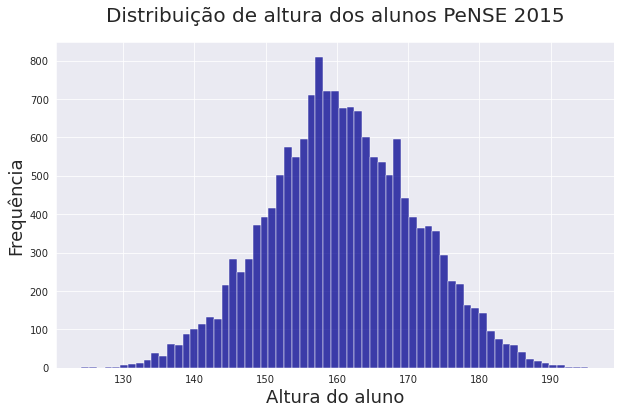

In [39]:
sns.set_palette('gnuplot2')
sns.set_style('darkgrid')

ax = sns.histplot(data=dados_selecionados,
                  x='altura do aluno')
ax.figure.set_size_inches(10,6)
ax.set_title('Distribuição de altura dos alunos PeNSE 2015', fontsize=20, pad=20)
ax.set_ylabel('Frequência', fontsize=18)
ax.set_xlabel('Altura do aluno', fontsize=18)
ax

In [40]:
dados_selecionados['altura do aluno']

0        157.0
1        152.0
2        161.4
3        172.5
4        167.5
         ...  
16551    167.9
16552    185.8
16553    159.4
16554    157.8
16555    163.9
Name: altura do aluno, Length: 16556, dtype: float64

Histogramas são uma forma visual de condensar vários parâmetros estatisticos em um gráfico. Por exemplo, a medida de tendência central **mediana** de um histograma representa o valor mais provável da altura de um aluno escolhido aleatóriamente, já o **desvio padrão** que entra na categoria de medidas de dispersão representa o quanto as alturas dos alunos variam em torno da *mediana*.


In [41]:
from matplotlib import pyplot as plt

<AxesSubplot:title={'center':'Distribuição de altura dos alunos PeNSE 2015'}, xlabel='altura do aluno', ylabel='Count'>

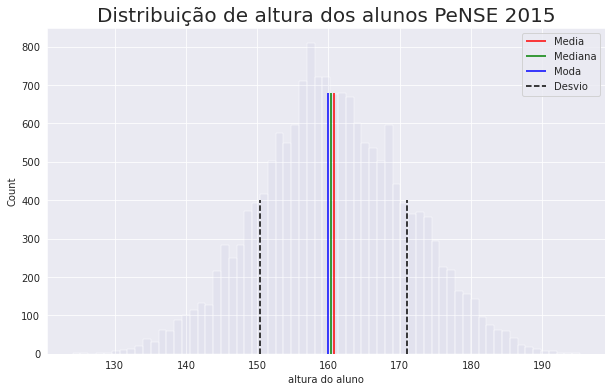

In [42]:
media = dados_selecionados['altura do aluno'].mean()
moda = dados_selecionados['altura do aluno'].value_counts().reset_index()['index'][0]
mediana = dados_selecionados['altura do aluno'].median()
desvio = dados_selecionados['altura do aluno'].std()


ax = sns.histplot(data=dados_selecionados,
                  x='altura do aluno', alpha=0.03)
ax.vlines(media, 0, 680, label='Media', color='red')
ax.vlines(mediana, 0, 680, label='Mediana', color='green')
ax.vlines(moda, 0, 680, label='Moda', color='blue')
ax.vlines(media + desvio, 0, 400, color='black', linestyles='dashed')
ax.vlines(media - desvio, 0, 400, color='black', label='Desvio', linestyles='dashed')

ax.figure.set_size_inches(10,6)
ax.set_title('Distribuição de altura dos alunos PeNSE 2015', fontsize=20)
ax.legend()
ax

Voltando a lei de Sturges a quantidade ideal de grupos era 15:


> **Obs**: Existem várias outras técnicas de estimar o número de "caixinhas" de um histograma atraǘes do hiper parâmetro `bins`. O `Seaborn` usa o módulo `Numpy` por trás dos panos e ela trás várias técnicas aqui: https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges


#### As técnicas que podem ser passadas como hiperparâmetros são: 
> `auto`: Maximum of the ‘sturges’ and ‘fd’ estimators. Provides good all around performance.

> `fd`: (Freedman Diaconis Estimator): Robust (resilient to outliers) estimator that takes into account data variability and data size.

> `doane`: An improved version of Sturges’ estimator that works better with non-normal datasets.

> `scott`: Less robust estimator that that takes into account data variability and data size.

> `stone`: Estimator based on leave-one-out cross-validation estimate of the integrated squared error. Can be regarded as a generalization of Scott’s rule.

> `rice`: Estimator does not take variability into account, only data size. Commonly overestimates number of bins required.

> `sturges`: R’s default method, only accounts for data size. Only optimal for gaussian data and underestimates number of bins for large non-gaussian datasets.

> `sqrt`: Square root (of data size) estimator, used by Excel and other programs for its speed and simplicity.


<AxesSubplot:title={'center':'Distribuição de altura dos alunos PeNSE 2015'}, xlabel='altura do aluno', ylabel='Count'>

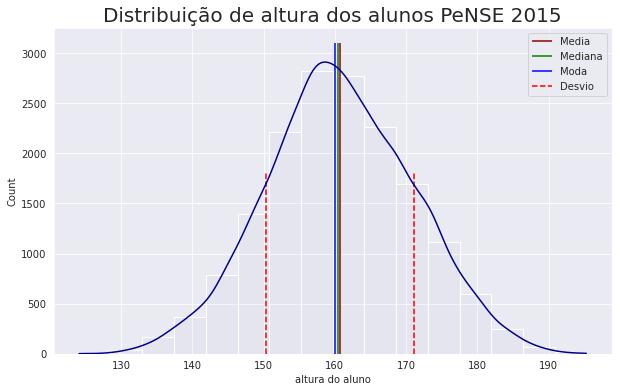

In [43]:
ax = sns.histplot(data=dados_selecionados,
                  x='altura do aluno',bins='sturges', alpha=0.02, kde=True)
ax.vlines(media, 0, 3100, label='Media', color='darkred')
ax.vlines(mediana, 0, 3100, label='Mediana', color='green')
ax.vlines(moda, 0, 3100, label='Moda', color='blue')
ax.vlines(media + desvio, 0, 1800, color='red', linestyles='dashed')
ax.vlines(media - desvio, 0, 1800, color='red', label='Desvio', linestyles='dashed')

ax.figure.set_size_inches(10,6)
ax.set_title('Distribuição de altura dos alunos PeNSE 2015', fontsize=20)
ax.legend()
ax

### Comparando dois histogramas

Como passamos o dataframe atráves do parâmetro `data` podemos utilizar outro parametro chamado de `hue`, ou seja uma tonalidade, e essa tonalidade será de acordo com o sexo, por exemplo: 

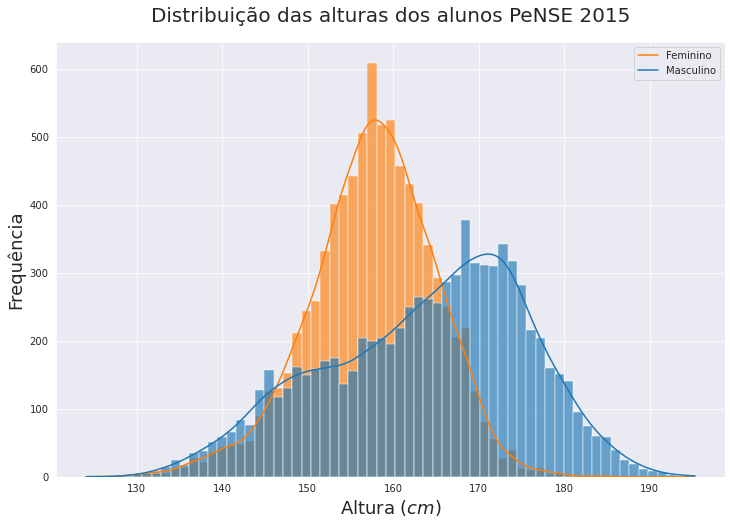

In [44]:
media = dados_selecionados['altura do aluno'].mean()
moda = dados_selecionados['altura do aluno'].value_counts().reset_index()['index'][0]
mediana = (dados_selecionados['altura do aluno'].max() + dados_selecionados['altura do aluno'].min())/2
desvio = dados_selecionados['altura do aluno'].std()

ax = sns.histplot(data=dados_selecionados,
                  x='altura do aluno',
                  hue='sexo', kde=True,
                  palette='tab10', alpha=0.65)

ax.legend(['Feminino', 'Masculino'])
ax.figure.set_size_inches(12,8)
ax.set_title('Distribuição das alturas dos alunos PeNSE 2015',pad=20,fontsize=20)
ax.set_ylabel('Frequência', fontsize=18)
ax.set_xlabel(r'Altura $(cm)$', fontsize=18)
ax;

O histograma é uma excelente forma de visualizar distribuições de dados, entretanto, note que se tivermos muitas categorias fica difícil de analisar o problema, por exemplo o `peso do aluno` de acordo com a `esfera administrativa da escola`

<AxesSubplot:title={'center':'Distribuição dos pesos dos alunos PeNSE 2015'}, xlabel='peso do aluno', ylabel='Count'>

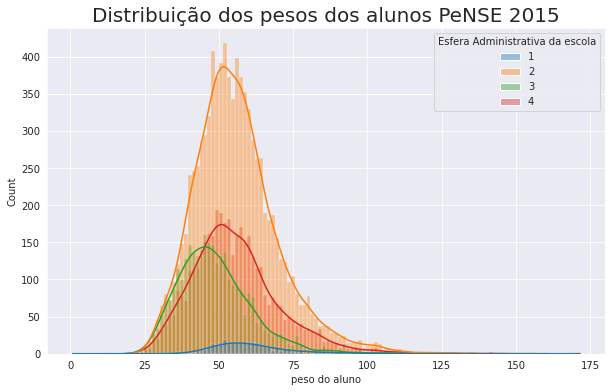

In [45]:
ax = sns.histplot(data=dados_selecionados,
                  x='peso do aluno',
                  hue='Esfera Administrativa da escola', kde=True,
                  palette='tab10', alpha=0.4, legend=True)
ax.figure.set_size_inches(10,6)
ax.set_title('Distribuição dos pesos dos alunos PeNSE 2015', fontsize=20)
ax

Mas pode ficar ainda pior, vamos supor que a olhemos a `altura do aluno` pela idade dele: 

<AxesSubplot:title={'center':'Distribuição das alturas de acordo com a idade dos alunos PeNSE 2015'}, xlabel='VB17004', ylabel='Count'>

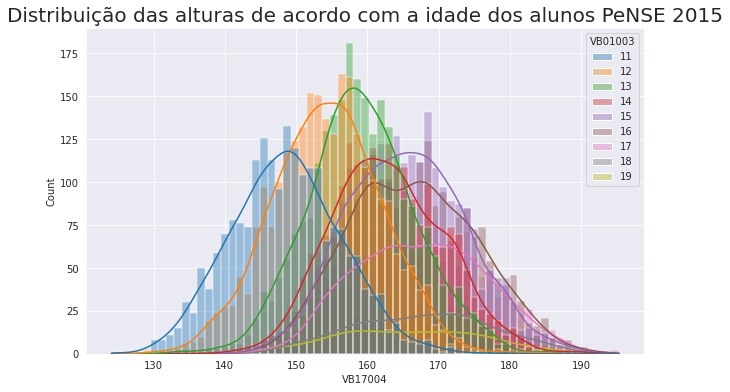

In [46]:
ax = sns.histplot(data=dados,
                  x='VB17004',
                  hue='VB01003', kde=True,
                  palette='tab10', alpha=0.4, legend=True)
ax.figure.set_size_inches(10,6)
ax.set_title('Distribuição das alturas de acordo com a idade dos alunos PeNSE 2015', fontsize=20)
ax

Não da pra concluir nada com esta bagunça. Para evitar essa monstruosidade gráfica utilizamos uma outra representação muito mais organizada chamada **Boxplot**.

### BoxPlot

O boxplot é uma representação gráfica que pode ser usada pra ilustrar informações além dos histogramas, por exemplo, num histograma a informação da mediana e desvio padrão pode ser um tanto subjetiva, já no boxplot é intuitivo.Além disso, o boxplot informa os intervalos inter quartis. Podemos consultar os IQQ usando a função `quantile()` do `pandas`. Para utilizar o boxplot no seaborn:

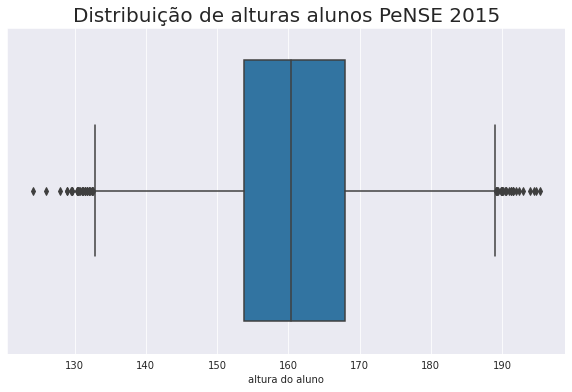

In [47]:
ax = sns.boxplot(data=dados_selecionados,
                  x='altura do aluno', palette='tab10')
ax.figure.set_size_inches(10,6)
ax.set_title('Distribuição de alturas alunos PeNSE 2015', fontsize=20)
ax;

In [48]:
print('Primeiro Quartil: ',dados_selecionados['altura do aluno'].quantile(0.25))

print('Segundo Quartil: ',dados_selecionados['altura do aluno'].quantile(0.50))

print('Terceiro Quartil: ',dados_selecionados['altura do aluno'].quantile(0.75))

print('Quarto Quartil: ',dados_selecionados['altura do aluno'].quantile(1))

Primeiro Quartil:  153.8
Segundo Quartil:  160.4
Terceiro Quartil:  167.9
Quarto Quartil:  195.3


A caixa no meio representa o intervalo interquartil, ou seja, 50% dos dados estão dentro deste intervalo. Á esquerda até a linha vertical temos o primeiro quartil e a direita da caixa até a outra barra vertical temos o quarto quartil. 

Os pontos abaixo do primeiro quartil e acima do quarto quartil são chamados de **outliers**, são pontos que precisam ser investigados com mais calma pois podem conter erros na coletas de dados. O módulo `Seaborn` qualifica esses pontos experimentais como sendo outlier através da técnica chamada **inter-quartile range**.

> O Inter-Quartile-Range, espalhamento médio (midspread) ou H-spread é uma técnica de estatistica descritiva. Faz parte da categoria de medidas de dispersão estatistica. Basicamente o comprimento do intervalo interquartil $IQR$ é a diferença entre o terceiro quartil $Q3$ e o primeiro quartil $Q1$. Utilizando a imagem fica mais fácil de compreender:

$$\text{IQR} = Q3 − Q1$$


<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png' width=45%>


Também é possível usar dois boxplots numa única figura:

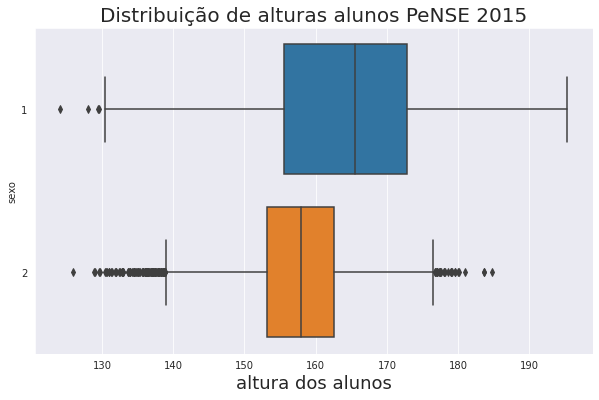

In [49]:
ax = sns.boxplot(data=dados_selecionados,
                 x='altura do aluno', y='sexo',
                 orient='h', palette='tab10')
ax.figure.set_size_inches(10,6)
ax.set_title('Distribuição de alturas alunos PeNSE 2015', fontsize=20)
ax.set_xlabel('altura dos alunos', fontsize=18)
ax;

Quando vamos visualizar mais de um boxplot na mesma figura é importante especificar a orientação da entidade através do parâmetro `orient`, isso porque na vertical ocorre um problema de visualização.

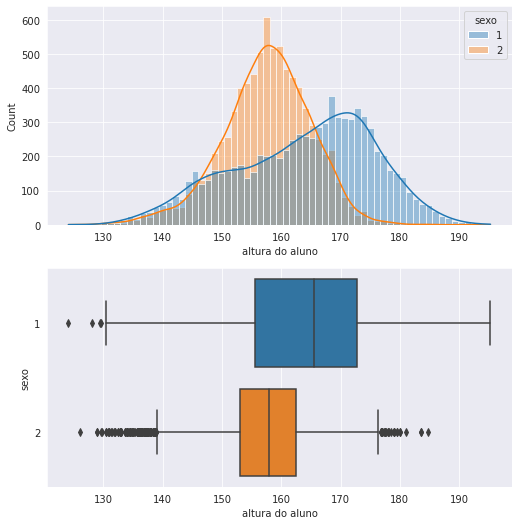

In [50]:
plt.figure(figsize= 1.3 *np.array([6.4, 6.8]))
plt.subplot(2,1,1)
axs = sns.histplot(data=dados_selecionados,
                  x='altura do aluno',
                  hue='sexo', kde=True,
                  palette='tab10', alpha=0.4)
plt.subplot(2,1,2)
axs = sns.boxplot(data=dados_selecionados,
                 x='altura do aluno', y='sexo',
                 orient='h', palette='tab10')


Note que ambos os gráficos trazem informações, entretando o boxplot é muito mais claro com suas informações. Só de olhar podemos verificar que a quantidade de outliers nos dados de altura na categoria sexo feminino é maior do que na categoria masculino. É possível concluir isso apenas olhando a quantidade de pontos fora das linhas verticais dos quartis. 

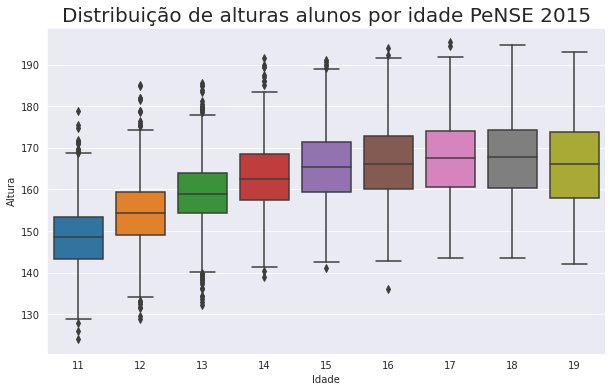

In [51]:
ax = sns.boxplot(data=dados,
                 x='VB01003', y='VB17004', palette='tab10')
ax.figure.set_size_inches(10,6)
ax.set_title('Distribuição de alturas alunos por idade PeNSE 2015', fontsize=20)
plt.xlabel('Idade')
plt.ylabel('Altura')
ax;

Note que com vários boxplots conseguimos comparar simultaneamente várias distribuições de dados. Uma conclusão é que

> 1. *alunos de 11 anos tem uma mediana menor do que alunos mais velhos.*

> 2. *dos 11 as 15 anos a taxa de crescimento dos alunos é maior do que dos 15 aos 19 anos...*

É possível também criar além desta categorização das idades sperar por sexo, usando o parâmetro `hue`: 

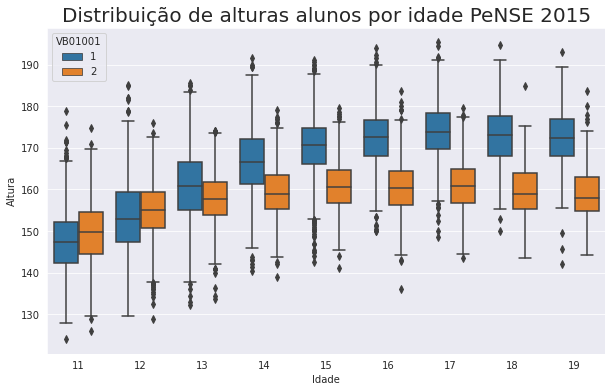

In [52]:
ax = sns.boxplot(data=dados,
                 x='VB01003', y='VB17004', palette='tab10', hue='VB01001')
ax.figure.set_size_inches(10,6)
ax.set_title('Distribuição de alturas alunos por idade PeNSE 2015', fontsize=20)
plt.xlabel('Idade')
plt.ylabel('Altura')
ax;

É possível verificar que mediana das alturas de cada sexo é diferente. É importante salientar que esses dados não são uma série temporal apesar de mostrar idades no eixo X, a pesquisa foi realizada no ano de 2015 ou seja, são alunos com 11 anos em 2015, 12 anos em 2015, 13 anos em 2015, e assim por diante... Até porque nem faz sentido, por exemplo a diminuição da mediana dos 18 aos 19 anos no sexo feminino, as pessoas não encolheram (HAHA).

Outro ponto é que a taxa de variação das alturas entre os alunos do sexo feminino e masculino é diferente. Lembrando quê essas informações são referentes a amostra do PeNSE 2015. Então é preciso verificar mais a fundo se as condições para estimar os parâmetros da população são satisfeitas.

## Histograma acumulativo

Outra forma bem útil de utilizar um histograma é exibir os dados de forma acumulativa, assim é possível identificar as medidas de separatrizes, os percentis, que são as porcentagens dos dados. Para isso é necessário implementar os parâmetros `cumulative` e `stat`, do método `histplot()`:


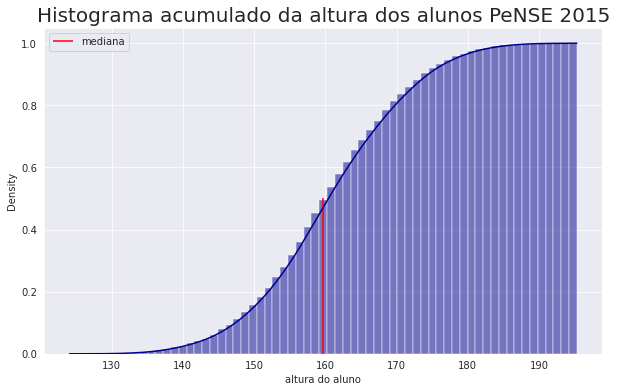

In [53]:
ax = sns.histplot(data=dados_selecionados,
                  x='altura do aluno', kde=True,
                  cumulative=True, stat='density')
plt.vlines(mediana,0,0.5, color='red', label='mediana')
ax.figure.set_size_inches(10,6)
ax.legend()
ax.set_title('Histograma acumulado da altura dos alunos PeNSE 2015', fontsize=20)
ax;

Note que a densidade das alturas dos alunos esta expressa no eixo Y e altura no eixo X. Bom, note que a linha vermelha é a mediana, ou seja, divide os dados ao meio. Como exibimos a mediana da densidade das alturas temos garantia que abaixo da linha vermelha estão 50% de todas as alturas dos alunos.

Podemos dividir o histograma ainda em 15 caixas pela condição de Sturges:

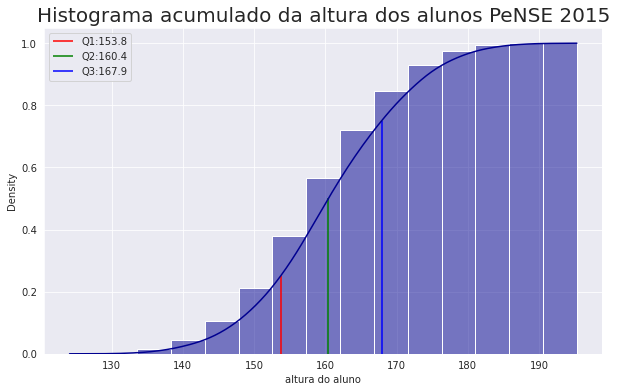

In [54]:
q1 = dados_selecionados['altura do aluno'].quantile(0.25)
q2 = dados_selecionados['altura do aluno'].quantile(0.50)
q3 = dados_selecionados['altura do aluno'].quantile(0.75)

ax = sns.histplot(data=dados_selecionados,
                  x='altura do aluno',bins=15,
                  cumulative=True, stat='density', kde=True)
plt.vlines(q1,0, 0.25, color='red', label=f'Q1:{q1}')
plt.vlines(q2,0, 0.50, color='green', label=f'Q2:{q2}')
plt.vlines(q3,0, 0.75, color='blue', label=f'Q3:{q3}')

ax.figure.set_size_inches(10,6)
ax.legend()
ax.set_title('Histograma acumulado da altura dos alunos PeNSE 2015', fontsize=20)
ax;

O histrograma cumulativo é útil quando queremos veirificar a proporção das distribuições dos dados. 

> Note que em até Q1 temos garantia que 25% de todos os alunos estão acima de 153.8cm

> Em Q2 temos garantia que 50% de todos os alunos estão abaixo de 160.4cm

> Em Q3 temos garantia de que 75% dos alunos estão abaixo de 167.8cm.

# Medidas de centralidade

Já foram citados os quartis que são medidas separatrizes, agora vou citar as medidas de centralidade ou de tendência central. Essas medidas são muito importantes, tanto em estatistica descritiva quanto em probabilidade.

## Média 

A média é basicamente a soma de todos os dados divido pela quantidade de dados. Pode ser aplicada em dados quantitativos discretos ou contínuos. Ela equilibra os dados resultando num único valor que representa um conjunto de dados.

> É importante salientar que a média é um único valor que representa um conjunto de dados, portanto ao utilizar a média devemos sempre tomar cuidado porque ela representa um conjunto de dados mas ela não é o dado bruto.

## Moda 

A moda é o valor mais frequete, ou seja, o valor que mais aparece nos dados, tanto em dados quantitativos ou qualitativos. Pode ser utilizada similar a média com a ressalva anterior. 

In [55]:
altura_media = dados_selecionados['altura do aluno'].mean()
altura_moda = dados_selecionados['altura do aluno'].mode()

print(f'Média das alturas: {altura_media}')
print(f'Moda das alturas: {altura_moda}')

Média das alturas: 160.71311307078818
Moda das alturas: 0    160.0
dtype: float64


### `GroupBy`

Podemos agrupar dados de acordo com uma coluna usando o método `groupby` do pandas:

In [56]:
print('Altura média dos alunos de acordo com o sexo:')
dados_selecionados.groupby('sexo')['altura do aluno'].mean().rename(index=sexo)

Altura média dos alunos de acordo com o sexo:


sexo
Masculino    163.860758
Feminino     157.558617
Name: altura do aluno, dtype: float64

Aqui podemos verificar numéricamente o que já era visível nos dados do boxplot.

In [57]:
print('Altura média dos alunos de acordo com a esfera administrativa da escola:')
dados_selecionados.groupby('Esfera Administrativa da escola')['altura do aluno'].mean().rename(index=esfera_Administrativa_da_escola)

Altura média dos alunos de acordo com a esfera administrativa da escola:


Esfera Administrativa da escola
Municipal    168.266333
Estadual     161.953058
Federal      155.869173
Privada      161.058970
Name: altura do aluno, dtype: float64

In [58]:
dados_selecionados.groupby('usou bebida alcoolica')['sexo'].sum().rename(index=usou_bebida_alcoolica)

usou bebida alcoolica
Pulo no questionário     7179
Sim                     10618
Não                      6998
Não informado              30
Name: sexo, dtype: int64

In [59]:
dados_selecionados.groupby('responsáveis fuma')['sexo'].sum().rename(index=responsaveis_fuma)

responsáveis fuma
Pulo no questionário                             7179
Nenhum deles                                    12929
Só meu pai ou responsável do sexo masculino      2176
Só minha mãe ou responsável do sexo feminino     1412
Meu pai e minha mãe ou responsáveis               708
Não sei                                           381
Não informado                                      40
Name: sexo, dtype: int64

## Groupby com mais de um parâmetro

É possível fornecer uma lista ao `groupby`, por exemplo: 

In [60]:
dados_selecionados.groupby(['usou bebida alcoolica',
                            'responsáveis fuma'])['como se sente em relação ao seu corpo'].sum()

usou bebida alcoolica  responsáveis fuma
-1                     -1                   15253
 1                      1                   15413
                        2                    3592
                        3                    2422
                        4                     834
                        5                     687
                        99                    205
 2                      1                   11221
                        2                    1270
                        3                     795
                        4                     293
                        5                     483
                        99                    205
 99                     1                     105
                        3                     101
                        5                      99
                        99                   1684
Name: como se sente em relação ao seu corpo, dtype: int64

In [61]:
pd.crosstab(dados_selecionados['como se sente em relação ao seu corpo'],
            dados_selecionados['usou bebida alcoolica'],
           normalize=True).rename(columns=usou_bebida_alcoolica,
                                  index=como_se_sente_em_relação_ao_seu_corpo)*100

usou bebida alcoolica,Pulo no questionário,Sim,Não,Não informado
como se sente em relação ao seu corpo,,,,
Muito satisfeito(a),10.769510,8.540710,8.516550,0.006040
Satisfeito(a),10.515825,18.712249,12.545301,0.024160
Indiferente,2.778449,5.188451,2.947572,0.000000
Insatisfeito(a),2.742208,7.870259,3.436820,0.000000
Muito insatisfeito(a),1.268422,2.071756,0.972457,0.000000
Não informado,0.350326,0.368446,0.253684,0.120802


### Crosstab e GroupBy 

Podem parecer funcionalidades iguais, mas são fundamentalmente diferentes. Enquanto o `Crosstab` cruza duas séries, o `GroupBy` agrupa por uma série.

In [62]:
# agrupando por sexo, escolhendo a coluna "altura do aluno" o desvio padrão
dados_selecionados.groupby('sexo')['altura do aluno'].std()

sexo
1    11.806296
2     7.382766
Name: altura do aluno, dtype: float64

Existe outra forma de obter o mesmo resultado do groupby:

In [63]:
display(dados_selecionados.query('sexo == 1')['altura do aluno'].std())
display(dados_selecionados.query('sexo == 2')['altura do aluno'].std())

11.80629615182659

7.382765552967612

# Medidas de Centralidade e Dispersão

Como já foi dito anteriormente a média e moda, é um único valor que tem um objetivo de representar todo o conjunto de dados, seja ele quantitativo ou qualitativo. O problema é que ao utilizar a média em muitos caso perde-se informação sobre todo o conjunto. Vejamos por exemplo:

In [64]:
# salarios em reais
salario_1 = 9000
salario_2 = 1000

salario_medio = (salario_1 + salario_2) / 2 
salario_medio

5000.0

No exemplo acima o salario médio é de 5000 reais, mas é a média, ele não representa o conjunto total dos dados, vejamos outro exemplo: 

In [65]:
# salarios em reais
salario_1 = 9999
salario_2 = 1

salario_medio = (salario_1 + salario_2) / 2 
salario_medio

5000.0

Note que novamente o valor médio do salario foi de 5000, mas são dados completamente diferentes. Se esse salário fosse utilizado para informar o valor médio do salário numa vaga de emprego, caso aluém venha a ser contratado, o salaŕio será mais próximo do `salario_1`ou do `salario_2`? A média não responde essa pergunta...

Em probabilidade e estatistica existem 4 valores chamados de **estatisticas** que são suficientes para descrever completamente um conjunto de dados, eles são: 

Considere $X$ um conjunto de $n$ variáveis aleatórias, tais que $X = \{x_1,x_1,\dots,x_n\}$, então as estatisticas desse conjunto de variáveis são:

> **Média:** É definida como o valor que demonstra a concentração dos dados de uma distribuição, como o ponto de equilíbrio das frequências em um histograma.

$$\mu = \frac{1}{n}\sum_i^n x_i$$

> **Variancia:**  Variância de uma variável aleatória ou processo estocástico é uma medida da sua dispersão estatística, indicando "o quão longe" em geral os seus valores se encontram do valor esperado. Se $\mu = E(X)$, tal quê
$$E(X) = \frac{1}{n}\sum_i^n X $$

> é o **valor esperado** (*média*) da variável aleatória X, então a variância é:

$$\text{Var}(X) = E((X - \mu)^2) = \frac{1}{n}\sum_i^n{(X - \mu)^2},$$

> *Note que a variância terá uma unidade quadratica em relação à variável aleatória, em muitos casos se extrai a raiz quadrada da variância para a dispersão dos dados ter a mesma unidade dos dados.*


> **Desvio Padrão:** É uma medida de dispersão em torno da média populacional de uma variável aleatória. O termo possui também uma acepção específica no campo da estatística, na qual também é chamado de desvio padrão amostral (comumente representado pela letra latina $\sigma$ e indica uma medida de dispersão dos dados em torno de média amostral. 

$$\sigma = \sqrt{\text{Var}(X)} = \sqrt{E((X - \mu)^2)},$$

> **Curtose**: é uma medida de forma que caracteriza o achatamento da curva da função de distribuição de probabilidade. Definido como:

 $$\frac {m_{4}(\mu )}{\sigma ^{4}}+(-3),$$
> Onde $m_4(\mu)$ é o quarto momento central e σ é o desvio-padrão. Por definição o n-ésimo momento da variável aleatória $X$, cuja função densidade é dada por $f$, é definido por:

$$\mu_{\color{Red}n}=E\left[ X^{\color{Red}n} \right] = \int_{-\infty}^{\infty} x^{\color{Red}n}f(x)dx.$$

> Para cada número inteiro $\color {Red}n$, o $\color {Red}n$-ésimo momento central de uma variável aleatória $X$ é definido como:

$$\mu_{\color{Red}n}=E \left [ X - E(X) \right ]^{\color{Red}n}$$

> **Detalhe: Todas essas estatisticas são amostrais, não populacionais**.

O exemplo do salário médio dos funcionários pode ser utilizado para entender a distribuição das alturas dos alunos. 

In [66]:
dados_selecionados.groupby('sexo').describe()['altura do aluno']

,count,mean,std,min,25%,50%,75%,max
sexo,,,,,,,,
1,8287.0,163.860758,11.806296,124.1,155.5,165.5,172.75,195.3
2,8269.0,157.558617,7.382766,126.0,153.1,158.0,162.50,184.8


In [67]:
dados_selecionados.groupby('sexo').describe()['peso do aluno']

,count,mean,std,min,25%,50%,75%,max
sexo,,,,,,,,
1,8287.0,56.724436,16.100653,0.8,45.7,55.5,65.0,171.5
2,8269.0,52.682332,12.481686,20.9,44.4,51.2,58.8,158.2


> O método `describe()` oferece o conjunto de estatisticas descritivas: *média, desvio, minimo, primeiro, segundo e terceiro quartil e o valor máximo.*

> É possível obter a estatistica curtose (ou kurtosis) através do método do pandas `kurtosis()`, lembrando que esta estatistica da uma medida de "achatamento" da distribuição.

In [68]:
display(dados_selecionados.query('sexo == 1')['altura do aluno'].kurtosis())
display(dados_selecionados.query('sexo == 2')['altura do aluno'].kurtosis())

-0.5098452215458575

0.4834834764114029

**DataFrame.kurtosis**(axis=None, skipna=None, level=None, numeric_only=None, **kwargs)

> Return unbiased kurtosis over requested axis.

> Kurtosis obtained using Fisher’s definition of kurtosis (`kurtosis of normal == 0.0`). Normalized by N-1

Através do `kurtosis()` podemos concluir que a distribuição de altura dos alunos do sexo masculino é mais achatada que a normal e também é possível concluir que a distribuição de alturas das alunas é menos achatada que a distribuição normal.


Além da média e mediana, existe a moda, que é geralmente o valor mais frequente de uma variável qualitativa. E além da variância $\text{Var}(x)$ e o desvio padrão $\sigma$ existe outra medida de dispersão chamada **Coeficiente de Variação** $\text{CV}$.

> **Coeficiente de Variação**: Consiste em uma meddia relativa de dispersão útil para a comparação em termos relativos ao grau de concentração em torno da média. Para uma amostra é calculado da seguinte maneira: 

$$\text{CV} = \frac{\sigma}{\mu}\times100$$

* **Baixa Dispersão**: $CV \le 15\%$

* **Media Dispersão**: $15\% < CV < 30\%$

* **Grande Dispersão**: $CV \ge 30\%$




In [69]:
coef_variacao = (dados_selecionados['altura do aluno'].std() / dados_selecionados['altura do aluno'].mean())*100
coef_variacao

6.433868423215336

In [70]:
coef_variacao_m = (dados_selecionados.query('sexo == 1')['altura do aluno'].std() / dados_selecionados.query('sexo == 1')['altura do aluno'].mean())*100
print('Coeficiente de variação altura meninos: ',coef_variacao_m)

Coeficiente de variação altura meninos:  7.205078451588827


In [71]:
coef_variacao_f = (dados_selecionados.query('sexo == 2')['altura do aluno'].std() / dados_selecionados.query('sexo == 2')['altura do aluno'].mean())*100
print('Coeficiente de variação altura meninas: ',coef_variacao_f)

Coeficiente de variação altura meninas:  4.68572631319879


# Intervalo de Confiança e Testes 

A inferência estatistica tem por objetivo fazer generalizações sobre uma população com base nos dados de uma amostra. Dentro desta concepção existem dois problemas básicos:

**A)** Estimação de parâmetros

**B)** Teste de hipótese sobre os parâmetros.

Lembrando que os parâmetros são funções de valores populacionais (*o universo dos dados*), enquanto as estatisticas são funções de valores amostrais (*parte da população*). 

Em geral não temos acesso a parâmetros então usamos um estimador para ele, baseado em dados amostrais.

> **Definição**: Um estimador $T$ do parâmetro $\theta$ é qualquer função das observações amostrais, ou seja, se $X$ é um conjunto de variáveis aleatórias, tais que $X = \{x_1,x_2,...,x)n$, então o estimador é tal que $T= g(x_1,x_2,...,x_n)$

O problema então da estimação é, então, determinar uma função $T = g(x_1,x_2, ..., x_n)$ que seja próxima do parâmetro $\theta$.

> **Definição**: O estimador $T$ é não enviesado para $\theta$ se,

$$E(T) = \theta,$$

> para todo $\theta$.

Se o estimador $T$ for enviesado então vai existir uma variância entre o estimador e o parâmetro, chamado de viés, tal que: 

$$\text{Vies}=\text{Var}(E(T) - \theta) = E(T) - \theta$$

> **Definição**: A estimativa é o valor assumido pelo estimador em uma amostra particular.

Geralmente os estimadores são indicados com um **^** em cima. Por exemplo se $\mu$ é a média amostral então, $\hat\mu$ é o estimador da média populacional.

É importante salientar que pra cada estatistica existe um estimador para o parâmetro da população.

> **MORETTIN, Pedro Alberto; BUSSAB, WILTON OLIVEIRA. Estatística básica. Saraiva Educação SA, 2017.**

--- 

Até agora, todos os estimadores apresentados foram pontuais, isto é, especificam um único valor para o estimador. Esse processo não permite julgar qual a possível magnitude do erro que estamos cometendo por exemplo ao usar a média amostral ($\hat\mu$) como uma estimativa da média populacional. **Disso surge a ideia de contruir intervalos de confiança, que são baseados nas distribuições amostrais dos estimadores.**

A maioria dos estimadores de parâmetros apresentados até aqui são pontuais, isto é, especificam um único valor para o parâmetro se baseando em informações amostrais. Mas esta forma de estimar um parâmetro não é a mais adequada pra julgar a magnitude do erro associado a estimação do parâmetro. 

Disso surge a ideia de contruir um intervalo de confiança, que são baseados nas distribuições amostrais dos estimadores pontuais.

**Exemplo**:

> Suponha que queiramos estimar a média $\mu$ (parâmetro) de uma população qualquer e para tanto usamos a média $\bar{X}$ de uma amostra de $n$ elementos. Usando o teorema do limite central, temos:

$$e = (\bar{X} - \mu) \sim N(0, \sigma^2)$$

> com $\text{Var}(\bar{X}) = \frac{\sigma_{\bar{X}}^{2}}{n}$. Daqui é possível determinar qual a probabilidade de cometer erros de determinadas magnitudes, Veja:

$$P(|e| < 1,96\sigma_{\bar{X}}) = 0.95$$

$$P(|\bar{X} - \mu| < 1,96\sigma_{\bar{X}}) = 0.95$$


## Stats models 

Existem vários módulos com rotínas estatisticas no python, além do scipy existe o [Stats Models](statsmodels.org/), dentro deste módulo vou utilizar um conjunto de ferramentas que "pesos estatisticos " ou melhor `weightstats`.

Dentro do Weightstats tem uma função chamada `zconfint` que retorna o intervalo de confiança de uma lista de valores amostrais:

In [72]:
from statsmodels.stats.weightstats import zconfint

In [73]:
zconfint(dados_selecionados['altura do aluno'])

(160.5556082427712, 160.87061789880892)

Os parâmetros que essa função aceita são: 

**statsmodels.stats.weightstats.zconfint**(x1, x2=None, value=0, alpha=0.05, alternative='two-sided', usevar='pooled', ddof=1.0)

> confidence interval based on normal distribution z-test

O significado estatistico desse intervalo `(160.5556082427712, 160.87061789880892)` é que a média populacional tem 95% de chance de estar dentro deste intervalo. A precisão de 95% tem a ver com o valor de confiança, note que um dos parâmetros do `zconfint` é o `alpha=0.05` este parâmetro da função (parametro da função é diferente de um parâmetro estatistico) é o nível de significância. A sígnificancia é o complementar da confiança. 

Se queremos por exemplo um nível de confiança de 99% é necessário que o alpha  seja igual a 1%, ou seja 0.01. Mas em muitos casos isso não é necessário, um nível de significância de 5% é um com indicador de confiança.


Na refeência **MORETTIN, Pedro Alberto; BUSSAB, WILTON OLIVEIRA. Estatística básica. Saraiva Educação SA, 2017** o autor da um exemplo de que o nível de confiança é uma medida probabilistica.

>  Por exemplo imagine que você gera 20 amostras aleatóriamente contendo cada uma 25 variáveis que se distribuem normalmente com uma média $\mu=5$ e um desvio padrão $\sigma = 3$. Para cada amostra construimos um intervalo de confiança para $\mu$ com um coeficiente de confiança $\gamma = 0.95$. O intervalo de confiança garante que dessas 20 amostras pelo menos 19 delas contém a média populacional.


### Exemplo de Intervalo de Confiança com vinhos

https://archive.ics.uci.edu/ml/datasets/Wine

> P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

In [74]:
url = url = 'https://raw.githubusercontent.com/allanspadini/linear_estatistica/main/winequality-red.csv'
vinho = pd.read_csv(url,sep=';')
display(vinho.head())
vinho.shape

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(1599, 12)

Temos ao total 12 variáveis para cada um dos 1599 registros de vinhos. O objetivo é tentar selecionar um conjunto de vinhos aleatóriamente com um numero relativamente pequeno mas que consiga representar os 1599 registros.

### Nível de confiança 

Qual é a chance de uma amostra aleatória simples retratar a realidade da população? 

Isto é mensurado pelo **nível de confiança** ($1 - \alpha$), ele representa a probabilidade de acerto da estimativa feita pelo estimador. De forma complementar ao nível de confiança temos o **nível de significância** ($\alpha$) que expressa a probabilidade de erro na estimativa.

O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de um determinado intervalo. Quando fixamos em uma pesquisa um nível de confiança de $95\%$, por exemplo, estamos assumindo que existe uma probabilidade de $95\%$ dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.

O **nível de confiança** de uma estimativa pode ser obtido a partir da área sob a curva de uma distribuição normal, como é ilustrado a baixo: 

<img src="https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img007.png" width=50%>

Note que se queremos uma confiança de $0.95$ então teremos uma significância de $0.05$, então são $0.025$ para cada extremidade da curva de sino.

Para calcular $z$ (variável aleatória normalizada, que será descrita mais adiante) precisamos utilizar o **erro inferencial** ou **erro amostral da média**, descrito por:

$$e = z\frac{\sigma}{\sqrt{n}}$$

> Suponha que **a densidade do vinho se distribui aproximadamente como uma normal**. Calcule o desvio padrão e a média de uma amostra de 1000 elementos. Construa um intervalo de confiança para a média populacional assumindo uma significância de $5\%$

In [75]:
amostra = vinho.sample(n = 1000, random_state=222)
amostra.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
878,8.8,0.61,0.19,4.0,0.094,30.0,69.0,0.99787,3.22,0.50,10.0,6
1494,6.4,0.31,0.09,1.4,0.066,15.0,28.0,0.99459,3.42,0.70,10.0,7
688,7.7,0.66,0.04,1.6,0.039,4.0,9.0,0.99620,3.40,0.47,9.4,5
733,7.0,0.45,0.34,2.7,0.082,16.0,72.0,0.99800,3.55,0.60,9.5,5
1446,6.9,0.63,0.02,1.9,0.078,18.0,30.0,0.99712,3.40,0.75,9.8,5


In [76]:
desvio_padrao_amostral = amostra['density'].std()
desvio_padrao_amostral

0.001881205938269966

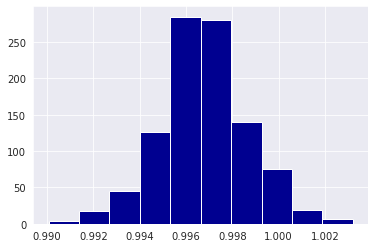

In [77]:
amostra['density'].hist();

In [78]:
significancia = 0.05
confianca = 1 - significancia

Valores de $z$ para os níveis de confiança mais utilizados, que é o valor da área sob a curva normal:

|Nível de<br>confiança|Proporção da área sob<br>a curva normal| $z$ |
|:----------------:|:---------------------------------:|:---:|
|90%               |0,95                               |1,645|
|95%               |0,975                              |1,96 |
|99%               |0,995                              |2,575|


In [79]:
z = 1.96

Como a distribuição normal tem média zero então o valor associado a uma confiança de $95\%$ tem área sob a curva de $0.975$ que no caso é $0.950+0.025$ onde o valor de $0.025$ é metade dos outros $0.5$ que falta, veja a imagem:

<img src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img008.png' width=60%>

In [80]:
sigma = desvio_padrao_amostral / np.sqrt(len(amostra))
sigma

5.9488955127672086e-05

In [81]:
erro = z * sigma
erro

0.00011659835205023728

como a primeira diferença acorre na 4 casa decimal essa é a maior precisao que temos sobre o desvio padrão amostral, logo podemos arredondar:

In [82]:
erro = erro.round(4)
erro

0.0001

A variável `erro` representa o erro inferencial. E a unidade de medida dele é a mesma da densidade do vinho, então basicamente temos um erro pra mais ou pra menos ao estimar a media populacional.

Como estão na mesma unidade ai sim é possível fazer operações algébricas com o valor do erro envolvendo a variável de estudo (densidade do vinho). Além disso, é importante o valor do erro estar na mesma unidade da variável porque ai sim é possível obter o intervalo de confiança de um estimador:

In [83]:
media_amostral_density = round(amostra['density'].mean(),4)
media_amostral_density

0.9968

In [84]:
intervalo_conf_media_populacional = (media_amostral_density - erro,
                                     media_amostral_density+erro)
intervalo_conf_media_populacional

(0.9967, 0.9969)

Então temos garantia de que existe 95% de chance do valor da média estar dentro deste intervalo. Podemos fazer um teste calculando o valor da media populacional tendo em vista que temos 1599 registros:

In [85]:
vinho['density'].mean()

0.9967466791744833

O processo de calcular o intervalo de confiança é bem repetitivo. O módulo `SciPy` tem uma função que permite o calculo do intervalo de confiança de forma automatizada:

In [86]:
from scipy.stats import norm

In [87]:
# note que o alpha não é a significancia
# como estamos acostumados a denotar na estatistica
norm.interval(alpha=0.95, loc=media_amostral_density, scale=sigma)

(0.9966834037904718, 0.9969165962095282)

**scipy.stats.norm.interval**(alpha, loc=0, scale=1)

> Endpoints of the range that contains alpha percent of the distribution

## Estatistica Descritiva e Teste de Pesos 

Média, moda, desvio padrão, curtose, intervalo de confiança, significancia, são chamadas de estatisticas descritivas. A biblioteca `StatsModels` tem uma classe chamada [DescrStatsW](https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.DescrStatsW.html?highlight=descrstatsw#statsmodels.stats.weightstats.DescrStatsW) que condensa todas estas informações de forma automatizada.

> Descriptive statistics and tests with weights for case weights

> Assumes that the data is 1d or 2d with (nobs, nvars) observations in rows, variables in columns, and that the same weight applies to each column.

> If degrees of freedom correction is used, then weights should add up to the number of observations. ttest also assumes that the sum of weights corresponds to the sample size.

> This is essentially the same as replicating each observations by its weight, if the weights are integers, often called case or frequency weights.

Existem muitos detalhes técnicos relacionados ao *t test* ou também conhecido como *teste t de Student*. **O teste t de Student vem da distribuição que Student propôs, ela é importante no que se refere às inferências sobre médias populacionais.**. Student é o um pseudômino de *William Sealy Gosset*, um químico que trabalhou na cervejaria Guiness que fez avanços significativos no estudo das distribuições e testes estatistico. Entretanto devido a uma política de contrato não poderia divulgar as informações, por isso Gosset publicava artigos usando o pseudônimo Student (Estudante).

> SALSBURG, David; MLODINOW, LEONARD. Uma senhora toma chá. Como a estatística revolucionou a ciência no século XX, 2009.



In [88]:
from statsmodels.stats.weightstats import DescrStatsW

como eu disse essa é uma classe então você passa os dados como argumento e ela resulta em um objeto que contém vários atributos (medidas de tendência central) e métodos (testes estatisticos):

In [89]:
descr_stats_altura_alunos = DescrStatsW(dados_selecionados['altura do aluno'])

In [90]:
print('media:', descr_stats_altura_alunos.mean)
print('desvio:', descr_stats_altura_alunos.std)

media: 160.71311307078992
desvio: 10.339757953495079


Podemos obter o intervalo de confiança, que é um intervalo matemático onde existe a probabilidade de 95% do valor estar dentro deste range:

In [91]:
intervalo_conf_altura = descr_stats_altura_alunos.tconfint_mean()
intervalo_conf_altura

(160.5555967264928, 160.87062941508702)

ou seja, tendo em vista o intervalo de confiança temos garantia de pelo menos 95% de chance da média populacional estar dentro do intervalo $(160.556, 160.871)$, note que é um intervalo fechado. 

Podemos exibir este intervalo no gráfico das alturas:

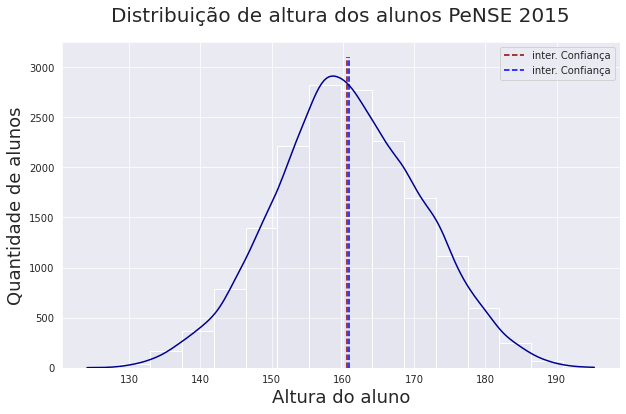

In [92]:
ax = sns.histplot(data=dados_selecionados,
                  x='altura do aluno',bins='sturges', alpha=0.02, kde=True)
ax.vlines(intervalo_conf_altura[0], 0, 3100,label='inter. Confiança', color='darkred',linestyles='dashed')
ax.vlines(intervalo_conf_altura[1], 0, 3100,label='inter. Confiança', color='blue',linestyles='dashed')


ax.figure.set_size_inches(10,6)
ax.set_title('Distribuição de altura dos alunos PeNSE 2015', fontsize=20, pad=20)
ax.set_ylabel('Quantidade de alunos',fontsize=18)
ax.set_xlabel('Altura do aluno',fontsize=18)
ax.legend()
ax;

Podemos por exemplo fazer um teste estatistico de comparação de médias:

In [93]:
descr_stats_altura_meninos = DescrStatsW(dados_selecionados.query('sexo == 1')['altura do aluno'])
descr_stats_altura_meninas = DescrStatsW(dados_selecionados.query('sexo == 2')['altura do aluno'])

In [94]:
compare_means = DescrStatsW.get_compare(descr_stats_altura_meninas, descr_stats_altura_meninos)

**CompareMeans.ttest_ind**(alternative='two-sided', usevar='pooled', value=0)[source]¶

> **ttest for the null hypothesis of identical means**

> this should also be the same as onewaygls, except for ddof differences

In [95]:
tstat, pvalue, _ = compare_means.ttest_ind()
tstat, pvalue

(-41.16851708819408, 0.0)

**CompareMeans.ztest_ind**(alternative='two-sided', usevar='pooled', value=0)[source]¶

> **z-test for the null hypothesis of identical means**

In [96]:
tstat, pvalue = compare_means.ztest_ind()
(tstat, pvalue)

(-41.16851708819408, 0.0)

Note que com um objeto do tipo `Compare_means` podemos chamar vários métodos que são testes estatisticos. O geralmente testes estatisticos retornam uma estatistica de teste `tstat` e o `pvalor`. 

> O **pvalor** é uma probabilidade resultante das duas distribuições. Num teste estatistico temos hipóteses a serem testadas, em um teste de comparação de médias, a hipótese nula é de que **as médias são iguais**, e a hipótese alternativa nega a alternativa. Quando o pvalor é menor que $0.05$, **rejeita-se a hipótese nula**.

Antes de cada teste eu explicitei a hipótese nula, para ficar claro que ao calcular o pvalor e verificar que ele é menor do que $0.05$ rejeitamos a hipótese nula. 

> **Tendo em vista o teste estatistico (t test) podemos rejeitar a hipótese de que a altura média dos alunos masculinos e femininos são iguais.**

In [97]:
pvalue < 0.05

True

Note que se que comparamos um conjunto de dados com ele mesmo, a probabilidade deles serem iguais é de: 

In [98]:
from statsmodels.stats.weightstats import ztest

_, pvalor = ztest(dados_selecionados.query('sexo==1')['altura do aluno'],
                 dados_selecionados.query('sexo==1')['altura do aluno'])
print('p-valor:', pvalor)

p-valor: 1.0


a probabilidade que tenham a mesma média é de 1.0 ou seja 100%. Então além de uma análise visual a respeito das médias, tanto usando o histograma quanto o boxplot também é possível aplicar um teste estatistico de comparação de médias:

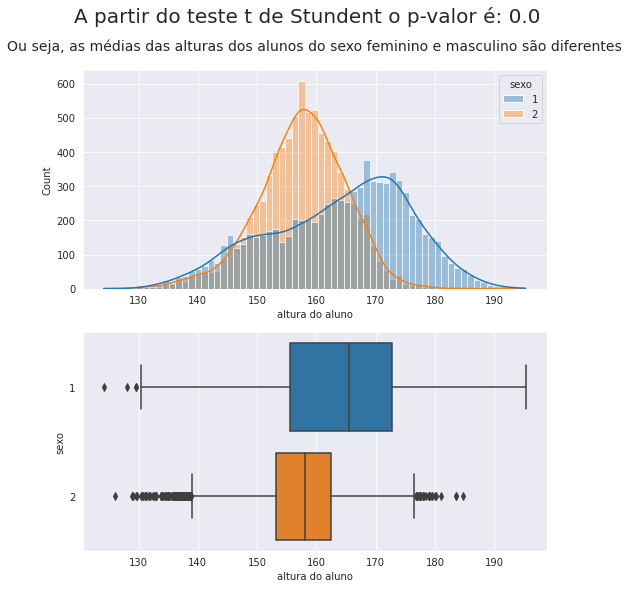

In [99]:
_, pvalor = ztest(dados_selecionados.query('sexo==1')['altura do aluno'],
                 dados_selecionados.query('sexo==2')['altura do aluno'])

plt.figure(figsize= 1.3 *np.array([6.4, 6.8]))
plt.subplot(2,1,1)

plt.suptitle(f'A partir do teste t de Stundent o p-valor é: {pvalor}', fontsize=20)
plt.title('Ou seja, as médias das alturas dos alunos do sexo feminino e masculino são diferentes',fontsize=14, pad=20)
axs = sns.histplot(data=dados_selecionados,
                  x='altura do aluno',
                  hue='sexo', kde=True,
                  palette='tab10', alpha=0.4)
plt.subplot(2,1,2)
axs = sns.boxplot(data=dados_selecionados,
                 x='altura do aluno', y='sexo',
                 orient='h', palette='tab10')



ax;
#print('A partir do teste t de Stundent o p-valor é: ', pvalor)



como é possível verificar visualmente acima as médias são diferentes

Mas existe um ponto importante: Para aplicar o Z teste é necessário algumas condições:

> O tamanho da amostra seja maior que 30

> A distribuição dos dados deve ser uma normal

Ou seja, norte que os dados das alturas do sexo feminino se distribuem aproximadamente como uma normal, mas os dados do sexo masculino aparentemente não. 

Para isso existe um teste de normalidade, ou [**normal test**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html) no `scipy`.


**scipy.stats.normaltest**(a, axis=0, nan_policy='propagate')[source]

> Test whether a sample differs from a normal distribution.

> This function tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s [1], [2] test that combines skew and kurtosis to produce an omnibus test of normality.

**D’Agostino, R. B. (1971), “An omnibus test of normality for moderate and large sample size”, Biometrika, 58, 341-348**

**D’Agostino, R. and Pearson, E. S. (1973), “Tests for departure from normality”, Biometrika, 60, 613-622**


In [100]:
from scipy.stats import normaltest

normaltest(dados_selecionados.query('sexo==1')['altura do aluno'])

NormaltestResult(statistic=341.30659152353655, pvalue=7.695118853996524e-75)

Note que a hipótese nula do teste de normalidade é que a amostra se distribui como uma normal, tendo em vista que o $\text{pvalor} << 0.05$ então rejeitamos a hipótese de que a amostra se distribui como uma normal.

In [101]:
normaltest(dados_selecionados.query('sexo==2')['altura do aluno'])

NormaltestResult(statistic=212.51572610499005, pvalue=7.125189471020874e-47)

Veja que as alturas do sexo feminino **também não se distribuem normalmente**, ou seja, não é possível usar o teste Z nem o teste t de Student, porque nenhuma das amostras se assemelha a uma distribuição normal. Mas esse não é o fim do mundo, na realidade boa parte dos dados da natureza não se distribui normalmente, disso surge a necessidade dos **testes não paramétricos**.

In [102]:
# Teste de Wilcoxon-Mann-Whitney -
from scipy.stats import wilcoxon

T, pvalor = wilcoxon(x = dados_selecionados.query('sexo==1')['altura do aluno'].sample(8200),
         y = dados_selecionados.query('sexo==2')['altura do aluno'].sample(8200))
print(f'Pvalor: {pvalor}')

Pvalor: 0.0


Uma distribuição normal tem a característica de que as medidas de tendência central, média, mediana e moda são iguais. Isto faz com que ela tenha uma forma de "sino". As origens da distribuição normal vem de [Carl Friedrich Gauss](https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss) em seus trabalhos sobre erros nas observações astronômicas, por volta de 1810, por isso esta distribuição também é conhecida como distribuição gaussiana.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/1280px-Standard_deviation_diagram.svg.png' width=60%>

A distribuição normal é extremamente importante para a ciência moderna. Para a estatistica ela é tida como premissa de várias tecnicas, por exemplo, para aplicar uma regressão linear é necessário que os desvios sigam uma distribuição normal, mas existem vários outros modelos que pressupõem uma distribuição normal dos dados.

Quando queremos indicar que uma variável aleatória $X$ se distribui normalmente usamos a seguinte notação $X \sim N(\mu,\sigma^2)$, se lê da forma "A variável aleatória X se distribui normalmente"

#### Características 

1. É simétrica em torno da média ; 

2. A área sob a cuva corresponde a 1 ou 100%;

3. As medidas de tendência central (média, mediana e moda) são iguais;

4. Os extremos da curva tendem ao infinito em ambos sentidos e, teoricamente, jamais tocam o eixo $X$;

5. O desvio padrão definine o achatamento e a largura da distribuição. Curvas mais largas e mais achatadas apresentam valores de desvio padrão maior;

6. A distribuição é completamente definita a partir da sua média e desvio padrão $(\mu, \sigma)$;

7. A probabilidade sempre sera ígual a área sob a curva, delimitada pelos limites inferiores e superiores. 


Quando dizemos que ela tem um formato de sino estamos nos referindo a simetria, note que em torno da média a distribuição normal é simétrica, isso significa que a proporção de dados à esquerda e a direita da média são iguais. Isto também implica que se $X\sim N(\mu,\sigma^2)$ então a variável aleatória é definida por: 

$$z = \frac{X - \mu}{\sigma},$$

não é difícil provar que se a variável se distribui normalmente então sua média é zero e o desvio é 1. O que não é tão fácil fazer é mostrar que $Z$ também tem distribuição normal. $Z$ é chamada de variável aleatória padronizada, ou seja, quando transformamos $X$ em $Z$ estamos normalizando a variável e **a normalização é fundamental para calcularmos probabilidades** em qualquer distribuição normal.

Outra consideração importante é que a curva nunca toca o eixo das abscissas, isso torna o calculo analítico um pouco difícil. Por exemplo digamos que dada a função distribuição normal $N(\mu, \sigma^2)$ onde $\mu$ é a média e $\sigma$ o desvio padrão (por definição a media de uma distribuição normal é *settada* em zero, se diz "*simétrica em torno da origem*", mas é possível deslocar a média e variância $1$) queremos calcular a probabilidade de um valor $y$ ocorrer nesta distribuição de valores, ou seja, $P(y)$ para um valor em $X\sim N(\mu,\sigma^2)$, então:

$$X\sim N(\mu,\sigma^2) = \frac{1}{\sigma \sqrt{2\pi} } e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2},$$

onde $x$ é a variável aleatória, $\sigma$ o desvio e $\mu$ a média, logo a probabilidade em todo o espaço é dada por:

$$P(-\infty < x < y ) = \int_{-\infty}^{y}{\frac{1}{\sigma \sqrt{2\pi} } e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}}dx$$
 
Note que fazer esta integração não é algo trivial, por isso é muito importante utilizar as variáveis padronizadas ou normalizadas. Isso porque uma variável aleatória padronizada. 

#### Por exemplo: 

Um estudo sobre as alturas dos moradores de uma cidade verificou-se que o conjunto de dados segue uma distribuição **aproximadamente normal** com média 1,70 metros e desvio 0.1 metros. Com estas infortmação obtenha:

> **A.** probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros

> **B.** probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 e 1,80 metro

> **C.** probabilidade de uma pessoa selecionada ao acaso, ter mais de 1,90 metros

Resolvendo problema **A.** área sob a curva pode ser calculada usando: 

$$P(-\infty < x < y ) = \int_{-\infty}^{y}{\frac{1}{\sigma \sqrt{2\pi} } e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}}dx$$

onde $y = 1,80$, $\mu = 1,70$ e $\sigma = 0,1$. Esse calculo pode ser um tanto exaustivo

Gauss demonstrou que existem formas mais elegantes de calcular esses valores através das tabelas padronizadas. Como as variáveis aleatórias padronizadas de uma distribuição normal serão sempre equivalentes, podemos utiliza-las para calcular uma probabilidade de qualquer distribuição normal: 

In [103]:
import pandas as pd 
import numpy as np 
from scipy.stats import norm 

tabela_normal_padronizada = pd.DataFrame(
    [],
    index=['{0:0.2f}'.format(i/100) for i in range(0,400,10)],
    columns=['{0:0.2f}'.format(i/100) for i in range(0,10)])

for index in tabela_normal_padronizada.index:
    
    for column in tabela_normal_padronizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabela_normal_padronizada.loc[index, column] = '{0:0.4f}'.format(norm.cdf(Z))
        
tabela_normal_padronizada.rename_axis('Z', axis='columns', inplace=True)
tabela_normal_padronizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


Para utilizar a tabema a primeira coisa que precisamos fazer é calcular o nosso $Z$ de interesse.

In [104]:
x = 1.80
media = 1.70
desvio_padrao = 0.1

z = (x - media)/desvio_padrao
z

1.0000000000000009

Tendo o valor de $z = 1.0$ procuramos na coluna Z da tabela padronizada e procuramos onde tem o valor $1.0$ e verificamos que a probabilidade é de $0.8413$. Note que deu exatamente $1.0$ mas poderia ter resultado em $1.05$ por exemplo, ai nós usamos as outras colunas, ai somamos o resultado de $1.0$ com o resultado da coluna $0.05$

Existe um método mais fácil usando o próprio `scipy`

In [105]:
from scipy.stats import norm

In [106]:
norm.cdf(z) * 100 

84.13447460685431

O resultado é o mesmo.

Resulvendo: **B.** probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 e 1,80 metro.

Neste caso precisamos subtrair a probabilidade de ter menos de 1.60m da probabilidade de ter menos de 1.80m

In [107]:
z_160 = (1.60 - media)/desvio_padrao
z_180 = (1.80 - media)/desvio_padrao

(norm.cdf(z_180) - norm.cdf(z_160)) * 100

68.26894921370858

Ou seja, você tem 68.23% de chance de encontrar uma pessoa com altura entre 180 e 160m nesta amostra.

Resolvendo: **C.** probabilidade de uma pessoa selecionada ao acaso, ter mais de 1,90 metros

Sabendo que a área total sob a curva de distribuição é 1, então podemos subtrair de 1 a probabilidade da pessoa ter menos de 1.90m:

In [108]:
z_190 = (1.90 - media)/desvio_padrao

(1 - norm.cdf(z_190)) * 100

2.275013194817921

Ou seja, a probabilidade de uma pessoa ter mais de 1.90m é de 2.28%.

Outra condição que é importante para aplicar testes estatisticos é ter mais que 30 amostras. Mas de onde vem esse número? Bom, isto tem a ver com um teorema da estatistica, chamado **teorema do limite central**.

Aqui cabe lembrar a diferença entre estatistica e parâmetro. Uma estatistica é uma caracteristica amostral, ou seja, uma estatistica $T$ **é uma função dos dados amostrais**.

#### **Exemplos de estatisticas**:

> $\bar{X} = \frac{1}{n} \sum_{i=1}^n{X_i}$ : Média da amostra

> $S^2 = \frac{1}{n-1} \sum_{i=1}^n{(X_i - \bar{X})^2}$: variância da mostra

> $X_\text{min} = \text{min}(X_1, X_2, ..., X_n)$: menor valor da amostra

> $X_\text{max} = \text{max}(X_1, X_2, ..., X_n)$: maior valor da amostra

> $W = X_\text{max} - X_\text{min}$: amplitude da amostra

Em geral podemos considerar estatisticas de ordem $X_{(1)}\le X_{(2)}\le...\le X_{(n)}$, ou seja, os elementos da amostras ordenados. Os quantis também são estatisticas importantes, especialmente os três quartis $q_1, q_2, q_3$.

Essa é uma linguagem importante no estudo da inferência, por isso é importante diferenciar características das amostras e da população.

**Um parâmetro** é uma "quase medida" usada para descrever uma característica da população. Assim ,se estivermos colhendo amostras de uma população, identificada pelo conjunto de variáveis aleatórias $X$, os parâmetros seriam a média $E(X)$ e sua variância $\text{Var}(X)$.

O Teorema do limite centrla (TLC) sugere que quando o tamanho de uma amostra aumenta, independentemente da forma da distribuição da população, a distribuição amostral da variável aleatória $X$ aproxima-se cada vez mais de uma distribuição normal. Esse resultado fundamental na teoria da inferência estatistica é o famoso teorema.

Como já foi dito anteriormente é utilizado a muito tempo entre estatisticos e matemáticos, mas só foi provado no século XX no começo dos anos 30, ou seja, por muito tempo foi uma conjetura amplamente utilizada. Por exemplo agronomo Ronald Fisher sobre o valor da função de verossimilhança (Uma função de probabilidade condicional dos parâmetros de um modelo estatístico) partia da hipótese de que esse teorema era verdadeiro. Pierre Simon Laplace, no começo do século XIX, justificou o método dos mínimos quadrados (Um método de ajuste de uma função a pontos experimentais ($x,y$)) com base no teorema do limite central que ainda não tinha sido provado... No final do século XIX, Abraham de Moivre, provou que o teorema era válido para coleções de números a partir de jogos de azar, mas durante os 150 anos o teorema carecia de prova, portanto uma conjetura.

O motivo desse teorema ser amplamente aceito como verdadeiro é porque ele justificava o uso da distribuição normal demonstrada por Gauss para descrever a maioria dos dados. Uma vez que se admite uma distribuição normal podemos considerar varias características importantes como já fora listadas anteriormente. Em geral, todo tipo de soma e diferença de variáveis distribuidas normalmente também são distribuições normais. Assim muitas estatisticas derivadas de variáveis normalmente distribuidas também são normalmente distribuidas.

O ponto é que esse teorema foi provado no século passado e portanto podemos usa-lo tanto em situações mais rigorosas quanto em situações menos formais. Um jeito de verificar o teorema do limite central é pegar um conjunto de finito de $n$ variaveis aleatórias e exibir a média dos $k$ primeiros termos tal que $k < n$.

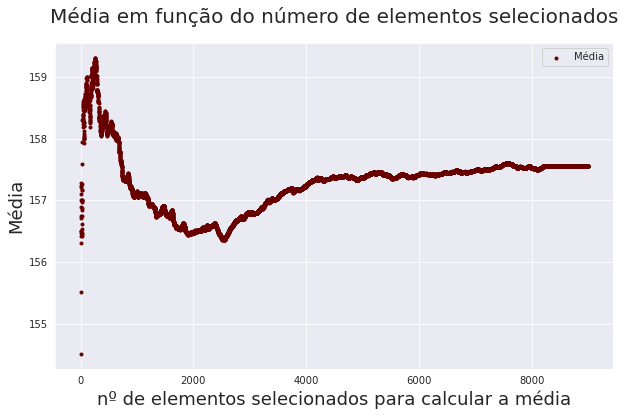

In [109]:
sexo_f_altura = dados_selecionados.query('sexo == 2')['altura do aluno']

y = []
x = list(range(1,9000))
for i in range(1,9000):
    y.append(sexo_f_altura[0:i].mean())
    
y = pd.Series(y)

sns.set_style('darkgrid')
sns.set_palette('hot')
plt.figure(figsize=(10,6))
plt.title('Média em função do número de elementos selecionados', fontsize=20, pad=20)
plt.ylabel('Média', fontsize=18)
plt.xlabel('nº de elementos selecionados para calcular a média', fontsize=18)

ax = plt.scatter(x=x, y=y, marker='.', label='Média')
plt.legend()
ax ; 

Note que quanto maior o número de elementos selecionados para o cálculo da média, menor é a variáção. A principio a média esta em $155m$ depois sobe pra $157m$ depois para $159$ e depois volta e estabiliza em $157,5m$... 


In [110]:
sexo_f_altura[0:9000].mean() == sexo_f_altura.mean() 

True

> Note que eu não selecionei a população de todos os 16 mil alunos, eu peguei uma mostra de 9000 e comprovei que a média amostral é igual a média populacionai

## Teorema do Limite Central

O **O teorema do limite central** se baseia nesta ideia e afirma que com o aumento do tamanho da amostras ($n$) selecionadas aleatoriamente em uma população, a **distribuição das médias amostrais** se aproxima de uma distribuição normal com média igual **a média da população** e desvio padrão amostral é igual à **razão entre o desvio padrão populacional e a raiz quadrada da quantidade de elementos da amostra**. Isto pode ser resumido na equação:

$$\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}},$$

onde o desvio padrão amostral $\sigma_{\bar{x}}$ é igual a razão entre o desvio padrão populacional $\sigma$ e a raiz quadrada da quantidade de grupos de amostras $(\sqrt{n})$. **O teorema também afirma que este resultado é assegurado se $n \le 30$.**

Vou adicionar a variável IMC aos dados selecionados e testar o teorema nesta variável:

In [111]:
dados_selecionados['IMC'] = dados['IMC']
dados_selecionados.columns

/home/conrado/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Index(['sexo', 'cor', 'turno', 'telefone fixo', 'celular', 'computador',
       'internet', 'escolaridade mae', 'responsáveis fuma',
       'usou bebida alcoolica', 'sofreu bullying',
       'frequência com que se sente só', 'Quantos amigos próximos',
       'teve relação sexual alguma vez',
       'usou preservativo na primeira relação',
       'ja recebeu orientação sobre DST na escola',
       'ja foi forçado a ter relação sexual',
       'como classifica o proprio estado de saúde',
       'considera sua imagem corporal como sendo algo',
       'como se sente em relação ao seu corpo', 'peso do aluno',
       'altura do aluno', 'estado nutricional do estudante',
       'Situação da escola', 'Dependência Administrativa da escola',
       'Esfera Administrativa da escola', 'IMC'],
      dtype='object')

Agora vamos criar amostras aleatórias a partir da população IMC:

In [112]:
%%time
n_de_elementos_nas_amostras = 1500
grupos_de_amostras = 3000

amostras = pd.DataFrame()

for amostra in range(grupos_de_amostras):
    _ = dados_selecionados.IMC.sample(n_de_elementos_nas_amostras, replace=True)
    _.index = range(0, len(_) )
    amostras[f'Amostra_{amostra}'] = _
    
amostras

CPU times: user 2.42 s, sys: 279 ms, total: 2.7 s
Wall time: 2.7 s


,Amostra_0,Amostra_1,Amostra_2,Amostra_3,Amostra_4,Amostra_5,Amostra_6,Amostra_7,Amostra_8,Amostra_9,...,Amostra_2990,Amostra_2991,Amostra_2992,Amostra_2993,Amostra_2994,Amostra_2995,Amostra_2996,Amostra_2997,Amostra_2998,Amostra_2999
0,18.211058,22.799710,21.539785,19.904013,16.015651,36.634860,15.762869,18.881560,26.558252,16.102090,...,15.600907,29.805523,19.126665,18.419605,24.329134,18.055948,27.372134,16.221723,18.019703,21.080706
1,18.810530,29.888992,21.364579,16.621907,19.316617,22.214533,28.930549,17.474916,20.196764,19.874024,...,17.868939,14.648036,19.014375,26.566387,17.876270,22.326372,20.045888,19.791925,16.813900,17.999710
2,22.929019,19.348543,20.111122,26.023371,23.998591,21.619284,22.423738,16.345494,20.549591,17.132864,...,15.117572,26.825328,24.931948,17.141529,25.940578,18.763704,17.295983,21.343267,27.383549,34.567353
3,30.406665,20.793951,21.715298,18.464102,21.001156,18.660182,20.080858,22.339665,21.190890,23.670706,...,13.941886,18.007069,18.752559,15.413017,22.809913,24.914235,16.677306,17.264672,22.432043,21.683673
4,17.949326,16.357394,18.134552,14.687817,22.614569,19.008772,23.108435,19.630692,21.190890,22.356882,...,18.200692,21.403092,16.167043,23.069128,19.295131,18.805871,15.515058,14.484912,20.636590,17.324771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,20.234392,21.476181,20.142567,15.857512,22.346215,20.821003,19.851730,38.497337,19.808954,21.792362,...,18.448464,24.312426,21.713117,21.346975,18.701446,18.478424,23.761791,21.426413,16.274653,18.359697
1496,16.357394,16.375359,15.298187,16.796264,22.736206,25.805146,20.595918,24.035361,17.601760,26.179883,...,25.643034,20.657058,19.532238,20.995257,21.125210,20.778288,16.568076,32.925582,17.742028,17.000252
1497,30.453838,22.462243,23.809271,31.418629,17.675810,26.329669,16.315828,19.572850,16.537113,17.313019,...,15.203813,15.451845,19.780681,23.359375,30.901920,22.394319,20.090739,17.737351,21.230572,20.198104
1498,19.354023,19.015573,15.821564,16.010624,18.819336,16.866251,17.941930,18.163733,36.611539,20.063012,...,21.617603,17.558192,17.375315,26.372460,20.436629,20.543572,22.295319,19.810751,34.173742,21.021565


Visualizando a tabela fica muito mais fácil de entender como funciona o teorema. Suponha que você tem $N$ dados então constroi $n$ amostras aleatórias, o teorema afirma que a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual a média populacional. Já construimos nossa amostra na tabela acima

In [113]:
medias_amostrais = amostras.mean()
medias_amostrais

Amostra_0       21.229065
Amostra_1       20.956335
Amostra_2       20.914246
Amostra_3       20.889442
Amostra_4       20.858600
                  ...    
Amostra_2995    20.973118
Amostra_2996    21.037882
Amostra_2997    21.115610
Amostra_2998    21.104792
Amostra_2999    20.883580
Length: 3000, dtype: float64

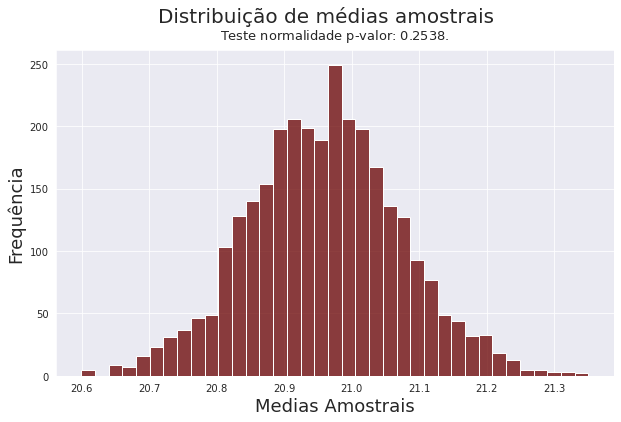

In [114]:
from scipy.stats import normaltest
T, pvalor = normaltest(a = medias_amostrais)

plt.figure(figsize=(10,6))
plt.suptitle('Distribuição de médias amostrais', fontsize=20)
plt.title(f'Teste normalidade p-valor: ${round(pvalor,4)}$.', fontsize=13, pad=10)
ax = sns.histplot(medias_amostrais)
ax.set_ylabel('Frequência',fontsize=18)
ax.set_xlabel('Medias Amostrais',fontsize=18)
ax;


<font color=red>OBSERVAÇÂO</font>: **Dependendo da quantidade de amostras que são retiradas aleatoriamente da população pode acontecer da distribuição das médias amostrais não se distribuir normalmente pelo teste de normalidade.**

A partir deste gráfico e também do teste de normalidade conseguimos verificar a primeira etapa do teorema do limite central. Ou seja, "*A distribuição das médias amostrais tende a uma distribuição normal.*"

Agora vamos comparar se a média da distribuição das médias amostrais é igual a média populacional:

In [115]:
print(f'Média populacional IMC: {dados_selecionados.IMC.mean()}')
print(f'Media das médias amostrais: {medias_amostrais.mean()}')

Média populacional IMC: 20.95825220663186
Media das médias amostrais: 20.958979099060432


Note que esses dois valores são similares, o primeiro algarismo diferente acontece na 4 casa decimal. Então a segunda frase do teorema foi verificada agora precisamos equacionar o desvio padrão amostral com o desvio padrão populacional:

$$\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}},$$

In [116]:
desvio_padrao_amostral_aproximado_TLC = dados_selecionados['IMC'].std() / np.sqrt(grupos_de_amostras)
desvio_padrao_medias_amostrais = medias_amostrais.std()

In [117]:
print('Desvio padrão das médias amostrais:', desvio_padrao_medias_amostrais)
print('Desvio padrão aproximado pelo TLC:', desvio_padrao_amostral_aproximado_TLC)

print(f'Erro relativo: {(abs(desvio_padrao_medias_amostrais - desvio_padrao_amostral_aproximado_TLC)/desvio_padrao_medias_amostrais) * 100}')

Desvio padrão das médias amostrais: 0.11370398982193661
Desvio padrão aproximado pelo TLC: 0.07749254400338072
Erro relativo: 31.84711976709344


### Definir um grafico que minimiza o erro relativo:

In [118]:
from dask import delayed
# processamento em paralelo

@delayed
def mapa_otimizando_TLC(series : pd.Series):
    # Essa função tem objetivo de otimizar o TLC
    # produzindo o menor erro relativo entre o desvio padrão das médias amostrais
    # e o desvio padrão populacional
    # para isso a calibragem sera feita encontrando 
    #  * o nº de elementos na amostra
    #  * o número de grupos das amostras

    erros = pd.DataFrame([],
                        index=[i for i in range(300,600,50)],
                        columns=[j for j in range(300,600,50)])

    for i in erros.index:
        for j in erros.columns:
            n_de_elementos_nas_amostras = i
            grupos_de_amostras = j

            amostras = pd.DataFrame()
            
            
            for amostra in range(grupos_de_amostras):
                _ = series.sample(n_de_elementos_nas_amostras)
                _.index = range(0, len(_) )
                amostras[f'Amostra_{amostra}'] = _
            
            medias_amostrais = amostras.mean()
            k, pvalor = normaltest(a = medias_amostrais)

            if pvalor >= 0.05:
                desvio_padrao_amostral_aproximado_TLC = series.std() / np.sqrt(grupos_de_amostras)
                desvio_padrao_medias_amostrais = medias_amostrais.std()
                erro_relativo = abs(desvio_padrao_amostral_aproximado_TLC - desvio_padrao_medias_amostrais)/desvio_padrao_medias_amostrais
                erros[i][j] = erro_relativo
    erros = erros.fillna(1.0)
    return erros

In [119]:
%%time
matriz_erros = delayed(mapa_otimizando_TLC)(dados_selecionados['IMC'])
matriz_erros = matriz_erros.compute()

CPU times: user 12.5 s, sys: 9.08 ms, total: 12.5 s
Wall time: 12.5 s


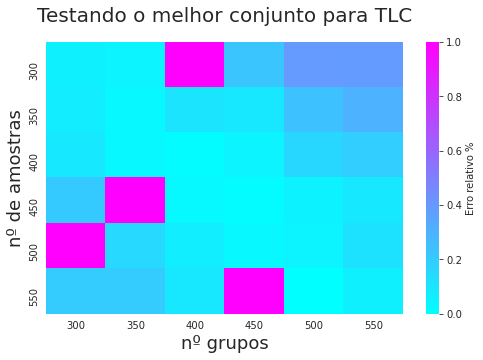

In [120]:

plt.figure(figsize=(8,5))
plt.title('Testando o melhor conjunto para TLC',fontsize=20, pad=20)
ax = sns.heatmap(matriz_erros, vmin=0, vmax=1, cmap='cool',
                cbar_kws={'label':'Erro relativo %'})
ax.set_xlabel('nº grupos',fontsize=18)
ax.set_ylabel('nº de amostras',fontsize=18)
#ax.legend('ola')
ax;

O objetivo é escolher os grupos e amostras onde o valor do erro relativo seja o menor possível, no caso do mapa acima é onde temos o valor mais escuro.

# População e Amostra

Utilizando o teorema do limite central precisamos escolher grupos de amostras mas quantos indivíduos ou elementos uma amostra deve ter? Anteriormente utilizamos a [*força bruta*](https://pt.wikipedia.org/wiki/Busca_por_for%C3%A7a_bruta) para encontrar qual o tamanho da amostra que minimiza o erro relativo.

Mas existe uma forma matemática de calcular o tamanho de uma amostra, ou seja quantos elementos uma amostra precisa ter. Vamos lá, o que é uma amostra? 

A amostragem aleatória simples é a maneira mais fácil de selecionar um conjunto de dados aleatórios de uma população de forma probabilistica. Além disso, o conhecimento adquirido serve de base para o aprendizado e desenvolvimento de outros procedimentos amostrais, planejamento de experimentos e estudos observacionais etc. 

O conceito de **$AAS$ (Amostragem Aleatória Simples) de uma população finita**, para qual temos uma listagem de todas as $n$ unidades elementares. Podemos obter uma amostra nessas condições, escrevendo cada elemento da população num cartão, misturando-os numa urna e sorteando tantos cartões quantos desejarmos na amostra. Esse procedimento torna-se inviável quando a população é muito grande. Neste caso, usa-se um processo alternativo no qual os elementos são numerados e em seguida sorteados por meio de uma tabela de números aleatórios ou usando computadores (O método `.sample()` dos `dataframes` ou `series` do pandas.)

Utilizando-se um procedimento aleatório, sorteia-se um elemento da população sendo que os elementos têm a mesma probabilidade de ser selecionados. Repete-se o procedimento até que sejam selecionados $n$ unidades da amostra.

### AAS com reposição

Podemos ter uma $AAS$ *com reposição*, se for permitido que uma unidade possa ser sorteada mais de uma vez, e sem reposição, se a unidade sorteada for removida da população. (*Por exemplo se o cartão for recolocado na urna é com reposição*)

> Do ponto de vista da quantidade de informação contida na amostra, amostrar sem reposição é mais adequado. Contudo, a amostragem com reposição conduz a um tratamento teórico mais simples, pois ela implica que tenhamos independência entre as unidades selecionadas. Essa independência facilita o desenvolvimento das propriedades dos estimados que serão considerados.
**MORETTIN, Pedro Alberto; BUSSAB, WILTON OLIVEIRA. Estatística básica. Saraiva Educação SA, 2017.**

Note que já foi realizado uma amostragem aleatória simples com reposição:

In [121]:
%%time
n_de_elementos_nas_amostras = 150
grupos_de_amostras = 5

amostras = pd.DataFrame()

for amostra in range(grupos_de_amostras):
    _ = dados_selecionados.IMC.sample(n_de_elementos_nas_amostras, replace=True)
    _.index = range(0, len(_) )
    amostras[f'Amostra_{amostra}'] = _
    
amostras

CPU times: user 7.35 ms, sys: 0 ns, total: 7.35 ms
Wall time: 6.68 ms


,Amostra_0,Amostra_1,Amostra_2,Amostra_3,Amostra_4
0,22.983972,26.005510,17.982693,21.488966,22.501377
1,17.558191,22.643080,23.824758,23.383541,20.005459
2,16.965917,19.821436,23.450832,19.923499,17.941930
3,17.043107,15.355679,22.597274,19.758370,15.363558
4,19.107515,24.085207,21.509600,18.043288,18.292512
...,...,...,...,...,...
145,22.102924,18.138662,15.343560,15.960693,15.251862
146,16.502019,20.817910,15.210925,18.425708,21.623643
147,20.885976,17.309604,22.775556,18.117981,17.500000
148,23.743647,22.911916,17.625020,18.587892,32.285937


Criamos 5 amostras, cada uma com 150 unidades (indivíduos ou elementos) com reposição. A tecnica de seleção pseudo aleatória foi o método `sample()` que faz uma seleção **com reposição**, ou seja, um mesmo elemento pode ser selecionado mais de uma vez. Podemos passar o parâmetro `replace` ao método `sample()`, pela descrição: 

**replace**: bool, default=False
>Allow or disallow sampling of the same row more than once.

Ao atribuir o valor `True` ele permite que uma mesma linha seja selecionada mais de uma vez..

### Erro padrão de um estimador 

Podemos construir vetores de variáveis aleatórias e por transtitividade estes vetores também serão aleatórios. Usando tecnicas de amostragem que já foram faladas anteriormente podemos obter estatisticas, parâmetros e estimadores.

Tendo a distribuição amostral podemos calcular a variância amostral. Se não for possível obter uma distribuição exata podemos utilizar uma aproximação, se essa estiver disponível, por exemplo $\bar{X}$ (média amostral), assim a variância do estimador será a variância da aproximação. Por exemplo para a média amostral $\bar{X}$, obtida de uma amostra com $n$ indivíduos: 

$$\text{Var}\bar{X} = \frac{\sigma^2}{n},$$

na qual $\sigma^2$ é a variância da variável aleatória X definida sobre a população. A raiz quadrada dessa variância é chamada de **erro padrão de $\bar{X}$** e pode ser denotado por 

$$\text{EP}(\bar{X}) = \frac{\sigma}{\sqrt{n}}$$

Se $T$ for um estimador do parâmetro $\theta$ como já foi dito anteriormente, o erro padrão do estimador $T$ será a quantidade: 

$$\text{EP}(T) = \sqrt{\text{Var}(T)}.$$

Se $(X_1,...,X_n)$ for uma amostra aleatória simples da população $X$, com média $\mu$ e variância $\sigma^2$ finita, e $\bar{X} = \frac{1}{n}\sum_i^n{X_i}$ então se tem o teorema do limite central: 

$$z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \sim N(0,1)$$


> O simbolo ($\sim$) denota "*tem a distribuição de probabilidade de*". Exemplo $X \sim N(0,1)$ Variável aleatória $X$ se distribui como uma $N(0,1)$ (Normal média *zero*, desvio padrão *um*)

A equação acima também pode ser expressa, após algumas manipulações algébricas, da seguinte maneira:

$$z = \frac{ \sqrt{n}}{\sigma}(\bar{X} - \mu) \sim N(0,1)$$

Note que o termo $(\bar{X} - \mu)$ é basicamente a diferença entre o valor da variável aleatória e a sua média, um erro em relação a média. Esta diferença entre o valor médio e a variável aleatória é tão comum que se denota por $e$ chamado de **erro amostral da média**, isto é $e \equiv \bar{X} - \mu$. Ent]ao temos  que

> A distribuição de $e$ se aproxima de uma distribuição normal com média 0 e variância $\sigma^2 / n$, ou seja: 

$$\frac{e\sqrt{n}}{n} \sim N(0,1)$$

Agora definidos as situações, ou seja, tendo em vista que temos um conjunto de variáveis aleatórias cujo o erro amostral da média se distribui normalmente, sendo $z$ a variável normalizada, temos que: 

$$e = z\frac{\sigma}{\sqrt{n}},$$

onde o erro $e$ é dado pela variável aleatória $z$, o desvio padrão populacional $\sigma$ e a raiz da quantidade de amostras $\sqrt{n}$. Então isolando $n$ teremos:

$$n = \big(z\frac{\sigma}{e}\big)^2,$$

isto se o desvio padrão populacional $\sigma$ for conhecido. Se o desvio padrão populacional for desconhecido a melhor informação que temos é o desvio padrão amostral $s$, então a quantidade de individuos numa amostra deve ser: 

$$n = \big(z\frac{s}{e}\big)^2,$$

onde $s$ é o desvio padrão amostral, $e$ o erro e $z$ a variável normalizada.

### Como calcular $z$?

Bom, o valor de $z$ depende do valor das variáveis aleatórias, entretanto normalizado. Podemos calcular $z$ usando a função `norm` do **SciPy**;

Vamos assumir que queremos um erro máximo de $0.0001$, nível de confiança de $95\%$ e o desvio padrão populacional $0.0019$:

In [122]:
from scipy.stats import norm

In [123]:
significancia = 0.05
confianca = 1 - significancia
sigma = 0.0019
e = 0.0001

Já definimos as variáveis, agora para calcular $z$ usamos o scipy

> `norm.ppf(q, loc=0, scale=1)` Percent point function (inverse of cdf — percentiles).

In [124]:
z = norm.ppf(confianca + 0.025)
z

1.959963984540054

In [125]:
n = ((z * sigma) / e) ** 2
int(n)

1386

Ou seja, precisamos de amostras com 1386 unidades. Note que são **1386 unidades**, diferente do teorema do limite central, que diz respeito a quantidade de grupos amostrais.

Vamos por exemplo aplicar o teorema do limite central para este caso:

> O **O teorema do limite central** se baseia nesta ideia e afirma que com o aumento dos grupos amostrais ($n$) selecionadas aleatoriamente em uma população, a **distribuição das médias amostrais** se aproxima de uma distribuição normal com média igual **a média da população** e desvio padrão amostral é igual à **razão entre o desvio padrão populacional e a raiz quadrada da quantidade de elementos da amostra**. Isto pode ser resumido na equação:

$$\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}},$$

> onde o desvio padrão amostral $\sigma_{\bar{x}}$ é igual a razão entre o desvio padrão populacional $\sigma$ e a raiz quadrada da quantidade de grupos de amostras $(\sqrt{n})$. **O teorema também afirma que este resultado é assegurado se $n \le 30$.**

**Note que GRUPOS AMOSTRAIS é diferente de TAMANHO DA AMOSTRA, apesar de ser representaedo pela mesma. Precisamos de mais de $30$ grupos amostrais cada um com AMOTRAS DE TAMANHO $1386$**.

É importante salientar que o Teorema do Limite Central diz respeito a distribuição das médias amostrais em que essas amostras podem ter qualquer tamanho, mas o grupo de amostras deve ser maior que 30. Já o tamanho de uma amostra depende intrincecamente da distribuição das variáveis aleatórias seguir uma distribuição normal.

Outro ponto importante é que a equação 

$$n = \big(z\frac{\sigma}{e}\big)^2,$$

se refere a uma população infinita, caso tenhamos uma população finita devemos utilizar a equação que leva em conta o tamanho da população: 

$$n = \frac{z^2 \sigma^2 N}{z^2 \sigma^2 + e^2 (N - 1)}$$

In [126]:
N = 1500
n = (N*(z*sigma)**2)/ (((z*sigma)**2) + (N-1)*e**2)
n

720.8309662682262

,Amostra_0,Amostra_1,Amostra_2,Amostra_3,Amostra_4,Amostra_5,Amostra_6,Amostra_7,Amostra_8,Amostra_9,...,Amostra_22,Amostra_23,Amostra_24,Amostra_25,Amostra_26,Amostra_27,Amostra_28,Amostra_29,Amostra_30,Amostra_31
0,23.696072,14.485023,13.850986,20.139150,24.776699,16.921145,22.758993,19.451151,25.704218,21.125685,...,18.891123,18.594226,18.077315,22.485873,16.533934,19.523465,19.243090,18.730489,27.101176,22.958717
1,21.325794,19.849516,17.155030,20.738029,21.687039,20.209621,28.077015,27.730007,27.566640,18.540306,...,19.296550,19.638122,26.838648,19.471117,20.351562,22.426182,25.030861,19.941468,19.260817,20.763924
2,21.102581,17.095030,23.185160,18.631845,23.121193,18.787847,28.225688,21.188432,17.956978,28.179012,...,25.188756,21.820125,21.597366,17.777666,18.112939,25.260225,22.568228,19.923255,22.494331,18.696581
3,16.071361,21.057690,17.201941,22.613564,26.631147,23.339908,22.093417,23.403621,19.453501,16.937177,...,24.124734,23.155552,19.919622,16.192741,16.711200,23.262480,20.598703,28.320782,18.263926,18.104909
4,17.133486,22.402580,16.863212,18.524912,16.787917,18.833656,22.641354,19.774202,27.754859,24.417739,...,18.322804,17.240803,16.485342,25.045071,30.434487,19.955270,17.195244,19.197730,17.328191,23.722698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,18.404734,28.084628,18.164018,18.625105,27.730007,30.131981,16.788415,17.426225,17.498238,22.819490,...,18.307490,19.866690,26.546824,18.636066,20.069204,17.878328,20.236835,20.196233,18.055948,30.859185
717,29.365280,18.970345,19.964127,23.710911,19.232747,20.245896,17.977291,12.322300,22.501377,21.009013,...,18.581555,17.777778,26.336088,16.243917,20.270042,18.822281,19.279991,19.790903,15.280035,28.084628
718,26.569615,20.651463,17.587184,20.199470,23.589221,19.398175,16.649795,16.036222,24.407911,23.832540,...,28.299415,22.708811,22.781829,17.699401,19.505244,28.767347,16.428340,22.401832,22.256431,21.919001
719,21.900548,19.354839,15.078125,23.535461,17.227870,16.346080,22.238627,20.459137,18.352237,21.801724,...,18.209053,18.739493,16.686164,19.496966,25.017757,15.169338,21.719104,18.617937,20.115898,22.490677


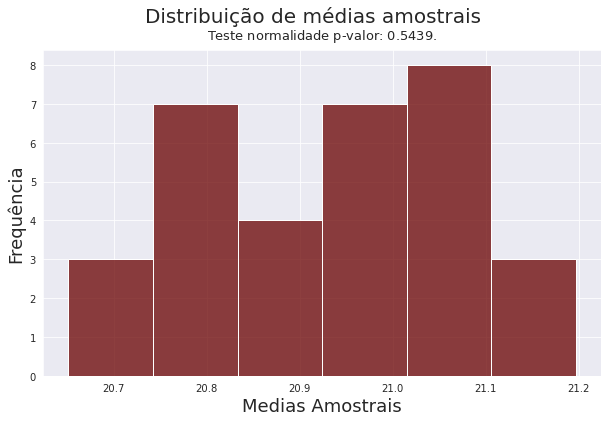

In [127]:
n_de_elementos_nas_amostras = 721
grupos_de_amostras = 32

amostras = pd.DataFrame()

for amostra in range(grupos_de_amostras):
    _ = dados_selecionados.IMC.sample(n_de_elementos_nas_amostras,replace=True)
    _.index = range(0, len(_) )
    amostras[f'Amostra_{amostra}'] = _
    
display(amostras)

medias_amostrais = amostras.mean()

T, pvalor = normaltest(a = medias_amostrais)

plt.figure(figsize=(10,6))
plt.suptitle('Distribuição de médias amostrais', fontsize=20)
plt.title(f'Teste normalidade p-valor: ${round(pvalor,4)}$.', fontsize=13, pad=10)
ax = sns.histplot(medias_amostrais,)
ax.set_ylabel('Frequência',fontsize=18)
ax.set_xlabel('Medias Amostrais',fontsize=18)
ax;


O ideal é sempre ter mais que 30 grupos de amostras e cada amostra com mais elementos. Em muitas áreas da ciencia se tem abundância de dados, por exemplo física, entretanto em outras áreas como biologia não se tem grande quantidade de variáveis e por isso o teorema do limite central e amostragem é útil.

# Procedimento geral do teste de hipóteses

A construção de um teste de hipotese para um parâmetro populaciona, pode ser colocada do seguinte modo. Existe uma variável $X$ associada a dada população e tem-se uma hipotese sobre determinado parâmetro $\theta$ dessa população. Por exemplo, afirmamos que o verdadeiro valor de $\theta$ é $\theta_0$. Colhe-se uma amostra aleatória de elementos dessa população e com ela deseja-se aceitar ou rejeitar tal hipótese.

Como já foi visto ateriormente, iniciamos nossa análise explicando **claramente qual a hipótese qye estamos colocando a prova** e a chamamos de "hipótese nula"($H_0$), denotamos como:

$$H_0 : \theta = \theta_0$$

Em seguida, convém explicar também a hipótese que será considerada aceitável, caso $H_0$ seja rejeitada. A esta hipótese chamamos de "hipótese alternativa" ($H_1$) e a sua caracterização estatistica irá depender do grau de conhecimento que se tem sobre o problema estudado. A hipótese alternativa mais geral seria: 

$$H_1: \theta \ne \theta_0$$

É possível, ainda, expressar a hipótese alternativa em:

$$H_1: \theta < \theta_0 \text{ ou } H_1: \theta > \theta_0$$

dependendo das informações que o problema traz.

Qualquer que seja a decisão tomada, sempre estamos sujeitos a cometer erros. Para facilitar a linguagem é comum introduzir definições:

> **Erro do tipo I**: Rejeitar a hipótese nula quando essa é verdadeira. Chammos de $\alpha$ a probabilidade de cometer este tipo de erro, isto é:

$$\alpha = P(\text{erro do tipo I}) = P(\text{rejeitar} H_0 | H_0 \text{ é verdadeira})$$


> **Erro do tipo II**: Não rejeitar a hipótese nula quando essa é falsa. A probabilidade de cometer esse erro é denotada por $\beta$, logo:

$$\beta = P(\text{erro do tipo II}) = P(\text{não rejeitar} H_0 | H_0 \text{ é falsa})$$

O objetivo do teste de hipótese é dizer, **usando uma estatistica $\theta$**, se a hipótese $H_0$ é ou não aceitavel. Operacionalmente, essa decisão é tomada por meio da consideração de uma região crítica $RC$. Caso o valor observado da estatística pertença a essa região, rejeitamos $H_0$; caso contrário, não temos evidência estatistica para rejeitar $H_0$.

Esta região é construida de modo que $P(\theta \in RC | H_0 \text{ é verdadeira})$ seja igual à $\alpha$, fixado a priori. $RC$ é a região crítica ou se preferir a região onde se rejeita a hipótese nula. Um fato importante a ressaltar é que a região crítica é sempre construída em termos de $H_0$ ser verdadeira.

A determinação do valor de $\beta$ já é mais difícil, pois, usualmente não especificamos valores fixos sob a hipótese alternativa. Geralmente esta variável é fixada quando se trata da análise do poder preditivo de um teste.

Já falamos da probabilidade $\alpha$ de se cometer um **erro do tipo I** é um valor arbitrário e recebe o nome de **significância** do teste. Em outras palavras, o resultado da amostra é tanto mais significante para rejeitar $H_0$ quanto menor for o nível de $\alpha$. Ou seja, quanto menor for $\alpha$, menor é a probabilidade de se obter uma amostra com estatistica pertencente à região crítica, sendo pouco verossímil a obtenção de uma amostra da população para a qual $H_0$ seja verdadeira. Usualmente os valores fixados de $\alpha$ são: $5\%$, $1\%$ e $0.1\%$.

## Passos para construção de um Teste de hipóteses

> **Passo 1.** Fixe qual a hipótese $H_0$ a ser testada e qual a hipótese alternativa $H_1$. Deixe isto bem claro, **escreva.**

> **Passo 2.** Use a teoria estatistica e as informações disponíveis para decidir qual estatistica (estimador) será usado para testar a hipótese $H_0$. Obter as propriedades dessa estatística (distribuição, média, desvio padrão).

> **Passo 3.** Fixe a **probabilidade $\alpha$ de cometer o erro de tipo I** e use este valor para construir a região crítica (regra de decisão). Lembre que essa região é construida para a estatística definida no **passo 2**, usando valores do parâmetro hipotetizados por $H_0$.

> **Passo 4.** Use as observações da amostra para calcular o valor da estatística do teste.

> **Passo 5.** Se o valor da estatística calculado com os dados da amostra não pertencer á região crítica, não rejeite $H_0$, caso contrátio rejeite $H_0$.

### **Exemplo 1 :**

Suponha que uma fábrica esta produzindo garrafas de $350ml$ de seu principal produto que contém, no máximo, $37g$ de açúcar. **Esta alegação nos leva a entender que a quantidade média de açúcar em uma garrafa deve ser igual ou menor que $37g$.**

Um consumidor desconfiado e com conhecimentos de inferência estatistica resolve testar a alegação do fabricante e seleciona, aleatóriamente, em um conjunto de estabelecimentos distintos, uma amostra de 25 garrafas. Utilizando o equipamento correto o consumidor obteve as quantidade de açúcar em todas as 25 amostras. 

Assumindo que essa população se distribuia aproxiamadamente como uma normal e considerando um nível de significância de $5\%$, é possível aceitar como válida a aleagação do fabricante? 


### Construindo o Teste (t student)

### **Passo1** Fixar hipóteses.

Afirmação do fabricante: **no máximo, $37g$ de açúcar**, então a hipótese que vamos testar é que a quantidade de açúcar é menor ou igual a $37g$:

$$H_0 : \mu \le 37$$

Por completude a hipótese alternativa é de que a quantidade de açúcar é maior que $37g$:

$$H_1 : \mu > 37$$

### **Passo 2** - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

In [128]:
amostra = [37.27, 36.42, 34.84, 34.60, 37.49,
           36.53, 35.49, 36.90, 34.52, 37.30,
           34.99, 36.55, 36.29, 36.06, 37.42,
           34.47, 36.70, 35.86, 36.80, 36.92,
           37.04, 36.39, 37.32, 36.64, 35.45
          ]

### **Passo 2** - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

Neste exemplo temos apenas 25 garrafas, então nosso $n < 30$, logo seguimos para o lado de cima do organograma. No enunciado assume-se que a distribuição é aproximadamente uma normal. Por fim a pergunta é se $\sigma$ (desvio padrão populacional) é conhecido, no nosso caso não temos o desvio padrão populacional, apenas o amostral. Portanto necessitamos utilizar $\bar{x} \pm t\frac{s}{\sqrt{n}}$. 

A utilidade da estatistica $t$ é para buscar na tabela a área sob curva de distribuição de t student:

In [129]:
# tabela

from scipy.stats import t as t_student 

tabela_t_student = pd.DataFrame([],
                               index= [i for i in range(1,31)],
                               columns = [i/100 for i in range(10,0,-1)]
                               )

for index in tabela_t_student.index:
    for column in tabela_t_student.columns:
        tabela_t_student.loc[index, column] = t_student.ppf(1 - float(column)/2, index)
        
index = [('Graus de liberdade (n - 1)', i ) for i in range(1,31)]
tabela_t_student.index = pd.MultiIndex.from_tuples(index)

columns = [('{0:0.3f}'.format(i / 100), '{0:0.3f}'.format((i / 100)/2)) for i in range(10,0,-1)]
tabela_t_student.columns = pd.MultiIndex.from_tuples(columns)

tabela_t_student.rename_axis(['Bicaudal', 'Unicaudal'], axis=1, inplace=True)
tabela_t_student

Bicaudal                         0.100    0.090    0.080    0.070    0.060  \
Unicaudal                        0.050    0.045    0.040    0.035    0.030   
Graus de liberdade (n - 1) 1   6.31375  7.02637  7.91582  9.05789  10.5789   
                           2   2.91999  3.10398  3.31976  3.57825  3.89643   
                           3   2.35336  2.47081  2.60543   2.7626  2.95051   
                           4   2.13185   2.2261  2.33287  2.45589  2.60076   
                           5   2.01505  2.09784  2.19096  2.29739  2.42158   
                           6   1.94318   2.0192  2.10431  2.20106  2.31326   
                           7   1.89458  1.96615  2.04601  2.13645  2.24088   
                           8   1.85955  1.92799  2.00415  2.09017  2.18915   
                           9   1.83311  1.89922  1.97265  2.05539  2.15038   
                           10  1.81246  1.87677   1.9481  2.02833  2.12023   
                           11  1.79588  1.85877  1.92843  2.00666  2.09614   
                           12  1.78229  1.84402  1.91231  1.98893  2.07644   
                           13  1.77093   1.8317  1.89887  1.97416  2.06004   
                           14  1.76131  1.82127   1.8875  1.96166  2.04617   
                           15  1.75305  1.81232  1.87774  1.95094  2.03429   
                           16  1.74588  1.80455  1.86928  1.94165    2.024   
                           17  1.73961  1.79776  1.86187  1.93353    2.015   
                           18  1.73406  1.79175  1.85534  1.92636  2.00707   
                           19  1.72913  1.78642  1.84953  1.91999  2.00002   
                           20  1.72472  1.78164  1.84433  1.91429  1.99371   
                           21  1.72074  1.77734  1.83965  1.90916  1.98804   
                           22  1.71714  1.77345  1.83542  1.90452  1.98291   
                           23  1.71387  1.76991  1.83157  1.90031  1.97825   
                           24  1.71088  1.76667  1.82805  1.89646  1.97399   
                           25  1.70814  1.76371  1.82483  1.89293   1.9701   
                           26  1.70562  1.76098  1.82186  1.88968  1.96651   
                           27  1.70329  1.75847  1.81913  1.88669   1.9632   
                           28  1.70113  1.75613  1.81659  1.88391  1.96014   
                           29  1.69913  1.75397  1.81424  1.88134  1.95729   
                           30  1.69726  1.75195  1.81205  1.87894  1.95465   

Bicaudal                         0.050    0.040    0.030    0.020    0.010  
Unicaudal                        0.025    0.020    0.015    0.010    0.005  
Graus de liberdade (n - 1) 1   12.7062  15.8945  21.2049  31.8205  63.6567  
                           2   4.30265  4.84873  5.64278  6.96456  9.92484  
                           3   3.18245  3.48191  3.89605   4.5407  5.84091  
                           4   2.77645  2.99853  3.29763  3.74695  4.60409  
                           5   2.57058  2.75651  3.00287  3.36493  4.03214  
                           6   2.44691  2.61224  2.82893  3.14267  3.70743  
                           7   2.36462  2.51675  2.71457  2.99795  3.49948  
                           8     2.306  2.44898  2.63381  2.89646  3.35539  
                           9   2.26216  2.39844   2.5738  2.82144  3.24984  
                           10  2.22814  2.35931  2.52748  2.76377  3.16927  
                           11  2.20099  2.32814  2.49066  2.71808  3.10581  
                           12  2.17881  2.30272   2.4607    2.681  3.05454  
                           13  2.16037   2.2816  2.43585  2.65031  3.01228  
                           14  2.14479  2.26378   2.4149  2.62449  2.97684  
                           15  2.13145  2.24854  2.39701  2.60248  2.94671  
                           16  2.11991  2.23536  2.38155  2.58349  2.92078  
                           17  2.10982  2.22385  2.36805  2.56693  2.89823  
                           18  2.10092  

### **Passo 3** - fixação da significância do teste ($\alpha$)

In [130]:
amostra = pd.DataFrame(amostra, columns=['Amostra'])

media_amostral = amostra.mean()
desvio_amostral = amostra.std()

media = 37
significancia = 0.05
confianca = 1 - significancia
n = 25
graus_de_liberdade = n - 1 

amostra.sample(5)

,Amostra
1,36.42
0,37.27
15,34.47
8,34.52
11,36.55


<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img004.png' width='250px'>

As células da tabela acima são valores de $t$ para uma área ou probabilidade na cauda superior da distribuição $t$. Lembrando que a área esta relacionada com o nível de significância, a probabilidade de rejeitar $H_0$ dado que a hipótese é verdadeira

Os **testes unicaudais** verificam as variáveis em relação a um piso ou a um teto e avaliam os valores máximos ou mínimos esperados para os parâmetros em estudo e a chance de as estatísticas amostrais serem inferiores ou superiores a dado limite.

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img008.png' width='700px'>


$\color{red}{\text{Lembre-se, a hipótese nula sempre contém a alegação de igualdade:}}$

$$H_0 : \mu \le 37$$

$$H_1 : \mu > 37$$

In [131]:
from scipy.stats import t as t_student 

In [132]:
tabela_t_student[22:25]

Bicaudal                         0.100    0.090    0.080    0.070    0.060  \
Unicaudal                        0.050    0.045    0.040    0.035    0.030   
Graus de liberdade (n - 1) 23  1.71387  1.76991  1.83157  1.90031  1.97825   
                           24  1.71088  1.76667  1.82805  1.89646  1.97399   
                           25  1.70814  1.76371  1.82483  1.89293   1.9701   

Bicaudal                         0.050    0.040    0.030    0.020    0.010  
Unicaudal                        0.025    0.020    0.015    0.010    0.005  
Graus de liberdade (n - 1) 23  2.06866  2.17696  2.31323  2.49987  2.80734  
                           24   2.0639  2.17154  2.30691  2.49216  2.79694  
                           25  2.05954  2.16659  2.30113  2.48511  2.78744

> **Detalhe 1:**Grau de liberdade é o número de amostrad $n$ menos $1$. Logo se nossa amostra é de $25$ garrafas então os graus de liberdades são $24$

> **Detalhe 2:** Nas colunas estão os níveis de significância, como o teste é unicaldal (maior que $37g$) então olhamos a primeira coluna.

Ou seja, nossa estatistica de teste esta na linha $24$ na coluna **unicaudal** $0.05$, o valor é de $1.71088$ 	

### Obtendo $t_\alpha$

É possível obter $t_\alpha$ sem precisar olhar a tabela:

In [133]:
t_alpha = t_student.ppf(confianca, graus_de_liberdade)
t_alpha

1.7108820799094275

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img009.png' width=60%>

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

In [134]:
t = (media_amostral - media ) / (desvio_amostral/np.sqrt(n))
t

Amostra   -3.876893
dtype: float64

### <font color='red'>Critério do valor crítico</font>

> ### Teste Unicaudal Superior
> ### Rejeitar $H_0$ se $t \geq t_{\alpha}$

In [135]:
t >= t_alpha

Amostra    False
dtype: bool

Como $t$ não é maior que $t_\alpha$ então aceitamos $H_0$ pelo critério do valor crítico ou região crítica.

 

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img010.png' width=35%>

### É possível se utilizar da tabela para aplicar testes de hipóteses:

Onde $\mu$ é sempre a **média amostral** e $\mu_0$ a média populacional ou a média que se quer testar.

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=85%>

### Conclusão: Com um nível de confiança de 95% não podemos rejeitar $H_0$, ou seja, a alegação do fabricante é verdadeira.

In [136]:
# para a função sf passa-se o valor da estatistica t e os graus de liberdade (degree of freedom)
pvalor = t_student.sf(t, df=24)
if pvalor <= significancia:
    print('pvalor: ',pvalor)
    print('Rejeita-se hipótese nula')
else:
    print('pvalor: ',pvalor)
    print('Não tem evidência para descartar a hipótese nula')

pvalor:  [0.99964062]
Não tem evidência para descartar a hipótese nula


Em ambas as situações, usando a estatistica de teste $t$ e o $\text{pvalor}$ o resultado é equivalente

## Jeito Pratico de aplicar um teste t de student: Usar Stats Models

Criar um objeto do tipo DescStatsW da classe `statsmodels.stats.weightstats.DescrStatsW`:



In [137]:
from statsmodels.stats.weightstats import DescrStatsW

In [138]:
teste = DescrStatsW(amostra)

dentro do objeto `teste` temos a função `ttest_mean()`, cujos parâmetros são:

**DescrStatsW.ttest_mean**(value=0, alternative='two-sided')
> ttest of Null hypothesis that mean is equal to value.

> The alternative hypothesis H1 is defined by the following
* ‘two-sided’: H1: mean not equal to value

* ‘larger’ : H1: mean larger than value

* ‘smaller’ : H1: mean smaller than value

> Parameters

* `value` float or array

> the hypothesized value for the mean


Como o teste que aplicamos quer verificar se a média amostral é menor ou igual a informada pelo fabricante, ou seja, um teste unicaudal superior utilizamos o parâmetro da função `alternative = 'larger'`, no caso a alternativa é que a média a ser testada é maior "larger":

In [139]:
t, pvalor, df = teste.ttest_mean(value=media, alternative='larger')
pvalor

array([0.99964062])

Note que o pvalor é o mesmo da outra metodologia.

### **Exemplo 2 :**

Uma produtora de vinhos produz garrafas de $500ml$. Seu processo de produção é quase todo automatizado e as garrafas são preenchidas por uma máquina que às vezes apresenta um certo desajuste, levando a erros no preenchimento das mesmas, para mais ou menos conteúdo. Quando o volume médio cai abaixo de $500ml$, a empresa se preocupa em perder vendas e ter problema com órgãos fiscalizadores. Quando o volume passa de $500ml$ a empresa começa a se preocupar com prejuízos no processo de produção.

O setor de controle de qualidade da empresa extrai, periodicamente, amostras de 50 garrafas para monitorar o processo de produção. Para cada amostra, é realizado um teste de hipóteses para avaliar se o maquinário se desajustou. A equipe de controle de qualidade assume um nível de significância de $5\%$.

Suponha agora que uma amostra de $50$ embalagens foi selecionada e que a média amostral observada foi de $503.24ml$. Esse valor de média amostral é suficientemente maior que $500ml$ para nos fazer rejeitar a hipótese de que a média do processo é de $500ml$ ao nível de significância de $5\%$?

> **Passo 1**: Definir hipótese nula. 

$H_0: \text{volume amostral} = \text{volume populacional}$

$H_1: \text{volume amostral} \ne \text{volume populacional}$

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' >

> **Passo 2**: Definir o estimador: O estimador que vamos utilizar para a comparação entre a amostra e a população é a média simples, assumindo que os erros se distribuem normalmente.

$\mu = 503.24ml$

$\mu_0 = 500ml$

> **Passo 3**: fixar a probabilidade $\alpha$ de cometer erro do tipo I (rejeitar $H_0$ dado que ela é verdadeira)



In [140]:
amostra = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505,
           501, 505, 510, 505, 504, 497, 506, 506, 508, 505,
           497, 504, 500, 498, 506, 496, 508, 497, 503, 501,
           503, 506, 499, 498, 509, 507, 503, 499, 509, 495,
           502, 505, 504, 509, 508, 501, 505, 497, 508, 507
          ]
amostra = pd.DataFrame(amostra, columns = ['amostra'])
display(amostra.head())

media_amostral = amostra.mean()[0]
media_populacional = 500

desvio_amostral = amostra.std()[0]

significancia = 0.05
confianca = 1 - significancia

numero_amostras = len(amostra)
print(f'nº amostras: {numero_amostras}\nMA: {media_amostral}\nDA: {desvio_amostral}\nMP: {media_populacional}\nAlpha: {significancia}')

,amostra
0,509
1,505
2,495
3,510
4,496


nº amostras: 50
MA: 503.24
DA: 4.483803050527347
MP: 500
Alpha: 0.05


<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

Probabilidade de estar dentro da área de aceitação:

In [141]:
from scipy.stats import norm

probabilidade = (0.5 + (confianca/2))
probabilidade

0.975

> **Passo 4**: Cálculo da estatística de teste.

In [142]:
z_alhpa_2 = norm.ppf(probabilidade)
z_alhpa_2

1.959963984540054

calculando o teste efetivamente, como diz a tabela:

$$z = \frac{\bar{x} - \mu_0}{\frac{\sigma}{\sqrt{n}}}$$

In [143]:
z = (media_amostral - media_populacional) / (desvio_amostral/np.sqrt(numero_amostras))
z

5.109559775991877


> **Passo 5**: Comparar o pvalor ou a estatistica de teste com a região crítica.

In [144]:
if z >= z_alhpa_2 or z <= -z_alhpa_2:
    print(f'{z} >= {z_alhpa_2} ou {z} <= {-z_alhpa_2}')
    print('Rejeita-se hipótese nula')
else:
    print(f'{z} >= {z_alhpa_2}')
    print('Não existe evidência para rejeitar a hipótese nula')

5.109559775991877 >= 1.959963984540054 ou 5.109559775991877 <= -1.959963984540054
Rejeita-se hipótese nula


note que pelo teste de comparação de médias significa que as médias não são iguais.

In [145]:
from statsmodels.stats.weightstats import ztest

In [146]:
z, pvalor = ztest(x1=amostra, value=media_populacional)
z[0], pvalor[0]

(5.109559775991873, 3.229103172445771e-07)

Note que aplicar o statsmodels é mais eficiente e o resultado é o mesmo $\text{p-valor} \le 0.05$ rejeita-se a hipótese nula.

## Testes Não paramétricos 

Até agora todos os testes realizados por consideração a distribuição das variáveis é conhecida, uma normal ou a t student. Em um teste de hipótese de forma teoríca o que acontece é a comparação entre duas distribuições de probabilidades que conhecemos, mas o que acontece quando não conhecemos estas distribuições? Em outras palavras, o que acontece quando conhecemos apenas estatísticas e não parâmetros? A solução é usar os testes não paramétricos. Um desses testes é chamado de Teste de Wilcoxon ou Mann-Whitney e pertence a categoria de procedimentos chamados *não-paramétricos* ou *livres de distribuições*. 

Nestes testes as amostras ainda são independentes das duas populações e o objetivo é testar a hipotese de que as duas variáveis provém de uma mesma distribuição, ou seja:

$$H_0: P_1 = P_2,$$

esta hipótese é chamada de **hipótese da homogeneidade** das populações. O significado desta hipótese depende muito do objetivo da pesquisa e do interesse em considerar qual o que esta igualdade irá implicar. A estratégia de comparar duas populações por meio de seus parâmetros envolve suposições sobre a formas das distribuições de probabilidades, para depois testar as médias e variâncias. Entretanto é mais comum estar interessado em testar as distribuições pois em muitos casos elas apenas diferem em seu deslocamento.

<img src='https://raw.githubusercontent.com/ConradBitt/BootCamp_DataScience/master/Analise%20Dados%20Saude%20e%20Educa%C3%A7%C3%A3o/images/teste_wilcoxon.png'>

Os testes t student e o de Wilcoxon são os mais apropriados para este tipo de distribuição. O teste t student é aplicavel quando $P_1$ e $P_2$ são supostamente normais, com média $\mu$ e $\mu + \Delta$, respectivamente, com a mesma variância. Já o teste Wilcoxon aplica-se quando $P_1$ e $P_2$ quaisquer, mas suponha-se que a escala de medida seja pelo menos ordinal. A analise de Wilcoxon fica ainda mais fácil quando as duas distribuições de probabilidades são variáveis contínuas.

Outro caso interessante é aquele que queremos testar se duas médias são iguais, mas a variância diferente. Em muitos fenômenos as médias podem ser iguais mas com dispersões diferentes e portanto as distribuições de porbabilidades são diferentes, neste caso uma análise de igualdade de variâncias deve ser aplicado. Esta situação é muito útil porque podemos fazer comparações do curtose (diferencia entre as frequências das médias). Com testes não paramétricos é possível comparar o efeito de um tratamento farmacológico. Por exemplo analisar se o efeito do tratamento é aumentar pessoas sem a enfermidade. Isto se o $P_2$ gerar valores maiores que $P_1$ ou o contrario.

## Teste de Wilcoxon-Mann-Whitney 

> http://www.portalaction.com.br/tecnicas-nao-parametricas/teste-de-wilcoxon-mann-whitney-amostras-independentes

O Teste de Wilcoxon-Mann-Whitney é baseado no conceito de postos dos valores obtidos, para isso combina-se as duas amostras, coordenando-se esses valores do menor para o maior, independentemente do fato de qual população cada valor provém. A estatistica do teste é a soma dos postos associados aos valores amostrados de uma população $P_1$, por exemplo. Se essa soma for grande, isso é uma indicação de que os valores dessa população tendem a ser maiores do que o valores da população $P_2$, e então rejeitamos a hipótese de que provém de uma mesma distribuição de frequências.

> **Posto:** É o índice do elemento quando todos elementos de uma amostra são listados em ordem crescente. Por exemplo na amostra de $ml$ dos vínhos, ordenamos a amostra e analisamos o novo índice dela:

In [147]:
indice = amostra.reset_index()['index'] + 1
amostra = amostra.sort_values(by='amostra')
amostra.index = indice
amostra = amostra.rename_axis(index='Posto')
amostra.T

Posto,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
amostra,495,495,496,496,497,497,497,497,497,498,...,508,508,508,509,509,509,509,509,510,510


No caso de termos uma variável aleatória qualitativa ordinal, comumente associamos números às diversas categorias (classes ou atributos), segundo as quais a variável é classificada. Por exemplo, podemos ter 1 para *bom*, 2 para *muito bom* e 3 para *ótimo*. Vemos, então que esses valores são os postos, nesse caso, em outras situações é preferível trabalhar com postos do que com valores arbitrários associados á variável alteatória qualitativa. 

Quando trabalhamos com variáveis quantitativas podemos ter valores repetidos nas amostras. Nesses casos quando os módulos dos números se repetem, teremos postos iguais para os valores e o posto destes números será a média aritmética que os números assumiriam no caso comum.

Para evitar empates, uma possibidade é supor que a variável aleatória seja contínua, de modo que se $X$ for tal variável, então a probabilidade $P(X = x_0) = 0$. Essa suposição é eventualmente necessária para o desenvolvimento teórico do teste, mas na pratica quer $X$ seja contínua ou discreta os valores repetidos poderão aparecer. 

### Aplicando o Teste de Wilcoxon - Mann - Whitney 

Este teste esta disponível no módulo scipy e também no stats models. 

> Scipy: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html

> Stats Models: https://www.statsmodels.org/devel/generated/statsmodels.stats.nonparametric.rank_compare_2indep.html

Utilizar este teste no scipy é mais pratico, a estrutura da função é: 

**scipy.stats.ranksums**(x, y)

> Compute the Wilcoxon rank-sum statistic for two samples.

> The Wilcoxon rank-sum test tests the null hypothesis that two sets of measurements are drawn from the same distribution. The alternative hypothesis is that values in one sample are more likely to be larger than the values in the other sample.

> This test should be used to compare two samples from continuous distributions. It does not handle ties between measurements in x and y. For tie-handling and an optional continuity correction see scipy.stats.mannwhitneyu.

**Parameters**

* `x`,`y`: array_like

> The data from the two samples.

**Returns**

* `statistic`: float

> The test statistic under the large-sample approximation that the rank sum statistic is normally distributed.

* `pvalue`: float

    The two-sided p-value of the test.



In [148]:
from scipy.stats import ranksums

In [153]:
sexo_f_altura = dados_selecionados.query('sexo == 2')['altura do aluno']
sexo_m_altura = dados_selecionados.query('sexo == 1')['altura do aluno']

Estou criando estas duas variáveis porque visualizamos as distribuições dela anteriormente:

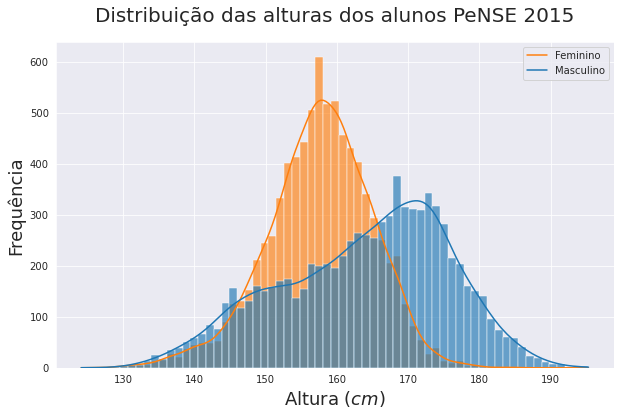

In [155]:
ax = sns.histplot(data=dados_selecionados,
                  x='altura do aluno',
                  hue='sexo', kde=True,
                  palette='tab10', alpha=0.65)

ax.legend(['Feminino', 'Masculino'])
ax.figure.set_size_inches(10,6)
ax.set_title('Distribuição das alturas dos alunos PeNSE 2015',pad=20,fontsize=20)
ax.set_ylabel('Frequência', fontsize=18)
ax.set_xlabel(r'Altura $(cm)$', fontsize=18)
ax;

In [158]:
ranksums(sexo_m_altura, sexo_f_altura)


RanksumsResult(statistic=40.7525576033863, pvalue=0.0)

Note que o pvalor é igual a zero, ou seja rejeitamos a hipótese nula, que no caso é: 

> **The Wilcoxon rank-sum test tests the null hypothesis that two sets of measurements are drawn from the same distribution**

Agora temos um teste estatistico pra verificar que essas distribuições de variáveis são provenientes de distribuições diferentes.

# Análise bidimensional

Os estimadores em geral são aplicados quando queremos analisar uma única variável de uma amostra ou população, mas frequentemente estamos interessados em analisar o comportamento conjunto de duas ou mais variáveis aleatórias. O principal objetivo das análises nessa situação é explorar4 relações (similaridades) entre as variáveis (colunas), ou algumas vezes entre as linhas(registros).

Quando consideramos duas variáveis (ou dois conjuntos de dados), podemos ter três situações: 

* (A) As duas variáveis são qualitativas;

* (B) As duas variáveis são quantitativas; e 

* (C) Uma variável é quantitativa e outra qualitativa.

As técnicas de análise de dados nas três situações são diferentes.

> **Quando as variáveis são qualitativas**, os dados são muito resumidos em tabelas de dupla entrada (ou de contingência), em que aparecerão as frequências absolutas ou contagens de indivíduos que pertencem simultaneamente a categorias de uma e outra variável.

> **Quando as duas variáveis são quantitativas**, as observações são provenientes de um processo de mensuração, e técnicas como gráficos de dispersão ou de quantis são apropriadas.

> **Quando temos uma variável qualitativa e outra quantitativa**, em geral, analisamos o que acontece com a variável quantitativa quando os dados são categorizados de acordo com os diversos atributos da variável qualitativa. 

Mas podemos ter também o caso de duas variáveis quantitativas agrupadas por classes. Por exemplo, podemos querer analisar a associação entre renda e consumo de um certo número de famílias e, para isso, agrupamos as famílias em classes de renda e classes de consumo. Desse modo, recaímos novamente em uma tabela de dupla entrada.

## Medidas de associação entr variáveis qualitativas 

De modo geral, a quantificação do grau de associação entre duas variáveis é feita pelos chamados *coeficientes de correlação* ou *de associação*. Essas são medidas que descrevem, por meio de um único número, a associação (ou dependência) entre duas variáveis. Para facilitar a compreenção, esses coeficientes variam entre $0$ e $1$, ou entre $-1$ e $1$, cuja proximidade de zero indica falta de associação.

### Correlação - Definição 

> Dados $n$ pares de valores $(x_1,y_1), (x_2,y_2),  \dots , (x_n, y_n)$, chama-se coeficiente de correlação entre duas variáveis aleatórias $X$ e $Y$ a: 

$$corr(X,Y) = \frac{1}{n}\sum_{i=1}^{n}\Big(\frac{x_i - \bar{x}}{dP(X)}\Big)\Big(\frac{y_i - \bar{y}}{dP(y)}\Big),$$

ou seja, a média dos produtos dos valores padronizados das variáveis. A definição acima pode ser operacionalizada de forma mais conveniente utilizando a formula: 

$$corr(X,Y) = \frac{\sum{x_i y_i - n\bar{x}\bar{y}}}{\sqrt{(\sum{x_{i}^{2} - n\bar{x}})(\sum{y_{i}^{2} - n\bar{y}})}},$$

Calcular a correlação utilizando o módulo `pandas` é extremamente simples, basta usar o método `corr()` de um dataframe:


In [176]:
dados_selecionados.corr().head(10)

,sexo,cor,turno,telefone fixo,celular,computador,internet,escolaridade mae,responsáveis fuma,usou bebida alcoolica,...,como classifica o proprio estado de saúde,considera sua imagem corporal como sendo algo,como se sente em relação ao seu corpo,peso do aluno,altura do aluno,estado nutricional do estudante,Situação da escola,Dependência Administrativa da escola,Esfera Administrativa da escola,IMC
sexo,1.000000,0.017387,-0.012689,0.005653,-0.005694,-0.001613,-0.011090,-0.027807,-0.021436,-0.033277,...,-0.014303,-0.035330,-0.016421,-0.138928,-0.304753,-0.013130,-0.014244,0.009394,0.006099,0.031585
cor,0.017387,1.000000,0.010603,0.051146,0.004295,0.005939,0.003220,0.055931,0.029184,0.033620,...,0.035246,0.055084,0.049526,-0.019478,-0.017650,-0.004897,0.006693,-0.048284,-0.035506,-0.015545
turno,-0.012689,0.010603,1.000000,0.091629,0.091218,0.094088,0.096205,0.090248,0.081357,0.085143,...,0.035394,0.061608,0.055512,0.021550,0.026130,-0.024231,0.056012,-0.130848,-0.125580,0.012174
telefone fixo,0.005653,0.051146,0.091629,1.000000,0.469833,0.447604,0.461320,0.296130,0.227782,0.253259,...,0.122785,0.157840,0.143755,-0.014634,-0.016285,-0.002218,0.017375,-0.052437,-0.044575,-0.008366
celular,-0.005694,0.004295,0.091218,0.469833,1.000000,0.472719,0.537798,0.281589,0.281090,0.262883,...,0.128900,0.150283,0.152405,-0.018845,-0.020894,-0.008032,0.008240,-0.023571,-0.017211,-0.012535
computador,-0.001613,0.005939,0.094088,0.447604,0.472719,1.000000,0.463435,0.265126,0.228714,0.251722,...,0.122565,0.158002,0.141133,-0.020156,-0.015812,-0.010320,0.024236,-0.044140,-0.031476,-0.016863
internet,-0.011090,0.003220,0.096205,0.461320,0.537798,0.463435,1.000000,0.266267,0.277590,0.306721,...,0.145080,0.160342,0.163636,-0.014911,-0.012383,-0.012772,0.027693,-0.040315,-0.023244,-0.011660
escolaridade mae,-0.027807,0.055931,0.090248,0.296130,0.281589,0.265126,0.266267,1.000000,0.235581,0.267392,...,0.203866,0.186906,0.195705,-0.042184,-0.048143,0.004405,-0.044322,0.106805,0.098147,-0.027880
responsáveis fuma,-0.021436,0.029184,0.081357,0.227782,0.281090,0.228714,0.277590,0.235581,1.000000,0.670407,...,0.264382,0.233805,0.266915,0.106052,0.146569,-0.026606,-0.021409,-0.052762,-0.072027,0.053431
usou bebida alcoolica,-0.033277,0.033620,0.085143,0.253259,0.262883,0.251722,0.306721,0.267392,0.670407,1.000000,...,0.300317,0.270318,0.278202,0.098528,0.152102,-0.038695,-0.015235,-0.031261,-0.055461,0.039903


Lembrando sempre que: 

$$-1 \le corr(X,Y) \le 1$$

onde $-1$ implica numa correlação negativa total e $1$ implica numa correlação positiva total, enquanto $0$ é nenhuma correlação. Note que $corr(X,X) = 1.$

O numerador da expressão que ja citamos acima:

$$corr(X,Y) = \frac{\sum{x_i y_i - n\bar{x}\bar{y}}}{\sqrt{(\sum{x_{i}^{2} - n\bar{x}})(\sum{y_{i}^{2} - n\bar{y}})}},$$

mede o total da concentração dos pontos pelos quatro quadrantes. Esta expressão dá origem a outra medida bastante utilizada definida por: 

### Covariância - Definição: 

> Dados $n$ pares de valores $(x_1,y_1), (x_2,y_2),  \dots , (x_n, y_n)$, chama-se **covariância** entre duas variáveis aleatórias $X$ e $Y$ a: 

$$cov(X,Y) = \sum_{i=1}^{n}{\frac{1}{n}(x_i - \bar{x})(y_i - \bar{y})},$$

ou seja, a média dos produtos dos valores centrados das variáveis.

Com essas duas definições o **coeficiente de correlação** pode ser escrito como: 

$$corr(X,Y) = \frac{cov(X,Y)}{dp(X) . dp(Y)}$$

In [183]:
url = 'https://raw.githubusercontent.com/allanspadini/linear_estatistica/main/media_salarial.csv'
salarial = pd.read_csv(url,sep='\t')

In [184]:
salarial.head()

,Anos,Salario
0,9.096218,78311.160754
1,14.637429,103897.664526
2,12.255808,97836.261015
3,7.215160,80550.256380
4,6.905628,68555.820963


In [186]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 16
mpl.rcParams['figure.figsize'] = [10,6]

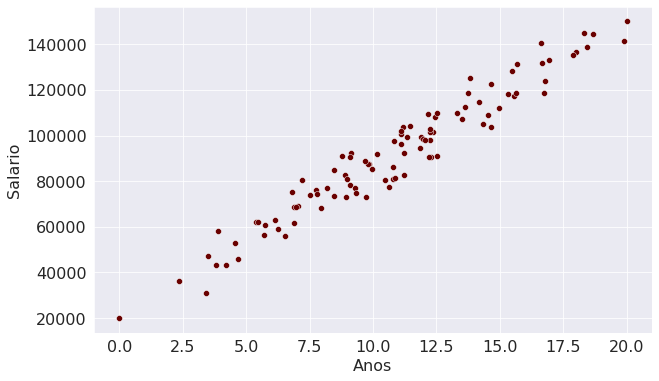

In [189]:
sns.scatterplot(x='Anos',y='Salario',data=salarial);

No dataset `salarial` temos  uma coluna de anos que representa os anos trabalhados e salário que representa o salário recebido após anos trabalhados. 

Podemos utilizar a covariância para analisar o grau de interdependência numérica das variáveis. A definição dada anteriormente mede a covariância populacional, mas a amostral é dada por:

$$cov_{\text{sample}}(X,Y) = \sum_{i=2}^{n}{\frac{1}{n-1}(x_i - \bar{x})(y_i - \bar{y})},$$

In [192]:
amostra = salarial.sample(n=20, random_state = 202)

In [195]:
amostra.T

,34,8,94,66,50,87,38,17,90,13,83,62,73,54,27,5,65,33,55,68
Anos,10.630834,11.45101,10.777052,10.470418,6.824709,13.610841,10.802709,17.993325,5.466448,8.921098,6.146862,15.573579,16.783261,15.312404,11.971043,12.427999,4.556012,12.155537,12.254347,15.656790
Salario,77206.628743,103966.61857,86080.906761,80294.559253,75147.590743,112452.524502,81088.970550,136438.829553,62164.059695,73119.734956,62846.452142,117182.666013,123939.573143,118217.974518,98454.649306,108021.442271,52790.646564,109559.006432,102729.791977,118540.870806


agora para analisar a covariância entre essas duas variáveis basta utilizar o método `.cov()` do dataframe:

In [198]:
amostra.cov()

,Anos,Salario
Anos,14.191227,8.544902e+04
Salario,85449.017586,5.552975e+08


É possivel verificar a interdependência positiva destes dados por causa da covariância positiva. Por exemplo, a covariância entre a coluna `Anos`em relação a linha `Salario`, o valor é 85449.017586. Extremamente alto. 

**Note uma coisa estranha, o valor numérico da covariância entre essas duas variáveis é até maior do que a propria variável com ela mesma.** Isso acontece por causa da diferença entre as escalas, salário é medido na ordem dos milhares e anos é medido na ordem das dezenas e esta discrepância na convariância é explicada pela diferença na ordem de grandezas/escala entre as variáveis. Por isso utiliza-se a **correlação**.

A correlação de Pearson consegue mensurar a diferença de proporções entre as variáveis pois, relembrando a fórmula, o **coeficiente de correlação** pode ser escrito como: 

$$corr(X,Y) = \frac{cov(X,Y)}{\sigma(X) . \sigma(Y)}$$

Para os dados amostrais o coeficiente de correlação é estimado da seguinte maneira:

$$corr_{\text{sample}}(X,Y) = \frac{cov_{\text{sample}}(X,Y)}{\sigma_{sample}(X) . \sigma_{sample}(Y)}$$

Calcular o coeficiente de correlação é uma forma de normalizar a covariância entre as variáveis.

In [199]:
amostra.corr()

,Anos,Salario
Anos,1.000000,0.962574
Salario,0.962574,1.000000


Note agora que a correlação normaliza a convariância, portanto pode-se notar que a correlação ainda repeita a sua definição e o intervalo. Além disso podemos verificar que a interdependência das variáveis anos trabalhados e o salário recebido tem uma correlação de $0.962574$. Também é possível ter uma correlação negativa, neste caso quando uma variável almenta a outra diminui.

Entretanto é muito importante salientar:
$$\color{red}{\text{CORRELAÇÃO NÃO É CAUSALIDADE}}$$

Esta frase é tão importante que se tornou canônica na estatistica, isso porque a correlação é um valor numérico, não é um teste de hipótese, é apenas um índice. A correlação positiva pode levar a interpretação da interdependência de `Anos` e `Salario` como "*Quanto mais os anos passam, mais o salário aumenta*", porém também é possível afirmar que "*Quanto mais o salário aumenta, mais anos se passam*". 

Outro problema é que por ser um índice, a correlação pode ser completamente positiva com fenômenos completamente desconexos. Existe um site chamada **spurious correlations** que mede a correlação entre várias variáveis que tem uma correlação acima de $0.6$, uma delas é esta aqui: A correlação entre a taxa de divórcio no Maine e o consumo per capita de margarina

<img src='https://raw.githubusercontent.com/ConradBitt/BootCamp_DataScience/master/Analise%20Dados%20Saude%20e%20Educa%C3%A7%C3%A3o/images/causalidade_vs_correlacao.png' width=90%>

https://tylervigen.com/spurious-correlations

# Regressão Linear Simples

As preocupações dos cientistas, matemáticos, físicos, quimicos, biólogos e estatisticos, ao analisar um conjunto de dados é criar modelos que explicitem estruturas do fenômeno sob observação, as quais frequentemente são misturadas com variações acidentais ou aleatórias. A identificação dessas estruturas permite conhecer melhor o fenômeno, bem como fazer afirmações sobre possíveis comportamentos.

Uma estratégia comum e conveniente de análise é supor que cada observação seja formada por duas partes: 

$$\text{observação } = \text{previsível } + \text{ aleatório },$$

Aqui, a primeira componente incorpora o conhecimento que o pesquisador tem sobre o fenômeno, uma componente previsível, e é usualmente expressa por uma função matemática, com parâmetros desconhecidos. A segunda componente, a aleatória (ou não previsível), representa aquilo que o pesquisador não pode controlar e para a qual são impostas algumas suposições, por exemplo, que ela obedeça algum modelo probabilistico específico (gaussiano, bionomial, geometrico, poissoniano) que por sua vez também contém parâmetros desconhecidos.

Dentro desse cenário, o trabalho do cientista passa a ser o de estimar os parâmetros desconhecidos das duas partes do modelo, baseado em amostras observadas. A partir disso vamos voltar aos dados do salário em função do ano e tentar ajustar um modelo perante esses dados:

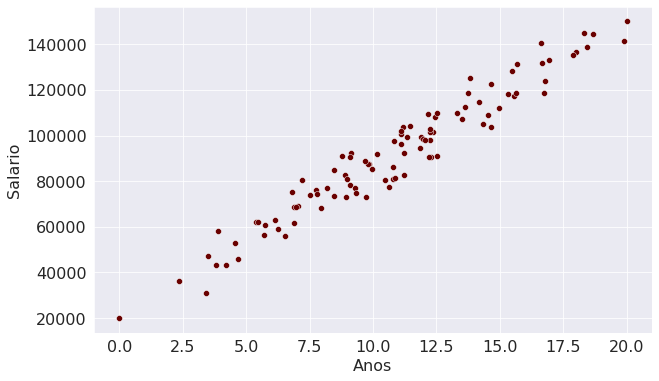

In [200]:
sns.scatterplot(x='Anos',y='Salario',data=salarial);

Antes disso precisamos relembrar como é uma equação da reta

$$Y_i = \beta_1 + \beta_2 X_i$$

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img027.png" width=50%>

Note que na equação da reta, não é simplesmente um $y = f(x) + b$ isso porque estamos trabalhando com variáveis aleatórias então para cada $X_i$ discreto ou contínuo tem uma outra variável $Y_i$ associada. Podemos construir isso de forma mais intuitiva usando a tabela `salarial`:

In [212]:
for i in range(5):
    print(f'X{i} = {salarial.iloc[i][0]:.2f}  | Y{i} = {salarial.iloc[i][1]:.2f}')

X0 = 9.10  | Y0 = 78311.16
X1 = 14.64  | Y1 = 103897.66
X2 = 12.26  | Y2 = 97836.26
X3 = 7.22  | Y3 = 80550.26
X4 = 6.91  | Y4 = 68555.82


Então com a equação $Y_i = \beta_1 + \beta_2 X_i$ temos o $\beta_1$ sendo o coeficiente linear e o $\beta_2$ sendo o coeficiente angular.

Usando o [método dos mínimos quadrados](https://en.wikipedia.org/wiki/Least_squares) podemos encontrar os coeficientes $\beta$ e tendo em vista que já conhecemos os pontos amostrais é possível então construir a melhor reta que ajusta todos esses pontos. O módulo `statsmodels` já tem uma classe pronta para implementar os métodos dos mínimos quadrados.

In [213]:
import statsmodels.api as sm

In [214]:
# Aqui o stats models vai criar uma nova coluna para introduzir uma constante.
# mas note que passamos a variável Anos que será nosso X
X = sm.add_constant(salarial.Anos)

In [215]:
X.head()

,const,Anos
0,1.0,9.096218
1,1.0,14.637429
2,1.0,12.255808
3,1.0,7.215160
4,1.0,6.905628


note que ele adicionou a constante como foi dito anteriormente.

In [216]:
Y = salarial.Salario

Ajustando a reta. Para isso precisamos da função OLS (Ordinary Last Squares) do statsmodels:

https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html

In [217]:
regression_result = sm.OLS(Y,X).fit()

In [219]:
regression_result.params

const    22755.182146
Anos      6367.639175
dtype: float64

Os `params` são os parâmetros da regessão, basicamente o coeficiente linear `const` e o angular `Anos`. Pode parecer meio confuso, mas são os parâmetros da regressão estimados pelo método de minimização dos quadrados. A função `.summary()` da um sumário completo das informações sobre a regressão que foi efetuada:

In [221]:
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Salario   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     1584.
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           2.66e-62
Time:                        16:42:22   Log-Likelihood:                -1021.7
No. Observations:                 100   AIC:                             2047.
Df Residuals:                      98   BIC:                             2053.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.276e+04   1858.193     12.246      0.000    1.91e+04    2.64e+04
Anos        6367.6392    160.003     39.797      0.000    6050.119    6685.159
==============================================================================
Omnibus:                        3.523   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                2.059
Skew:                          -0.073   Prob(JB):                        0.357
Kurtosis:                       2.312   Cond. No.                         32.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note que o `.summary()` também informa o valor de `const` e `Anos` que são os coeficientes linear e angular, respectivamente.

Também é possível efetuar uma regressão linear utilizando o `Scipy`, não é tão completo quanto o `StatsModels`, entretanto é bem simples:

In [228]:
from scipy.stats import linregress

In [249]:
slope, intercept, r, p, se = linregress(x = X.Anos, y = Y)

O retorno da função `lineregress` do scipy.stats é: 


**slope** :float
> Slope of the regression line.

**intercept**: float
> Intercept of the regression line.

**rvalue**: float
> Correlation coefficient.

**pvalue**: float

> Two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero, using Wald Test with t-distribution of the test statistic.

**stderr**: float
> Standard error of the estimated slope (gradient), under the assumption of residual normality.


**intercept_stderr** : float
> Standard error of the estimated intercept, under the assumption of residual normality.


Print, note que o `slope` e `intercept` são exatamente os mesmos do `Anos` e `const` do statsmodels:

In [240]:
print(f'Slope: {slope} | intercept: {intercept}')
print(f'Anos: {regression_result.params[1]}  | const: {regression_result.params[0]}')

Slope: 6367.639174884315 | intercept: 22755.18214581134
Anos: 6367.639174884309  | const: 22755.1821458114


## Intervalo de Confiança

Note que ambos os módulos estatisticos já calculam o intervalo de confiança da regressão. No caso do `.summary()` ele informa na quarta e quinta coluna, mas também pode ser obtido através do método `.conf_int()`:

In [242]:
regression_result.conf_int()

,0,1
const,19067.657980,26442.706312
Anos,6050.119397,6685.158952


Para o scipy é necessário construir o intervalo de confiança:

In [246]:
print(f"slope (95%): {slope:.6f} +/- {se:.6f}")

slope (95%): 6367.639175 +/- 160.002512


In [250]:
(slope-se, slope+se)

(6207.636663029455, 6527.641686739175)

Também é possível contruir a reta que melhor ajusta os pontos com o statsmodels. Mas com este módulo é necessário utilizar a função `.predict`:

In [260]:
salarial['y_previsto'] = regression_result.predict()

In [261]:
salarial

,Anos,Salario,y_previsto
0,9.096218,78311.160754,80676.613985
1,14.637429,103897.664526,115961.045460
2,12.255808,97836.261015,100795.744300
3,7.215160,80550.256380,68698.714847
4,6.905628,68555.820963,66727.732594
...,...,...,...
95,5.755395,60661.286471,59403.461166
96,9.082997,90385.875614,80592.429296
97,12.065148,97977.262502,99581.689653
98,3.894430,57982.954201,47553.505510


Note que agora, além do `Anos` e `Salario`, temos também um `y_previsto` pelo modelo regressivo.

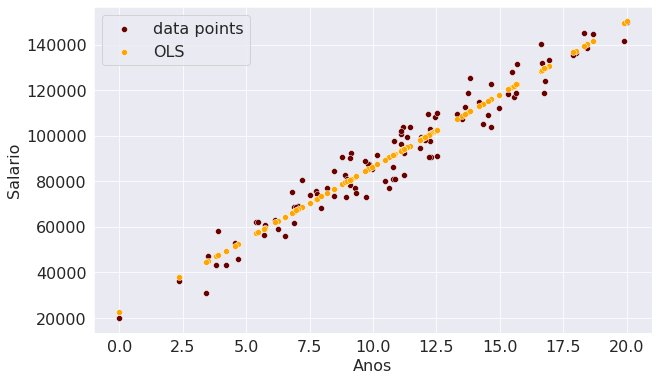

In [272]:
sns.scatterplot(x='Anos',y='Salario',data=salarial, label= 'data points');
sns.scatterplot(x='Anos',y='y_previsto',data=salarial, color='orange', label='OLS');

# Análise de Resíduos

O trabalho de cientistas se concentra basicamente em analisar dados experimentais e propor modelos teóricos para realizar previsões. Fundamentalmente quando se procede uma análise de dados, busca-se de certa forma uma regularidade ou um padrão, afim de propor um modelo que seja possível prever observações. Entretanto, isto não é tão simples, durante a aquisição de dados existem alguns fenômenos inerentes ao processo de medida, que são **erros**.

Existe toda uma abordagem dentro da **teoria dos Erros** que descreve basicamente três tipos de erros:

> $I$ ) **Erro grosseiro**: São erros provenientes de falhas grosseiras do individuo que coleta os dados, por exemplo: Enganar-se ao ler 5.27627 e anotar 5.26727, trocar unidades de medidas, dicionar um dado numa categoria A sendo que ela pertence a B, etc. A maneira de evitar este tipo de erro é ser cuidadoso ao coletar medidas.

> $II$ ) **Erro sistematico**: Chama-se de erro sistematico as flutuações originárias de falhas nos métodos empregados ou falhas do operador que coleta os dados. *Por exemplo: Uma regua calibrada errada; Operador que adianta ou atrasa ao coletar observações;* Em geral estes erros de origem sistematica passam despercebidos e por natureza esses erros tem amplitudes constantes, afetando os dados pra mais ou pra menos.

> $III$ ) **Erros acidentais ou aleatórios**: Erros aleatórios são aqueles cujas causas são fortuitas, acidentais e variáveis. Suas amplitudes são compreendidas dentro da aproximação dos instrumentos. Um operador, repetindo diversas vezes a mesma medida de uma grandeza física, **mesmo que tenha o máximo cuidado**, pode ter valores diferentes. Isso ocorre devido a flutuações relacionadas a erro de paralaxe, erro na avalição da menor divisão da escala de uma régua. Os erros acidentais ou aleatórios podem ser minimizados, **mas nunca eliminados por completo** e estes erros aleatórios são o principal objeto de estudo da teoria dos erros.

Ao propor um modelo devemos levar isto em conta. Podemos descrever de forma esquematica:

$$\text{Dados} = \text{Modelo} + \text{Resíduo},$$

ou ainda, 

$$\text{D} = \text{M} + \text{R}.$$

A parte $M$ é chamada de *parte suave* (ou regular, até previsível) dos dados, enquanto $R$ é a parte aleatória. A parte $R$ é tão importante quanto a $M$, análise dos resíduos constitui uma parte fundamental de todo trabalho estatistico.

Basicamente, são os resíduos que nos dizem se o modelo é adequado ou não para representar os dados. Para tanto, estudamos o comportamento do modelo usando conjunto de dados coletados para tentar prever novos dados, **notadamente é importante analisar as discrepâncias entre os valores observados e os valores ajustados pelo modelo, ou seja, o que estamos fazendo é análise dos resíduos**.

> **Definição**: O $i$-ésimo resíduo é dado por: 
$$\hat{e}_i = y_i - \hat{y}_i, \text{ onde }i=1,2,...,n$$

Queremos estudar o comportamento individual e conjunto destes resíduos, comparando com as suposições feitas sobre os verdadeiros erros $e_i$. Existem várias técnicas formais para conduzir uma análise de resíduo que são estudadas nos cursos de graduação em estatistica até mesmo em pós graduações, aqui irei citar basicamente análises gráficas, mas para mais informações além da referência que estou utilizando:

> MORETTIN, Pedro Alberto; BUSSAB, WILTON OLIVEIRA. **Estatística básica**. Saraiva Educação SA, 2017.

consulte Draper e Smith, para se aprofundar ainda mais:

> DRAPER, Norman R.; SMITH, Harry. **Applied regression analysis**. John Wiley & Sons, 1998.

Para mais informações além da referência que estou utilizando:

> MORETTIN, Pedro Alberto; BUSSAB, WILTON OLIVEIRA. **Estatística básica**. Saraiva Educação SA, 2017.

consulte Draper e Smith:

> DRAPER, Norman R.; SMITH, Harry. **Applied regression analysis**. John Wiley & Sons, 1998.

Uma representação gráfica bastante útil é obtida plotando-se pares ($x_i , \hat{e}_i) \text{ onde }i=1,2,...,n$. Outras vezes, é de maior utilidade fazer a representação gráfica dos chamados **resíduos padronizados**, 

$$\hat{z}_i = \frac{y_i - \hat{y}_i}{\sigma_e} = \frac{\hat{e}_i}{\sigma_e},$$

onde $y_i$ é a medida efetiva, $\hat{y}_i$ a medida prevista e $\sigma_e$ o desvio padrão do erro. Plotando-se os pares ($x_i, z_i$). Observe que a forma dos dois graficos é semelhante. Havendo apenas uma mudança de escala das ordenadas nos dois casos. Por isso, é muito indicado no gráfico da posição $\sigma_e$.

Outro resíduo muito utilizado é o **resíduo estudentizado**, definido por:

$$\hat{r} = \frac{\hat{e}_i}{\sigma_e \sqrt{1 - v_{ii}}},$$

em que $v_ii = 1/n + {(x_i - \bar{x})}^2 / \sum(x_i - \bar{x})^2$. O denominador é o desvio padrão de $\hat{e}_i$. Não será explorado mais a fundo aqui uma análise criteriosa dos resíduos porque isso pode ser um assunto extremamente amplo.

--- 

Note que no gráfico a seguir não temos uma estimativa para o salário de quem quem trabalhou 12.5 anos:

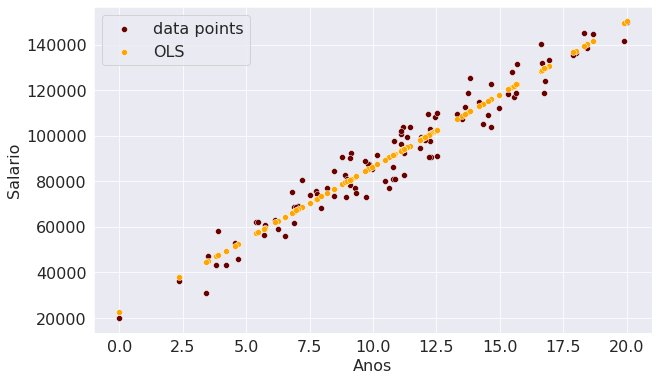

In [274]:
sns.scatterplot(x='Anos',y='Salario',data=salarial, label= 'data points');
sns.scatterplot(x='Anos',y='y_previsto',data=salarial, color='orange', label='OLS');

Então o objetivo da regressão é estimar resultados para dados que não temos observações. Então como fazer esta estimativa? Ou, como estimar o salário de quem trabalhou de 20 à 30 anos? Bom para isso precisamos criar os possíveis valores dos anos:


In [276]:
X_novo = np.linspace(20, 30, 11)
X_novo

array([20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.])

adicionando a coluna extra exigida pelo statsmodels:

In [277]:
X_novo = sm.add_constant(X_novo)
X_novo

array([[ 1., 20.],
       [ 1., 21.],
       [ 1., 22.],
       [ 1., 23.],
       [ 1., 24.],
       [ 1., 25.],
       [ 1., 26.],
       [ 1., 27.],
       [ 1., 28.],
       [ 1., 29.],
       [ 1., 30.]])

In [278]:
pontos_fora_amostra = regression_result.predict(X_novo)
pontos_fora_amostra

array([150107.9656435 , 156475.60481838, 162843.24399327, 169210.88316815,
       175578.52234303, 181946.16151792, 188313.8006928 , 194681.43986769,
       201049.07904257, 207416.71821746, 213784.35739234])

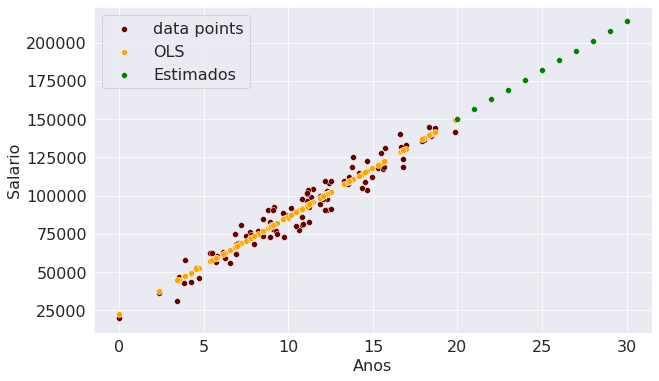

In [280]:
sns.scatterplot(x='Anos',y='Salario',data=salarial, label= 'data points');
sns.scatterplot(x='Anos',y='y_previsto',data=salarial, color='orange', label='OLS');
sns.scatterplot(x=X_novo[:,1], y=pontos_fora_amostra, color='green', label='Estimados');

Note que para os pontos extrapolados pela regressão linear não temos resíduos, portanto não sabemos a precisão deste modelo regressivo, daí surge a análise de resíduos tendo em vista os dados que nós já temos. Isso porque sabendo os resíduos entre os pontos experimentais e os previstos, podemos ter uma noção da precisão do salário de quem trabalhou 25 anos mesmo sem ter uma amostra, baseado apenas nos resíduos dos anos anteriores.

Note que o stats models já tem um atributo que retorna os resíduos, entretanto se for necessário construí-los a formula é 

$$\hat{e}_i = y_i - \hat{y}_i, \text{ onde }i=1,2,...,n$$

In [283]:
salarial['residuo'] = regression_result.resid
salarial

,Anos,Salario,y_previsto,residuo
0,9.096218,78311.160754,80676.613985,-2365.453231
1,14.637429,103897.664526,115961.045460,-12063.380934
2,12.255808,97836.261015,100795.744300,-2959.483285
3,7.215160,80550.256380,68698.714847,11851.541534
4,6.905628,68555.820963,66727.732594,1828.088369
...,...,...,...,...
95,5.755395,60661.286471,59403.461166,1257.825306
96,9.082997,90385.875614,80592.429296,9793.446318
97,12.065148,97977.262502,99581.689653,-1604.427152
98,3.894430,57982.954201,47553.505510,10429.448692


Uma premissa sobre os resíduos é que a média aritmética dos resíduos deve ser zero:

In [286]:
salarial.residuo.mean()

1.9063008949160577e-11

Note que devido à varios erros inerentes ao processo de medida até erros devido a precisão computacional ([epsilon de máquina](https://pt.wikipedia.org/wiki/%C3%89psilon_de_m%C3%A1quina)) a média amostral dos resíduos não é zero, mas é bem baixa.

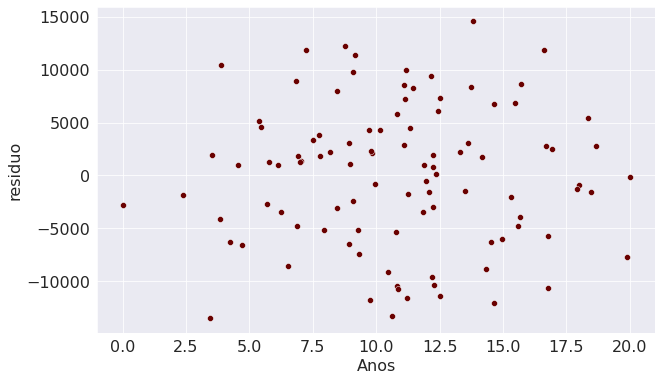

In [295]:
sns.scatterplot(x='Anos', y = 'residuo', data=salarial);

Pode acontece do salário depender de mais de uma variável, por exemplo, além dos anos trabalhados depender também do anos de estudo. Por isso as vezes é interessante plotar o resíduo em função do valor predito pelo modelo regressivo:

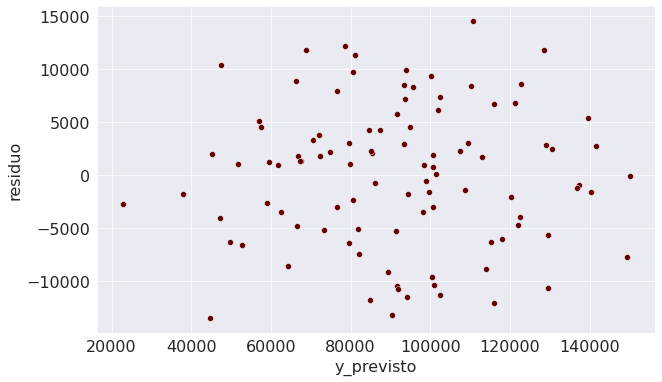

In [294]:
sns.scatterplot(x='y_previsto', y ='residuo', data=salarial);

Outro ponto interessante é que a variância ou desvio padrão do resíduo é a mesma para todos os valores de X:

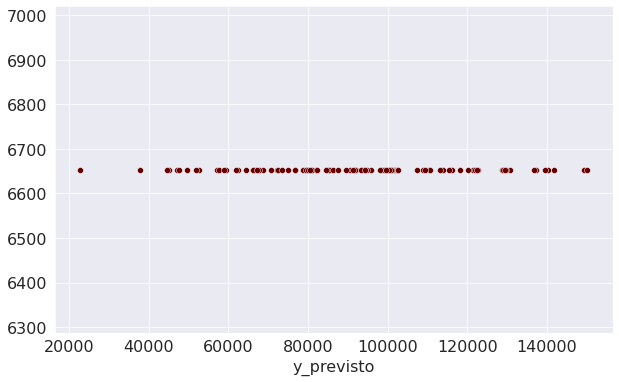

In [308]:
sns.scatterplot(x=salarial['y_previsto'], y =salarial['residuo'].std());

Ou seja, em outras palavras isto sugere que existe uma heterocedasticidade nos dados, ou seja, os resíduos ao longo das observações sejam constantes.